In [1]:
#!pip install factor_analyzer

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from factor_analyzer import FactorAnalyzer # Perform statistical tests before PCA 
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Load the dataset
df = pd.read_csv("PCA India Data_Census.csv")

In [4]:
# Initial Data Exploration
print("First 5 rows of the dataset:")
df.head()

First 5 rows of the dataset:


State Code  Dist.Code            State    Area Name  No_HH  TOT_M  TOT_F  \
0           1          1  Jammu & Kashmir      Kupwara   7707  23388  29796   
1           1          2  Jammu & Kashmir       Badgam   6218  19585  23102   
2           1          3  Jammu & Kashmir  Leh(Ladakh)   4452   6546  10964   
3           1          4  Jammu & Kashmir       Kargil   1320   2784   4206   
4           1          5  Jammu & Kashmir        Punch  11654  20591  29981   

   M_06  F_06  M_SC  ...  MARG_CL_0_3_M  MARG_CL_0_3_F  MARG_AL_0_3_M  \
0  5862  6196     3  ...           1150            749            180   
1  4482  3733     7  ...            525            715            123   
2  1082  1018     3  ...            114            188             44   
3   563   677     0  ...            194            247             61   
4  5157  4587    20  ...            874           1928            465   

   MARG_AL_0_3_F  MARG_HH_0_3_M  MARG_HH_0_3_F  MARG_OT_0_3_M  MARG_OT_0_3_F  \
0            237            680            252             32             46   
1            229            186            148             76            178   
2             89              3             34              0              4   
3            128             13             50              4             10   
4           1043            205            302             24            105   

   NON_WORK_M  NON_WORK_F  
0         258         214  
1         140         160  
2          67          61  
3         116          59  
4         180         478  

[5 rows x 61 columns]

In [5]:
df.shape

(640, 61)

In [6]:
df.describe().T.round(2)

count       mean        std    min       25%      50%  \
State Code      640.0      17.11       9.43    1.0      9.00     18.0   
Dist.Code       640.0     320.50     184.90    1.0    160.75    320.5   
No_HH           640.0   51222.87   48135.41  350.0  19484.00  35837.0   
TOT_M           640.0   79940.58   73384.51  391.0  30228.00  58339.0   
TOT_F           640.0  122372.08  113600.72  698.0  46517.75  87724.5   
M_06            640.0   12309.10   11500.91   56.0   4733.75   9159.0   
F_06            640.0   11942.30   11326.29   56.0   4672.25   8663.0   
M_SC            640.0   13820.95   14426.37    0.0   3466.25   9591.5   
F_SC            640.0   20778.39   21727.89    0.0   5603.25  13709.0   
M_ST            640.0    6191.81    9912.67    0.0    293.75   2333.5   
F_ST            640.0   10155.64   15875.70    0.0    429.50   3834.5   
M_LIT           640.0   57967.98   55910.28  286.0  21298.00  42693.5   
F_LIT           640.0   66359.57   75037.86  371.0  20932.00  43796.5   
M_ILL           640.0   21972.60   19825.61  105.0   8590.00  15767.5   
F_ILL           640.0   56012.52   47116.69  327.0  22367.00  42386.0   
TOT_WORK_M      640.0   37992.41   36419.54  100.0  13753.50  27936.5   
TOT_WORK_F      640.0   41295.76   37192.36  357.0  16097.75  30588.5   
MAINWORK_M      640.0   30204.45   31480.92   65.0   9787.00  21250.5   
MAINWORK_F      640.0   28198.85   29998.26  240.0   9502.25  18484.0   
MAIN_CL_M       640.0    5424.34    4739.16    0.0   2023.50   4160.5   
MAIN_CL_F       640.0    5486.04    5326.36    0.0   1920.25   3908.5   
MAIN_AL_M       640.0    5849.11    6399.51    0.0   1070.25   3936.5   
MAIN_AL_F       640.0    8926.00   12864.29    0.0   1408.75   3933.5   
MAIN_HH_M       640.0     883.89    1278.64    0.0    187.50    498.5   
MAIN_HH_F       640.0    1380.77    3179.41    0.0    248.75    540.5   
MAIN_OT_M       640.0   18047.10   26068.48   36.0   3997.50   9598.0   
MAIN_OT_F       640.0   12406.04   18972.20  153.0   3142.50   6380.5   
MARGWORK_M      640.0    7787.96    7410.79   35.0   2937.50   5627.0   
MARGWORK_F      640.0   13096.91   10996.47  117.0   5424.50  10175.0   
MARG_CL_M       640.0    1040.74    1311.55    0.0    311.75    606.5   
MARG_CL_F       640.0    2307.68    3564.63    0.0    630.25   1226.0   
MARG_AL_M       640.0    3304.33    3781.56    0.0    873.50   2062.0   
MARG_AL_F       640.0    6463.28    6773.88    0.0   1402.50   4020.5   
MARG_HH_M       640.0     316.74     462.66    0.0     71.75    166.0   
MARG_HH_F       640.0     786.63    1198.72    0.0    171.75    429.0   
MARG_OT_M       640.0    3126.15    3609.39    7.0    935.50   2036.0   
MARG_OT_F       640.0    3539.32    4115.19   19.0   1071.75   2349.5   
MARGWORK_3_6_M  640.0   41948.17   39045.32  291.0  16208.25  30315.0   
MARGWORK_3_6_F  640.0   81076.32   82970.41  341.0  26619.50  56793.0   
MARG_CL_3_6_M   640.0    6394.99    6019.81   27.0   2372.00   4630.0   
MARG_CL_3_6_F   640.0   10339.86    8467.47   85.0   4351.50   8295.0   
MARG_AL_3_6_M   640.0     789.85     905.64    0.0    235.50    480.5   
MARG_AL_3_6_F   640.0    1749.58    2496.54    0.0    497.25    985.5   
MARG_HH_3_6_M   640.0    2743.64    3059.59    0.0    718.75   1714.5   
MARG_HH_3_6_F   640.0    5169.85    5335.64    0.0   1113.75   3294.0   
MARG_OT_3_6_M   640.0     245.36     358.73    0.0     58.00    129.5   
MARG_OT_3_6_F   640.0     585.88     900.03    0.0    127.75    320.5   
MARGWORK_0_3_M  640.0    2616.14    3036.96    7.0    755.00   1681.5   
MARGWORK_0_3_F  640.0    2834.55    3327.84   14.0    833.50   1834.5   
MARG_CL_0_3_M   640.0    1392.97    1489.71    4.0    489.50    949.0   
MARG_CL_0_3_F   640.0    2757.05    2788.78   30.0    957.25   1928.0   
MARG_AL_0_3_M   640.0     250.89     453.34    0.0     47.00    114.5   
MARG_AL_0_3_F   640.0     558.10    1117.64    0.0    109.00    247.5   
MARG_HH_0_3_M   640.0     560.69     762.58    0.0    136.50    308.0   
M

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640 entries, 0 to 639
Data columns (total 61 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   State Code      640 non-null    int64 
 1   Dist.Code       640 non-null    int64 
 2   State           640 non-null    object
 3   Area Name       640 non-null    object
 4   No_HH           640 non-null    int64 
 5   TOT_M           640 non-null    int64 
 6   TOT_F           640 non-null    int64 
 7   M_06            640 non-null    int64 
 8   F_06            640 non-null    int64 
 9   M_SC            640 non-null    int64 
 10  F_SC            640 non-null    int64 
 11  M_ST            640 non-null    int64 
 12  F_ST            640 non-null    int64 
 13  M_LIT           640 non-null    int64 
 14  F_LIT           640 non-null    int64 
 15  M_ILL           640 non-null    int64 
 16  F_ILL           640 non-null    int64 
 17  TOT_WORK_M      640 non-null    int64 
 18  TOT_WORK_F

In [8]:
df=df.rename(columns={'State Code':'StateCode','Area Name':'AreaName'})

In [9]:
df=df.drop(['Dist.Code'],axis=1)

In [10]:
df.State.value_counts()

Uttar Pradesh               71
Madhya Pradesh              50
Bihar                       38
Maharashtra                 35
Rajasthan                   33
Tamil Nadu                  32
Karnataka                   30
Odisha                      30
Assam                       27
Gujarat                     26
Jharkhand                   24
Andhra Pradesh              23
Jammu & Kashmir             22
Haryana                     21
Punjab                      20
West Bengal                 19
Chhattisgarh                18
Arunachal Pradesh           16
Kerala                      14
Uttarakhand                 13
Himachal Pradesh            12
Nagaland                    11
Manipur                      9
NCT of Delhi                 9
Mizoram                      8
Meghalaya                    7
Tripura                      4
Sikkim                       4
Puducherry                   4
Andaman & Nicobar Island     3
Goa                          2
Daman & Diu                  2
Lakshadw

In [11]:
df.AreaName.value_counts()

Raigarh          2
Bijapur          2
Aurangabad       2
Hamirpur         2
Bilaspur         2
                ..
Darbhanga        1
Muzaffarpur      1
Gopalganj        1
Siwan            1
South Andaman    1
Name: AreaName, Length: 635, dtype: int64

In [12]:
df.isnull().sum()

StateCode         0
State             0
AreaName          0
No_HH             0
TOT_M             0
TOT_F             0
M_06              0
F_06              0
M_SC              0
F_SC              0
M_ST              0
F_ST              0
M_LIT             0
F_LIT             0
M_ILL             0
F_ILL             0
TOT_WORK_M        0
TOT_WORK_F        0
MAINWORK_M        0
MAINWORK_F        0
MAIN_CL_M         0
MAIN_CL_F         0
MAIN_AL_M         0
MAIN_AL_F         0
MAIN_HH_M         0
MAIN_HH_F         0
MAIN_OT_M         0
MAIN_OT_F         0
MARGWORK_M        0
MARGWORK_F        0
MARG_CL_M         0
MARG_CL_F         0
MARG_AL_M         0
MARG_AL_F         0
MARG_HH_M         0
MARG_HH_F         0
MARG_OT_M         0
MARG_OT_F         0
MARGWORK_3_6_M    0
MARGWORK_3_6_F    0
MARG_CL_3_6_M     0
MARG_CL_3_6_F     0
MARG_AL_3_6_M     0
MARG_AL_3_6_F     0
MARG_HH_3_6_M     0
MARG_HH_3_6_F     0
MARG_OT_3_6_M     0
MARG_OT_3_6_F     0
MARGWORK_0_3_M    0
MARGWORK_0_3_F    0


#### Observations:

#####    . Data consists of 640 records of house holds of various states with 59 features

#####    . There are no missing values in the data

### Exploratory Data Analysis (EDA)

##### Univariate Analysis

Let us define a function 'univariateAnalysis_numeric' to display information as part of univariate analysis of numeric variables. The function will accept coulmn name and number of bins as arguments.

The function will display the statistical description of the the numeric variable, histogram or distplot to view the distribution and the box plot to view 5 point summary and outliers if any.


In [13]:
def univariateAnalysis_numeric(column,nbins):
    print("Description of " + column)
    print("----------------------------------------------------------------------------")
    print(df[column].describe(),end=' ')
    
    
    plt.figure(figsize=[25,10])
    print("Distribution of " + column)
    print("----------------------------------------------------------------------------")
    a=round(df[column].min())
    b=round(df[column].max())
    freq, bins, patches = plt.hist(df[column], bins=nbins, range=[a,b], edgecolor='Black', color='cyan')

    plt.show;
    plt.figure()
    print("BoxPlot of " + column)
    print("----------------------------------------------------------------------------")
    ax = sns.boxplot(x=df[column])
    #ax.legend()
    plt.show()

Description of StateCode
----------------------------------------------------------------------------
count    640.000000
mean      17.114062
std        9.426486
min        1.000000
25%        9.000000
50%       18.000000
75%       24.000000
max       35.000000
Name: StateCode, dtype: float64 Distribution of StateCode
----------------------------------------------------------------------------
BoxPlot of StateCode
----------------------------------------------------------------------------


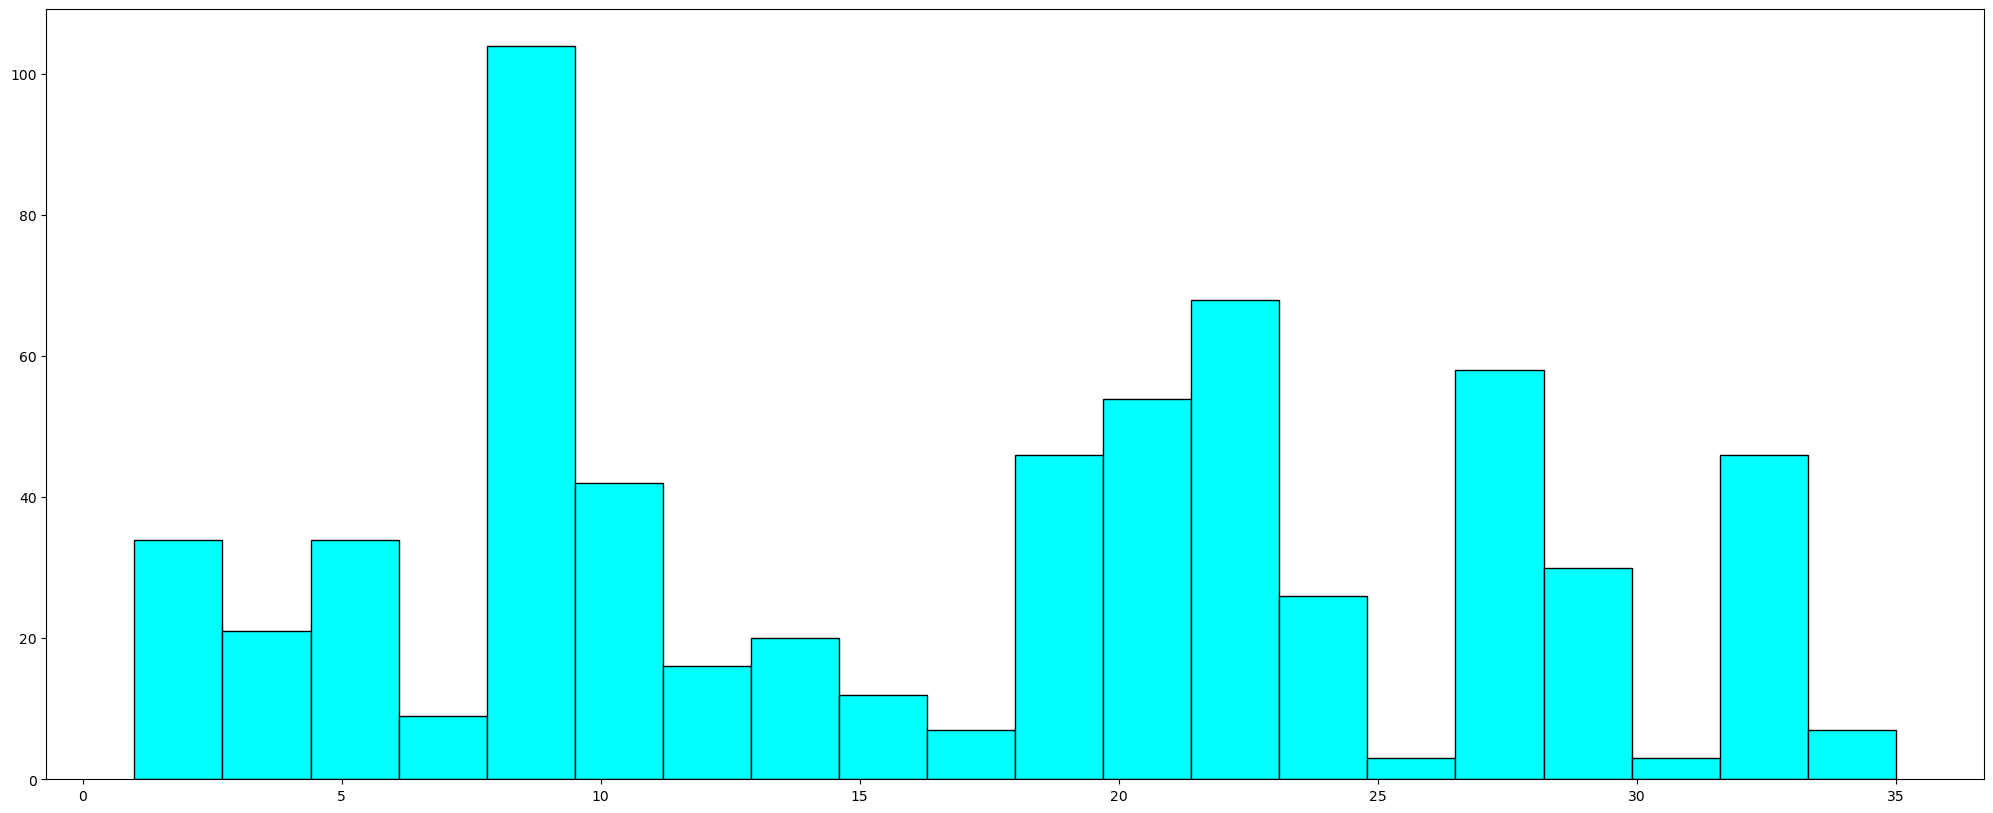

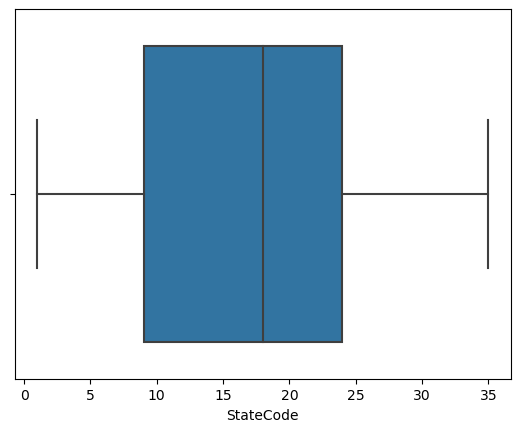

Description of No_HH
----------------------------------------------------------------------------
count       640.000000
mean      51222.871875
std       48135.405475
min         350.000000
25%       19484.000000
50%       35837.000000
75%       68892.000000
max      310450.000000
Name: No_HH, dtype: float64 Distribution of No_HH
----------------------------------------------------------------------------
BoxPlot of No_HH
----------------------------------------------------------------------------


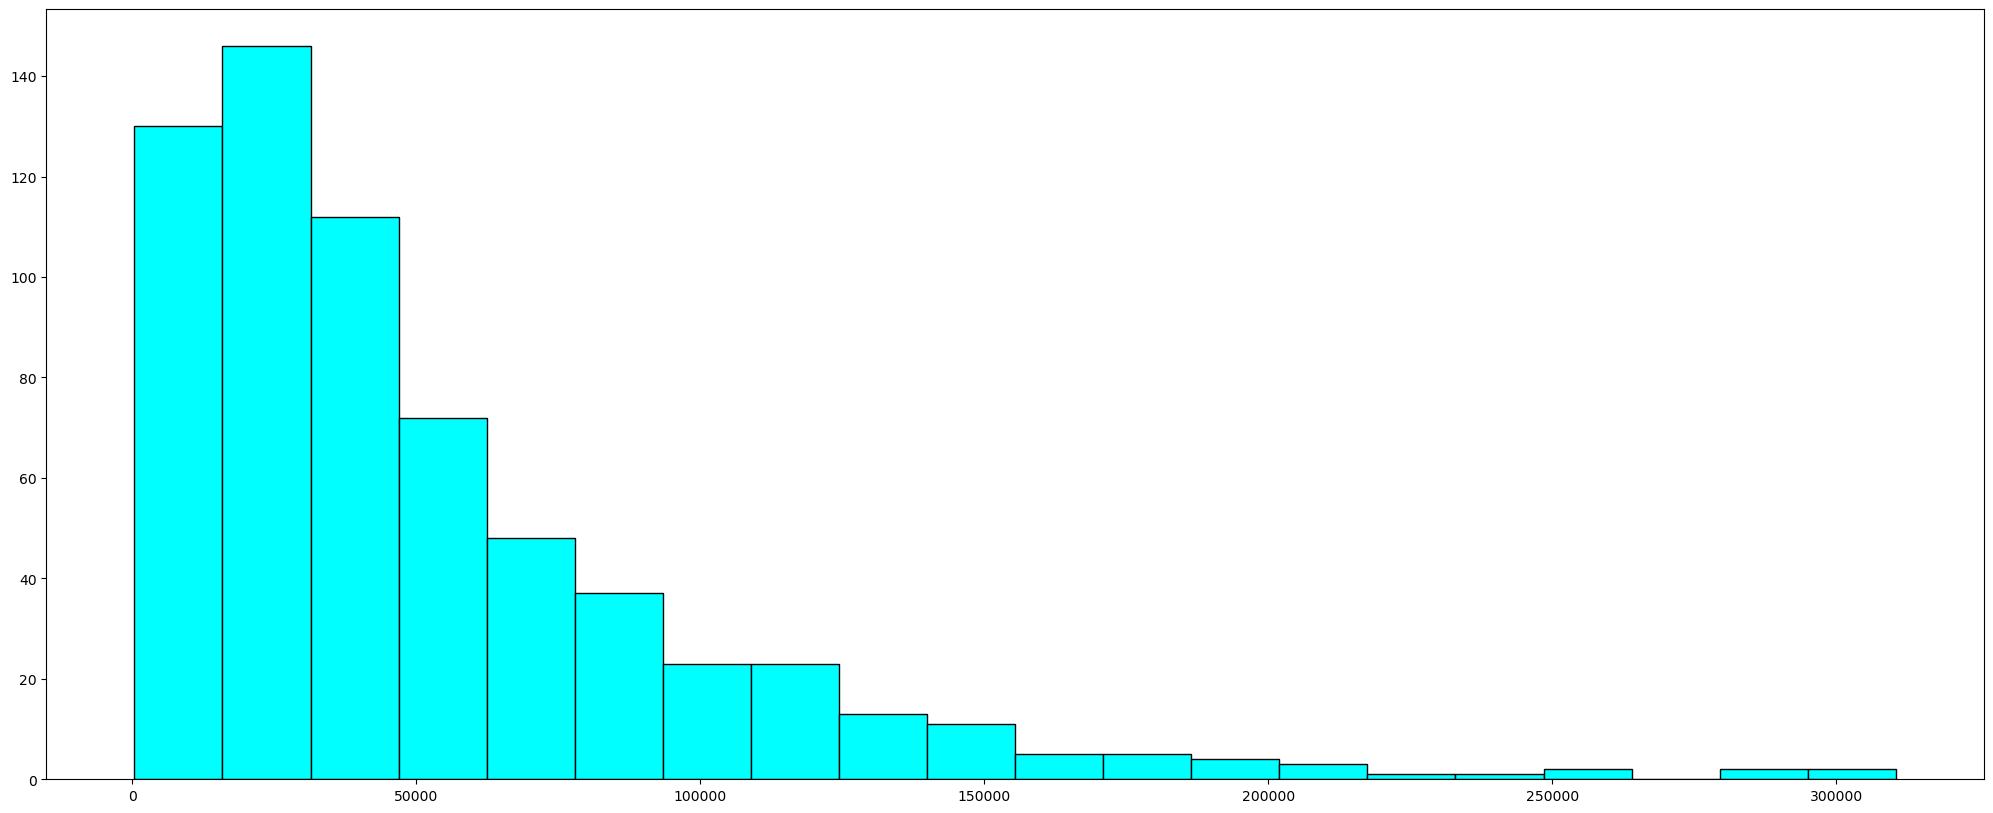

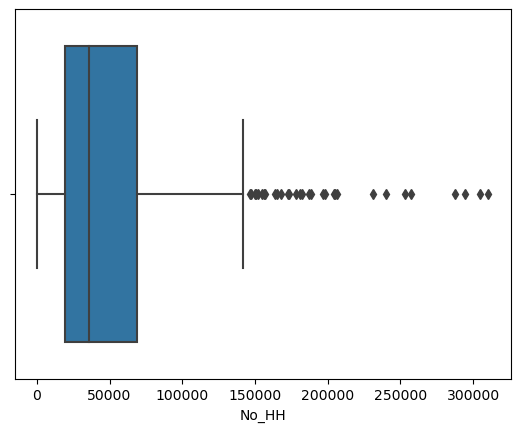

Description of TOT_M
----------------------------------------------------------------------------
count       640.000000
mean      79940.576563
std       73384.511114
min         391.000000
25%       30228.000000
50%       58339.000000
75%      107918.500000
max      485417.000000
Name: TOT_M, dtype: float64 Distribution of TOT_M
----------------------------------------------------------------------------
BoxPlot of TOT_M
----------------------------------------------------------------------------


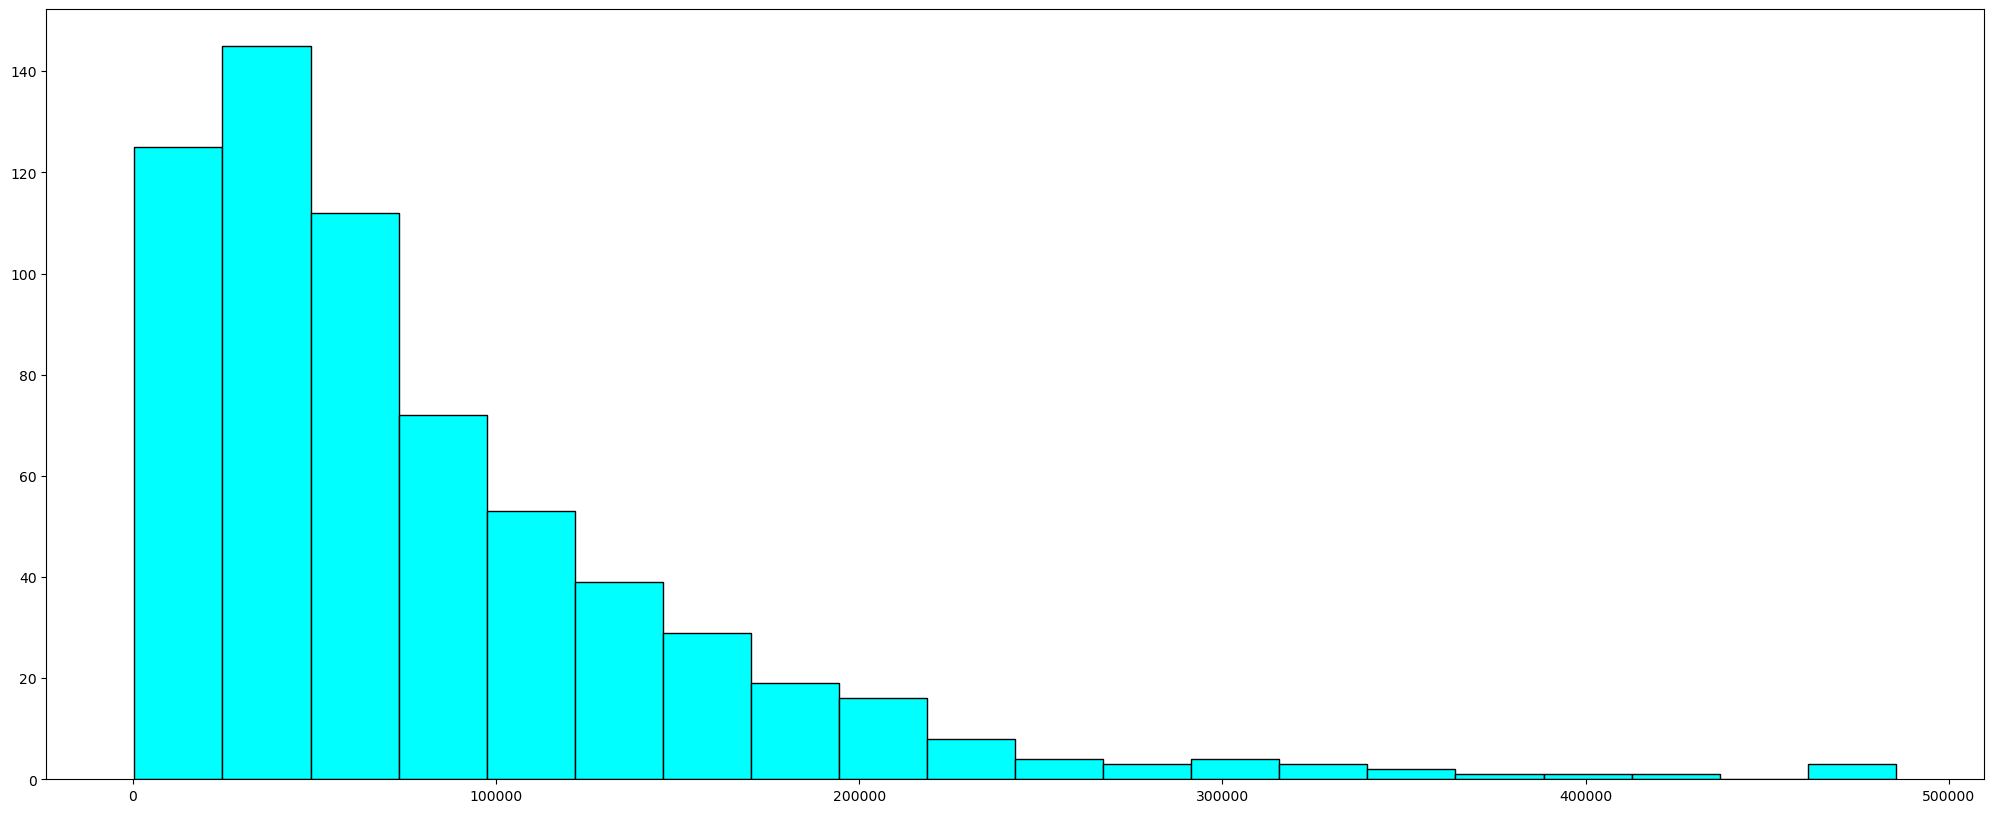

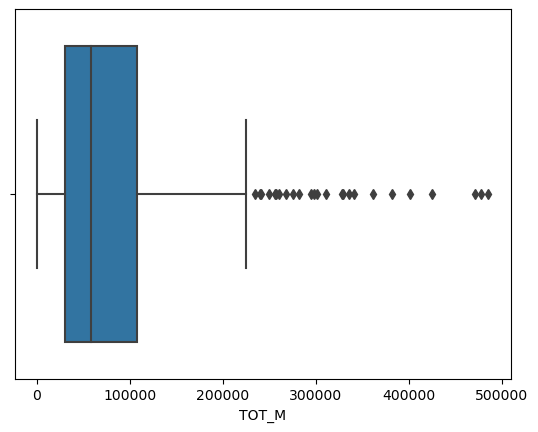

Description of TOT_F
----------------------------------------------------------------------------
count       640.000000
mean     122372.084375
std      113600.717282
min         698.000000
25%       46517.750000
50%       87724.500000
75%      164251.750000
max      750392.000000
Name: TOT_F, dtype: float64 Distribution of TOT_F
----------------------------------------------------------------------------
BoxPlot of TOT_F
----------------------------------------------------------------------------


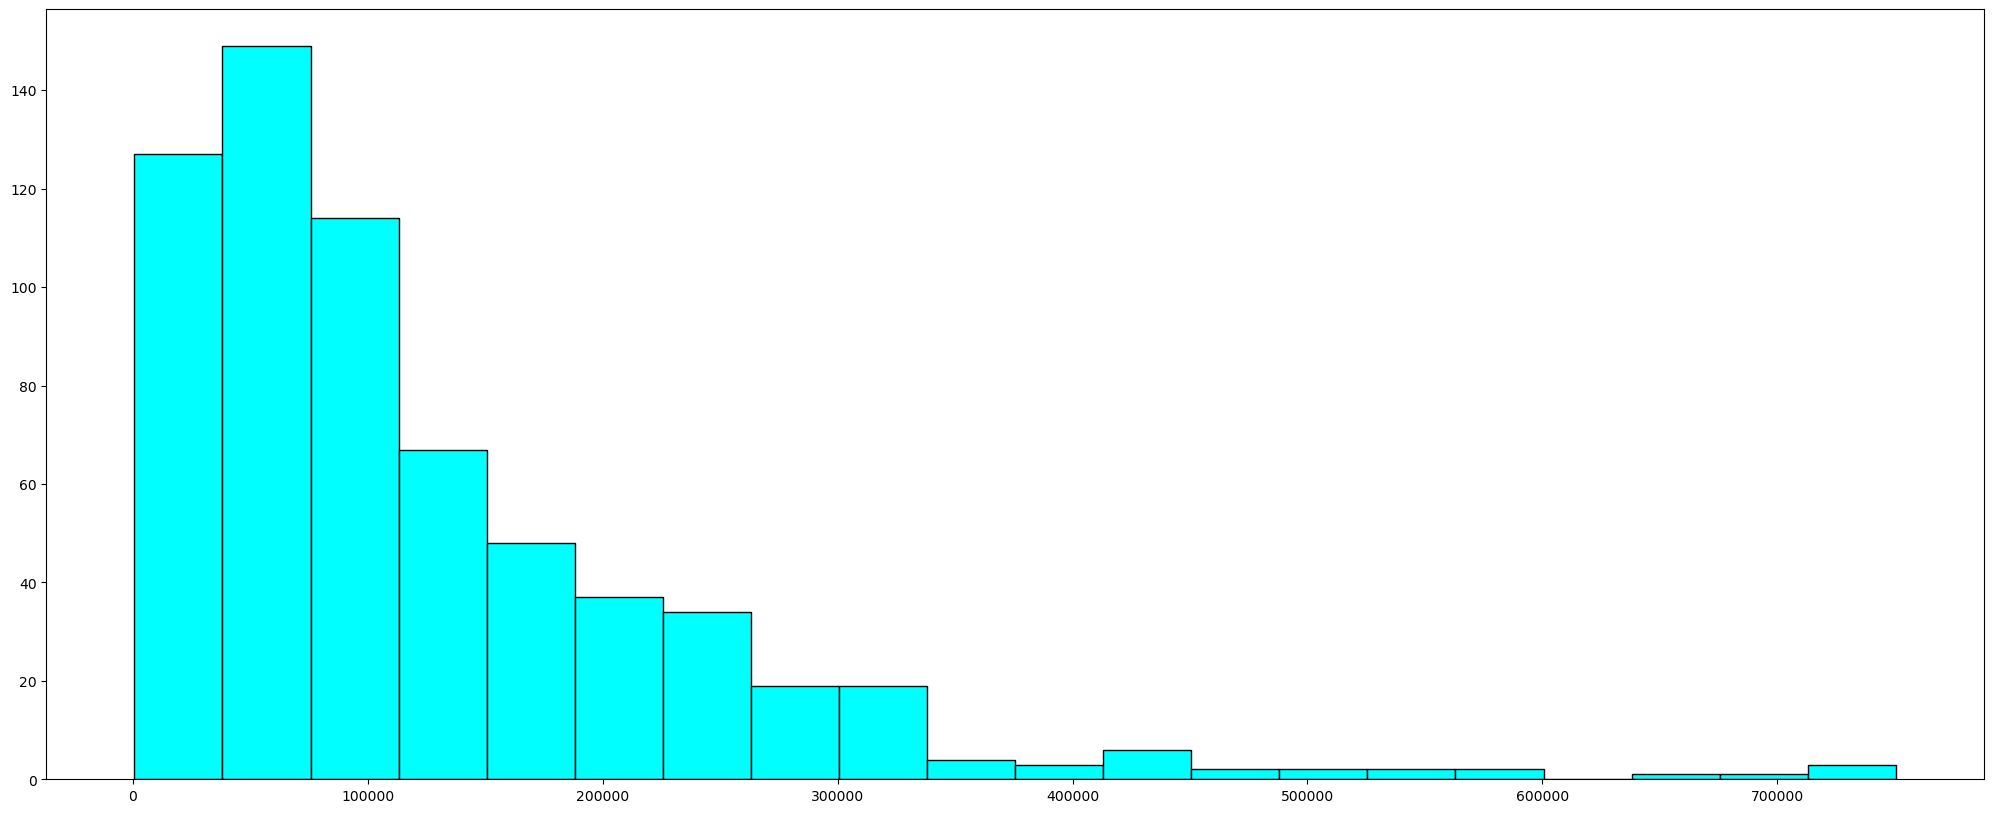

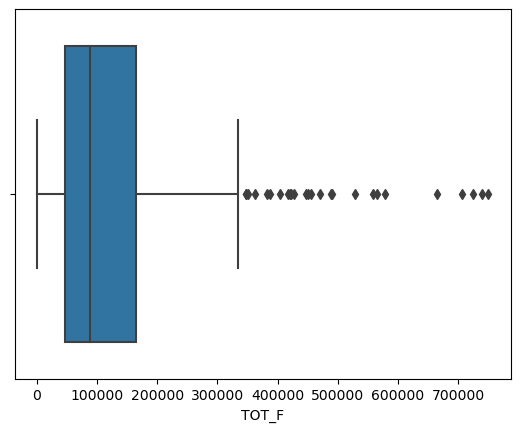

Description of M_06
----------------------------------------------------------------------------
count      640.000000
mean     12309.098438
std      11500.906881
min         56.000000
25%       4733.750000
50%       9159.000000
75%      16520.250000
max      96223.000000
Name: M_06, dtype: float64 Distribution of M_06
----------------------------------------------------------------------------
BoxPlot of M_06
----------------------------------------------------------------------------


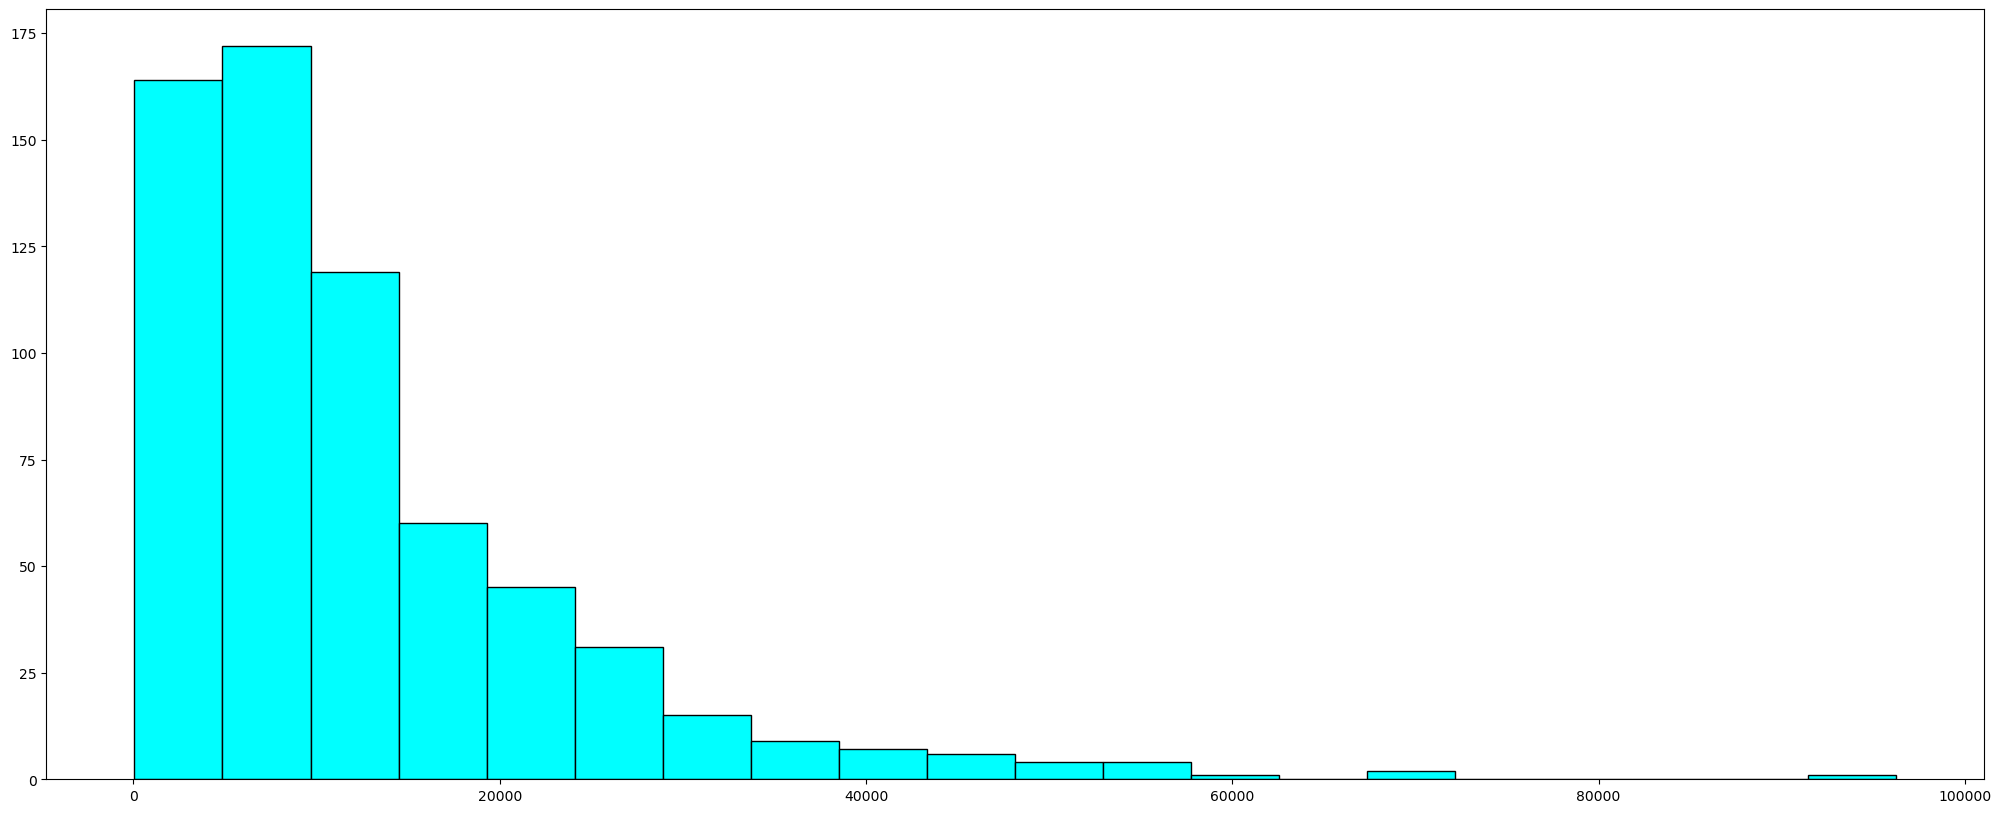

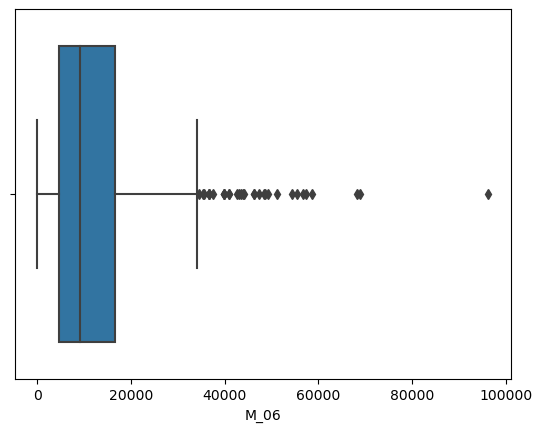

Description of F_06
----------------------------------------------------------------------------
count      640.000000
mean     11942.300000
std      11326.294567
min         56.000000
25%       4672.250000
50%       8663.000000
75%      15902.250000
max      95129.000000
Name: F_06, dtype: float64 Distribution of F_06
----------------------------------------------------------------------------
BoxPlot of F_06
----------------------------------------------------------------------------


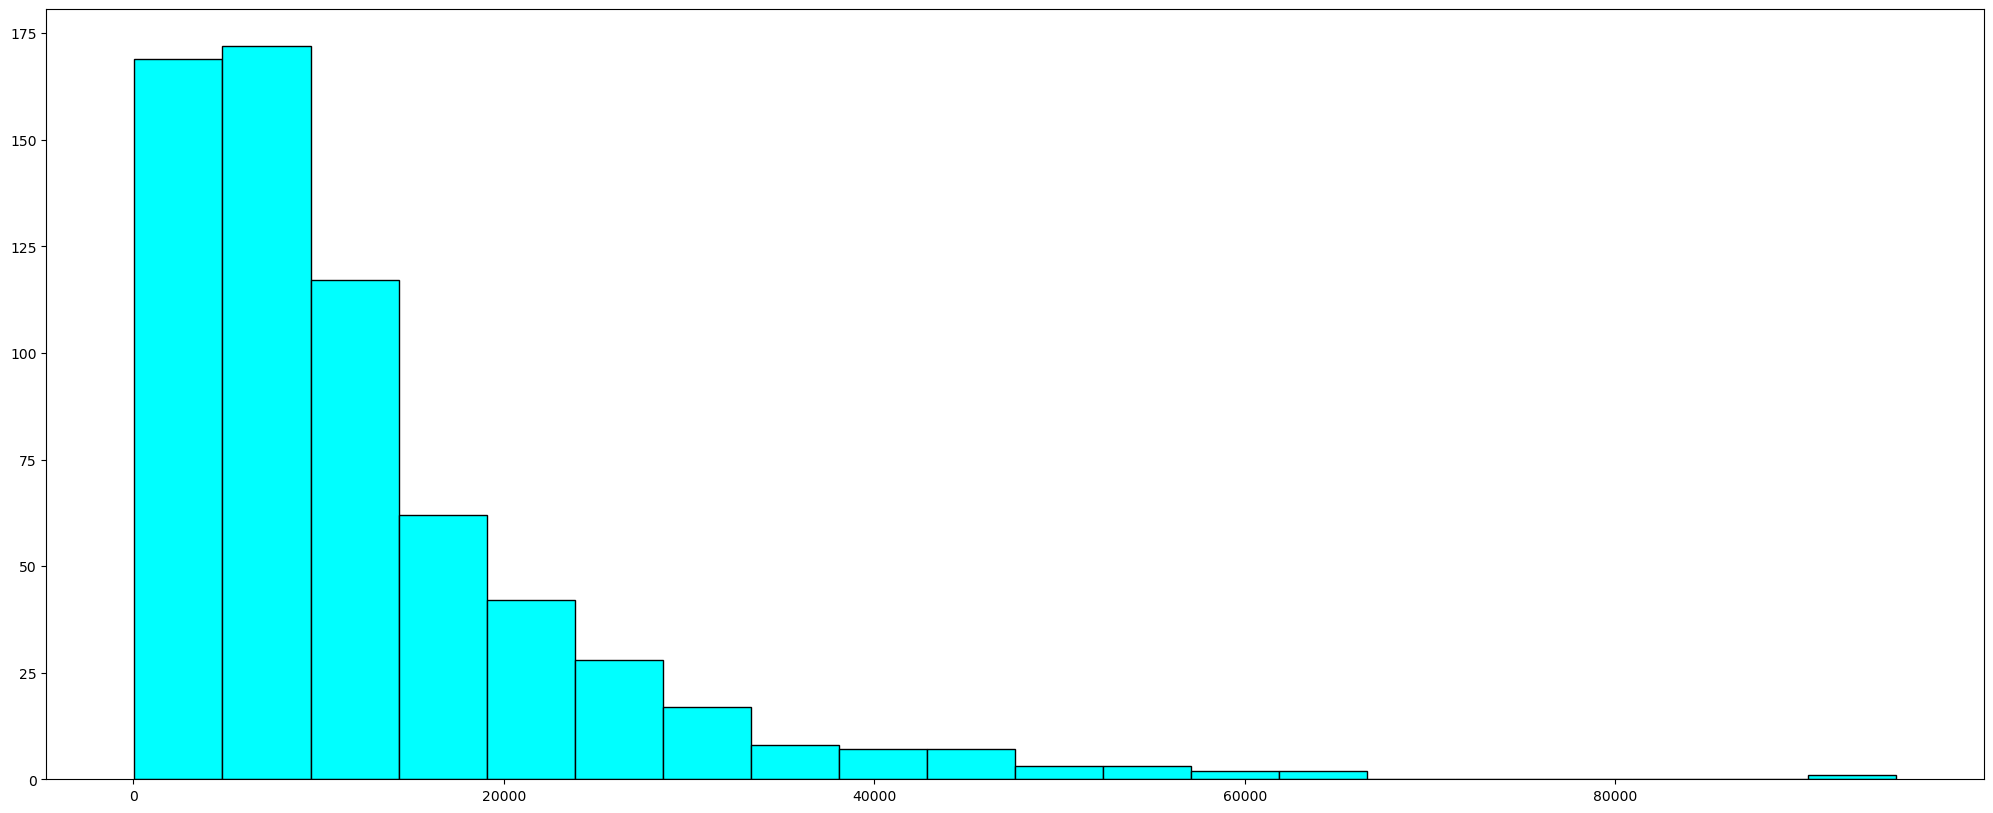

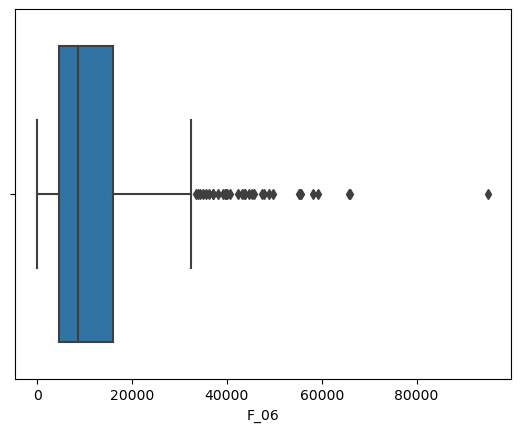

Description of M_SC
----------------------------------------------------------------------------
count       640.000000
mean      13820.946875
std       14426.373130
min           0.000000
25%        3466.250000
50%        9591.500000
75%       19429.750000
max      103307.000000
Name: M_SC, dtype: float64 Distribution of M_SC
----------------------------------------------------------------------------
BoxPlot of M_SC
----------------------------------------------------------------------------


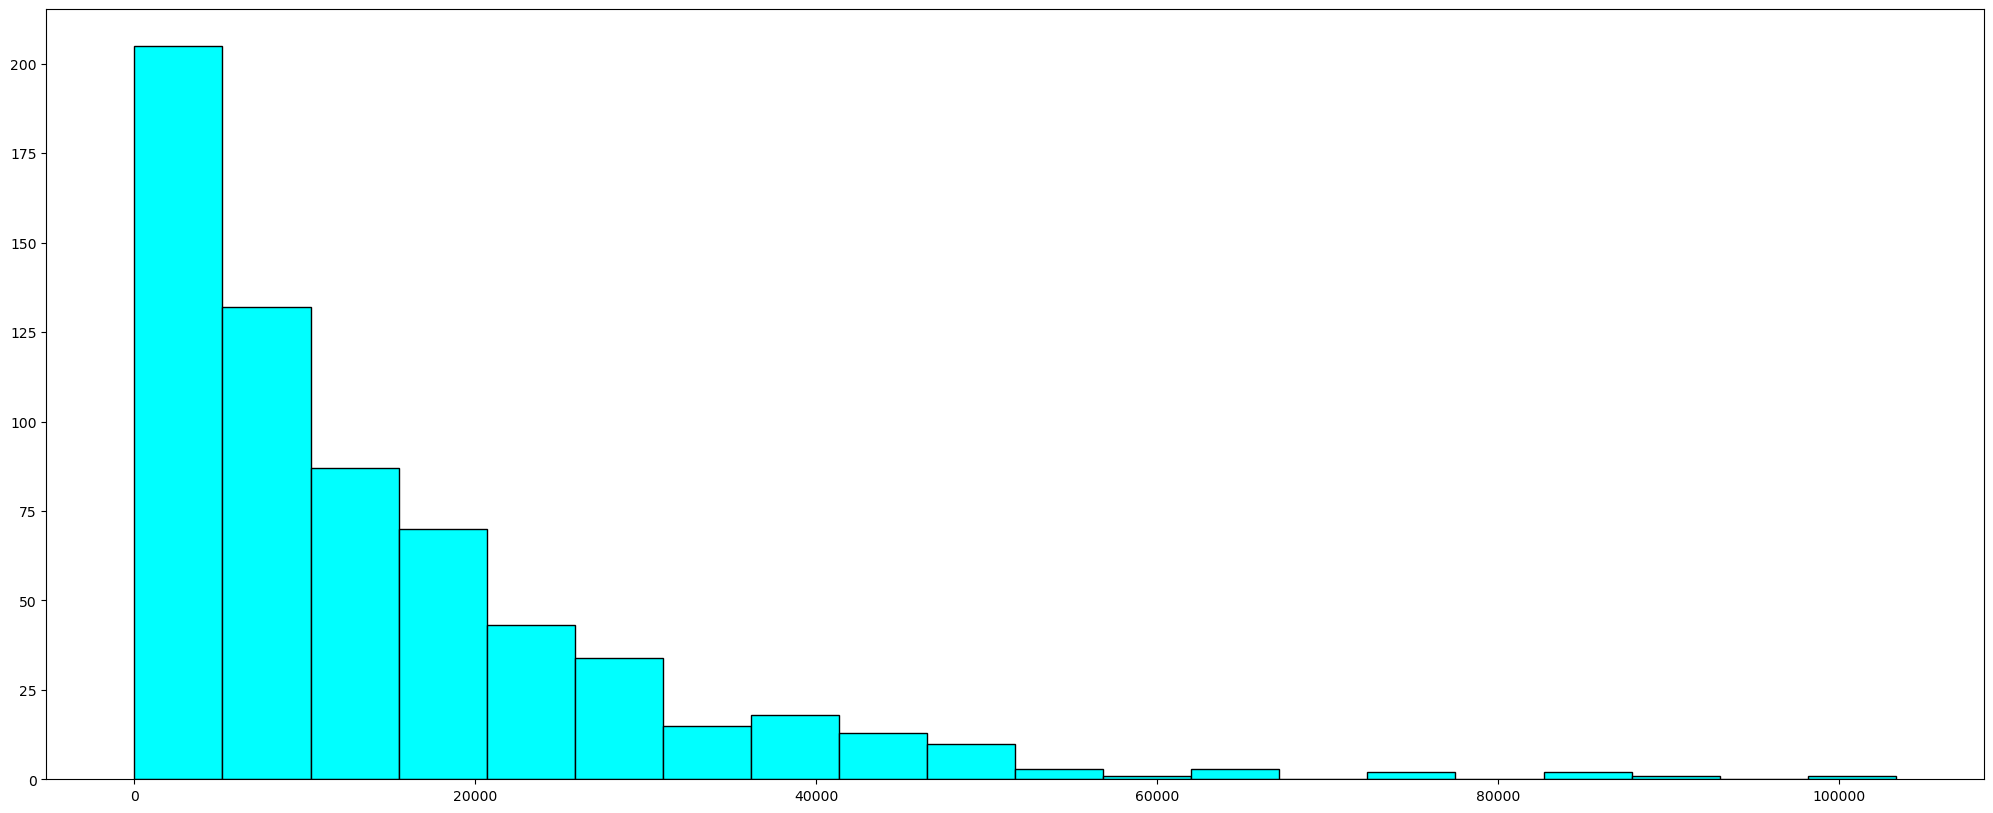

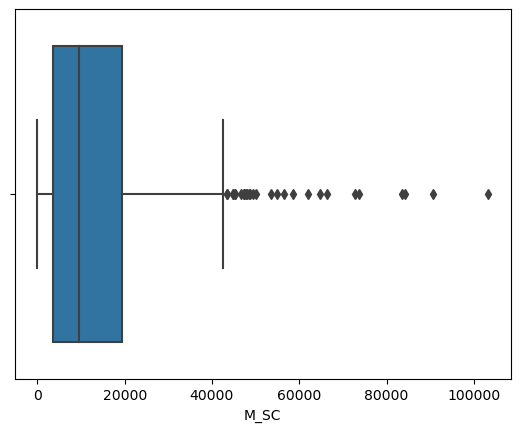

Description of F_SC
----------------------------------------------------------------------------
count       640.000000
mean      20778.392188
std       21727.887713
min           0.000000
25%        5603.250000
50%       13709.000000
75%       29180.000000
max      156429.000000
Name: F_SC, dtype: float64 Distribution of F_SC
----------------------------------------------------------------------------
BoxPlot of F_SC
----------------------------------------------------------------------------


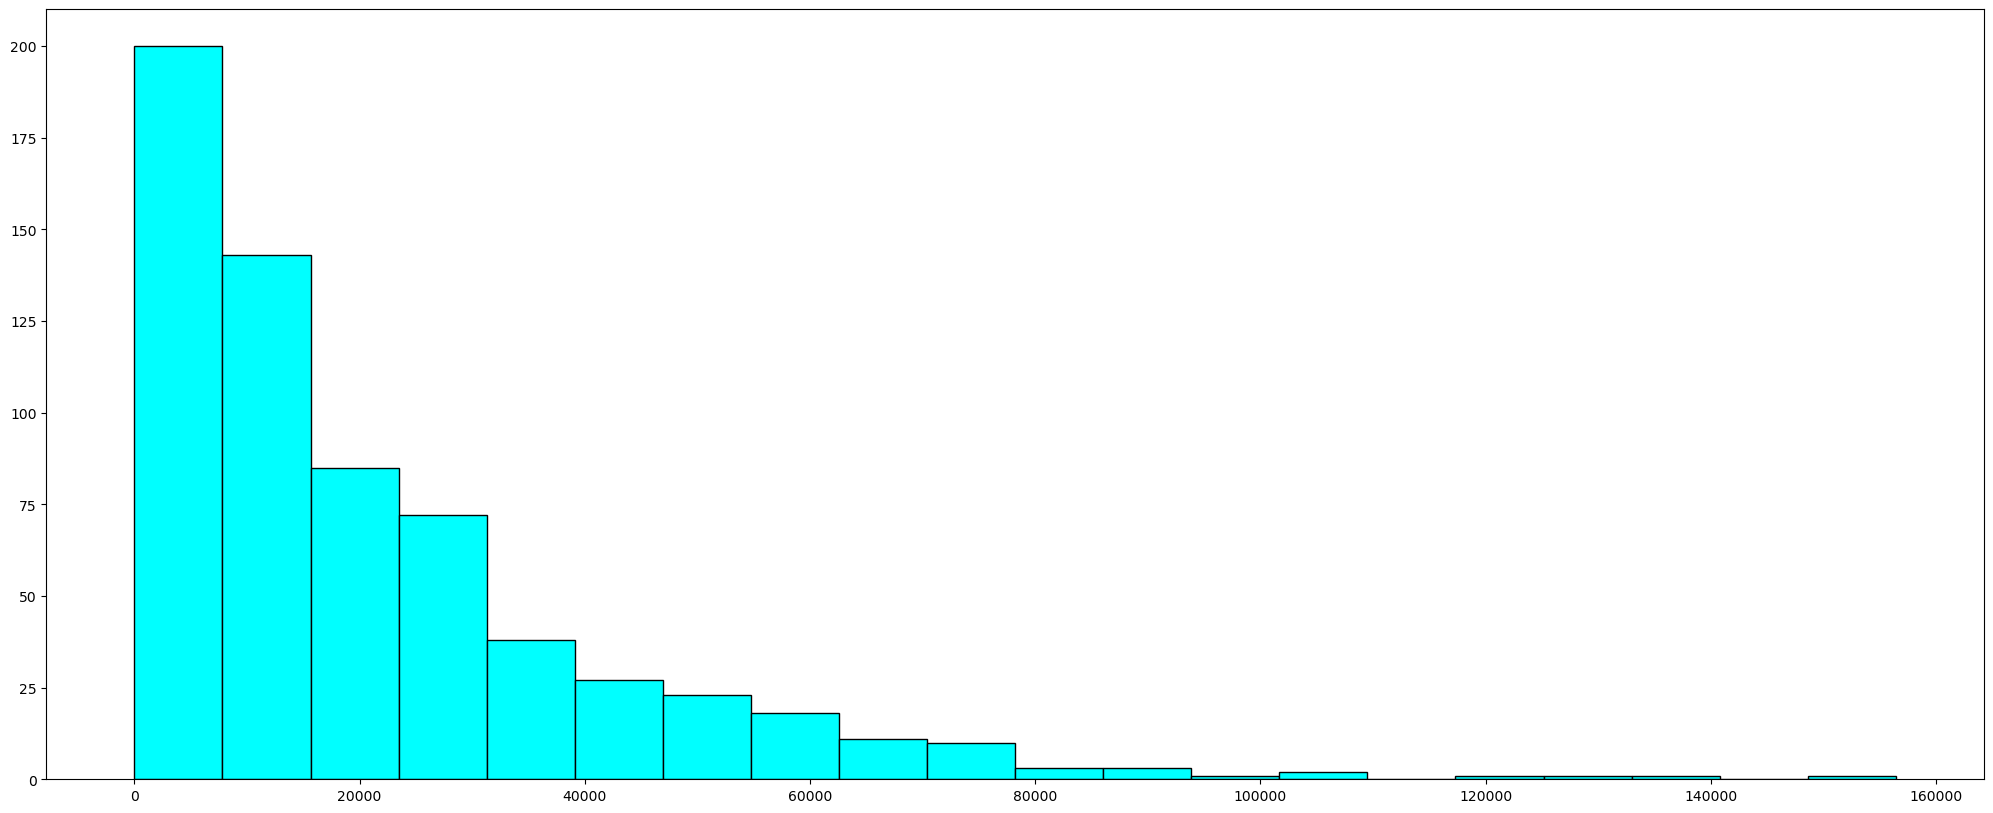

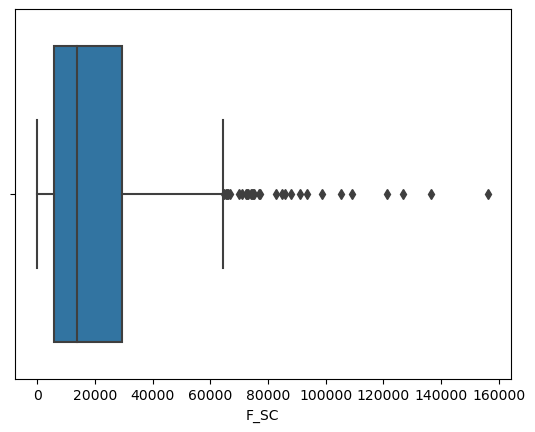

Description of M_ST
----------------------------------------------------------------------------
count      640.000000
mean      6191.807813
std       9912.668948
min          0.000000
25%        293.750000
50%       2333.500000
75%       7658.000000
max      96785.000000
Name: M_ST, dtype: float64 Distribution of M_ST
----------------------------------------------------------------------------
BoxPlot of M_ST
----------------------------------------------------------------------------


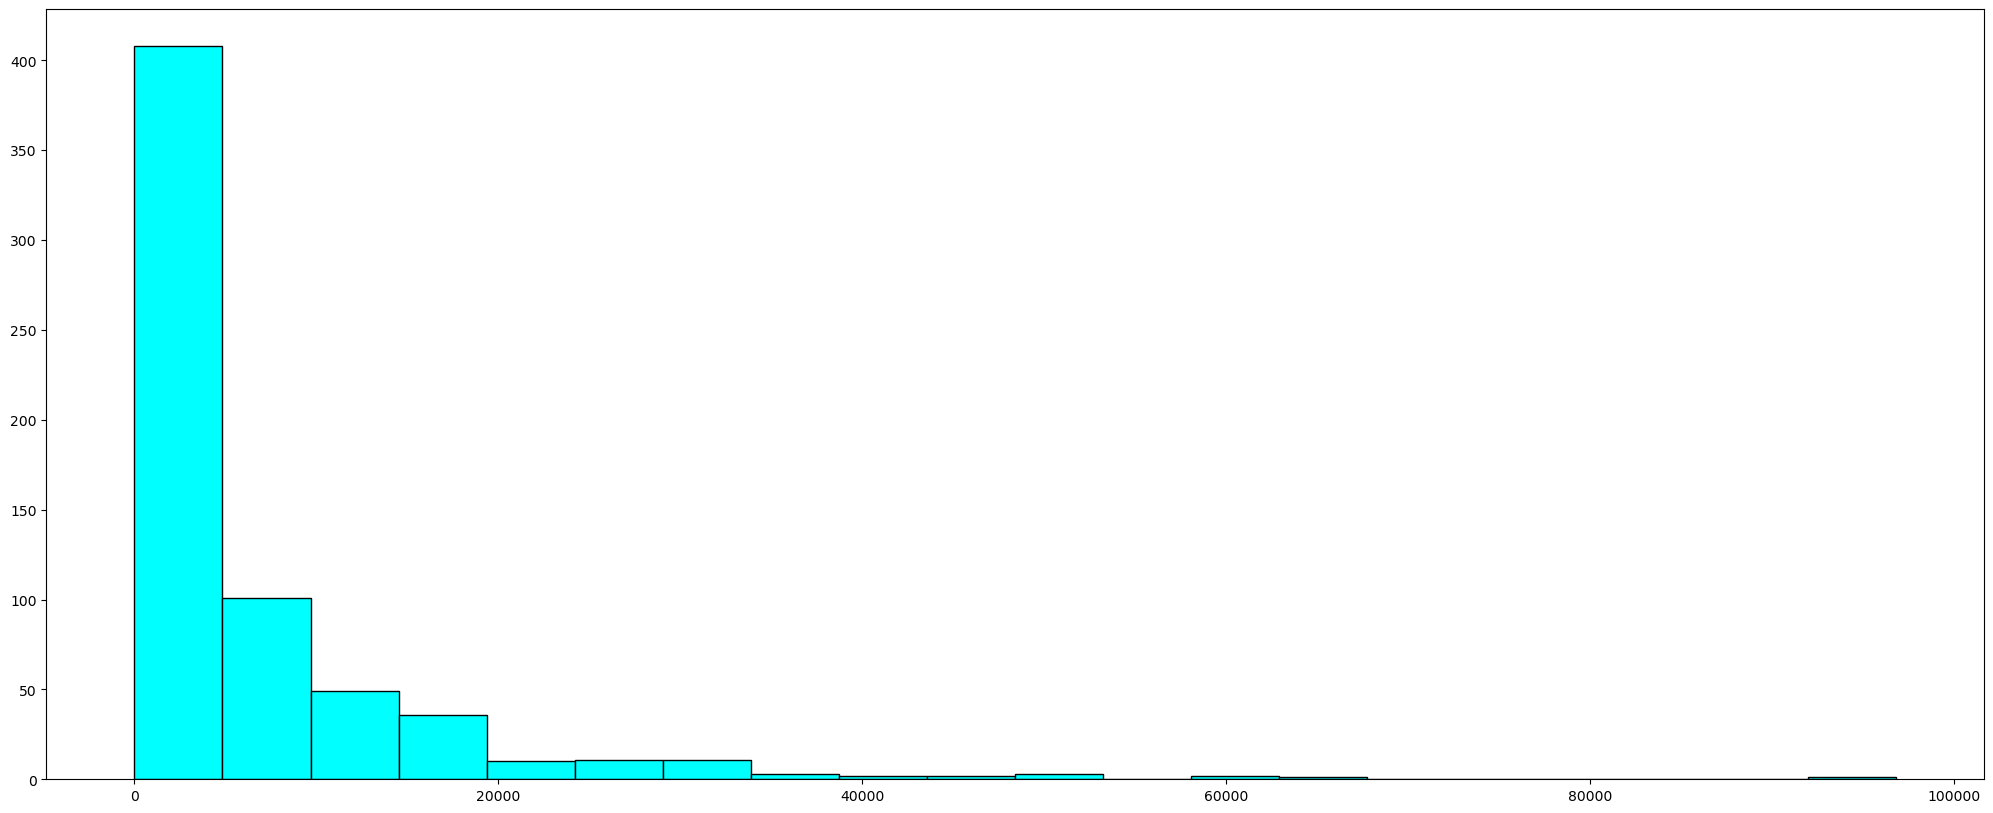

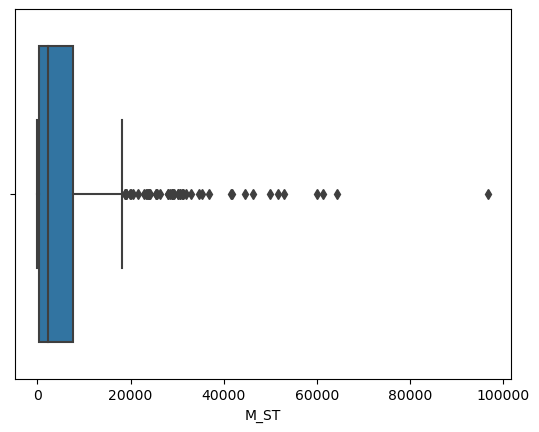

Description of F_ST
----------------------------------------------------------------------------
count       640.000000
mean      10155.640625
std       15875.701488
min           0.000000
25%         429.500000
50%        3834.500000
75%       12480.250000
max      130119.000000
Name: F_ST, dtype: float64 Distribution of F_ST
----------------------------------------------------------------------------
BoxPlot of F_ST
----------------------------------------------------------------------------


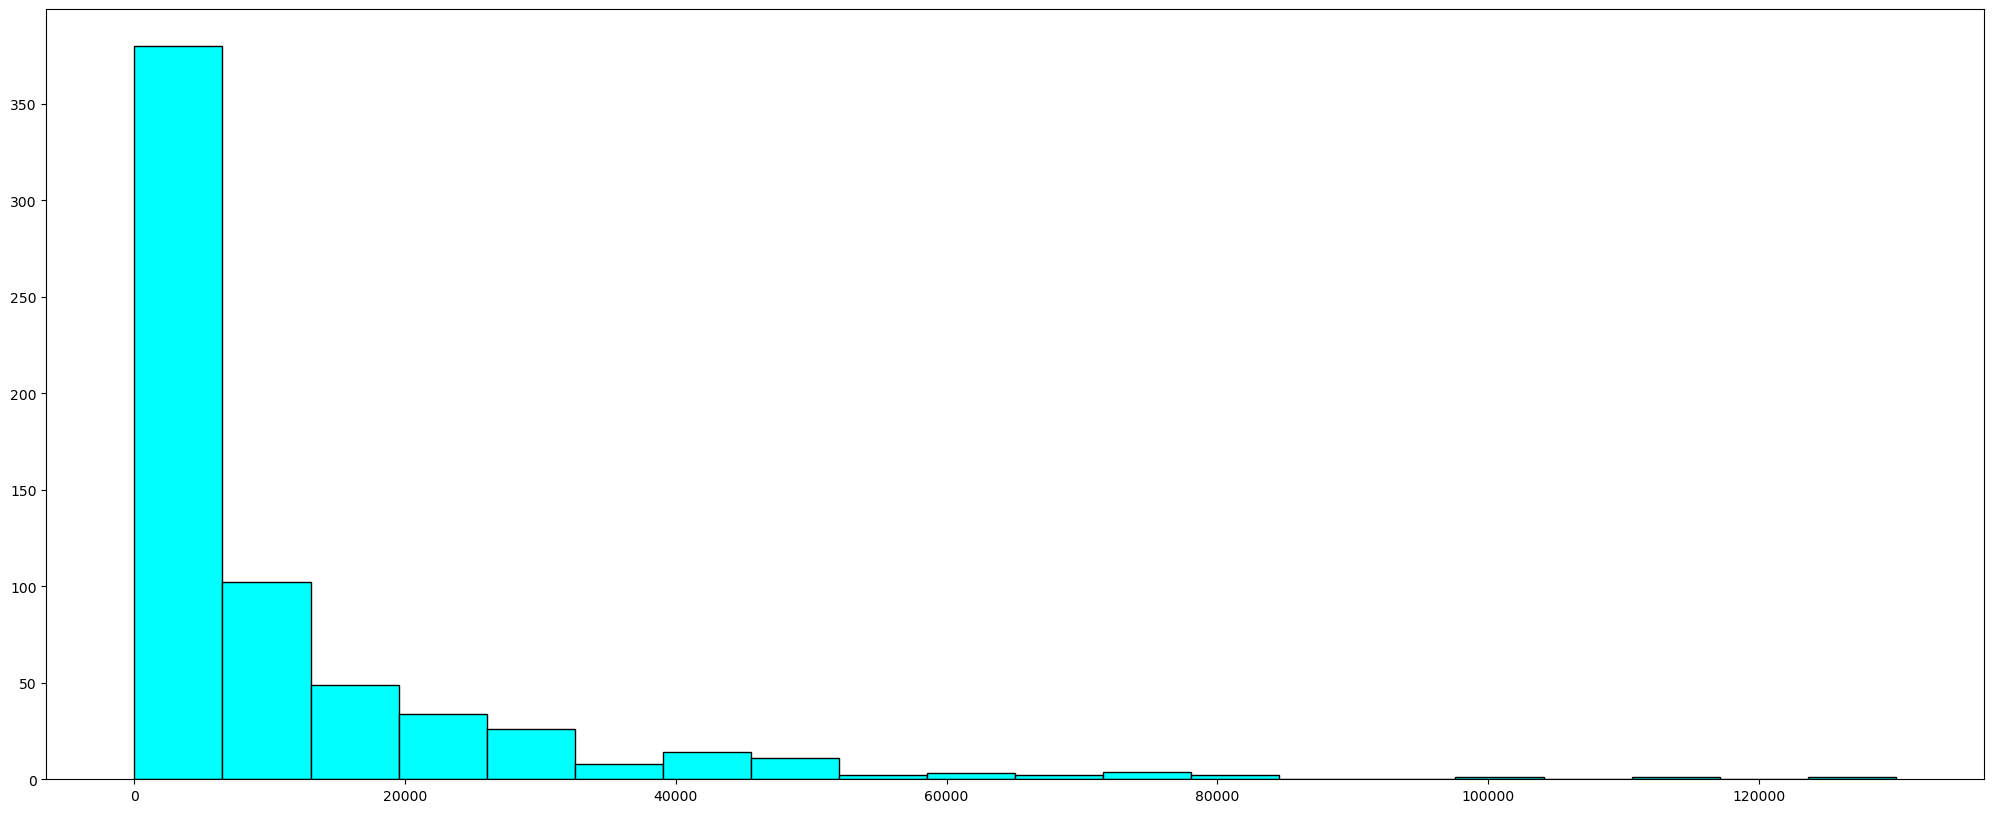

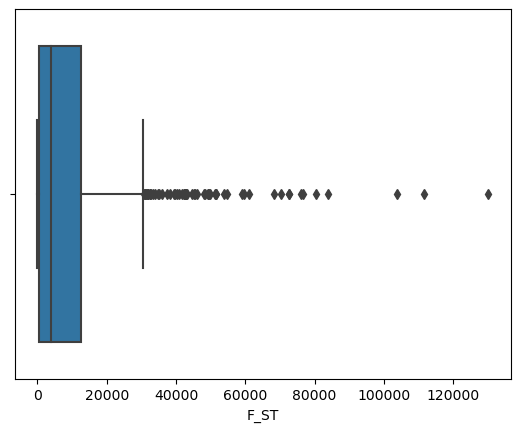

Description of M_LIT
----------------------------------------------------------------------------
count       640.000000
mean      57967.979688
std       55910.282466
min         286.000000
25%       21298.000000
50%       42693.500000
75%       77989.500000
max      403261.000000
Name: M_LIT, dtype: float64 Distribution of M_LIT
----------------------------------------------------------------------------
BoxPlot of M_LIT
----------------------------------------------------------------------------


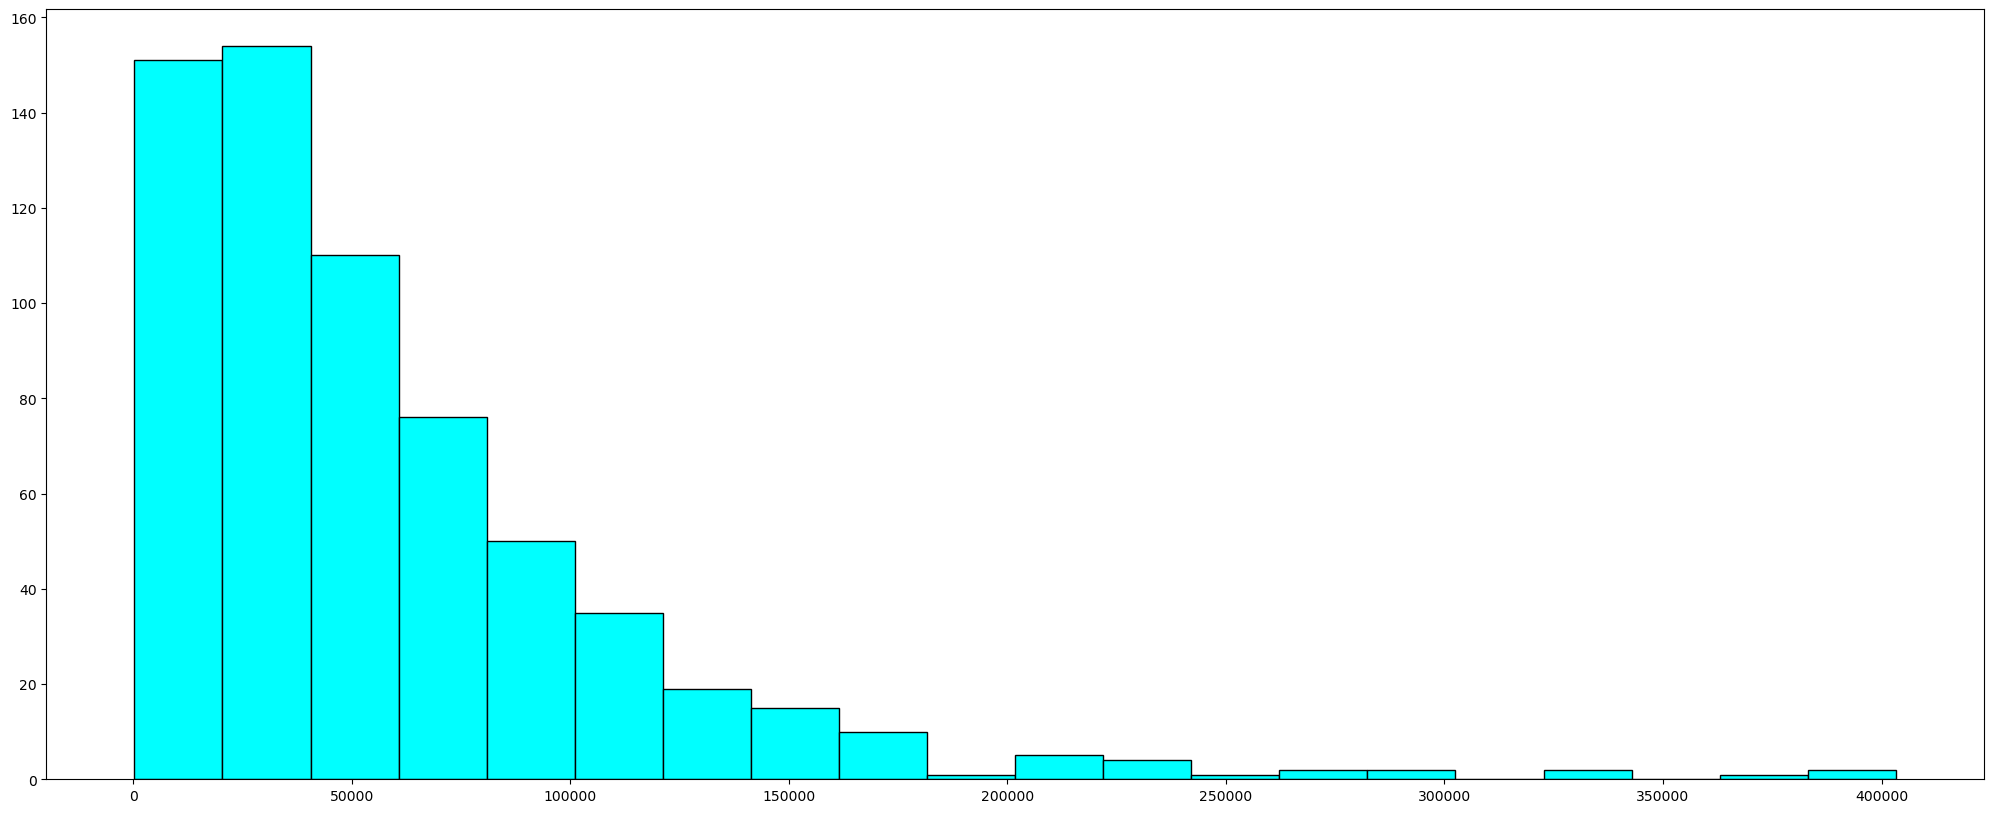

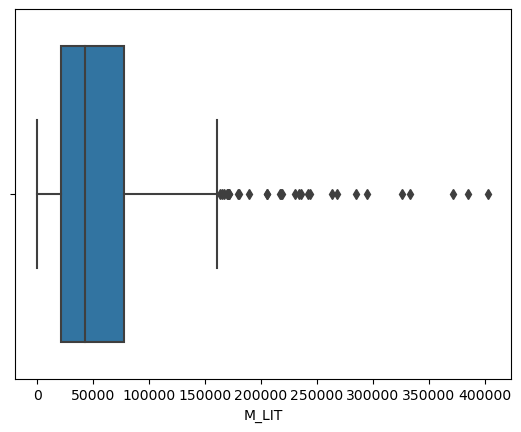

Description of F_LIT
----------------------------------------------------------------------------
count       640.000000
mean      66359.565625
std       75037.860207
min         371.000000
25%       20932.000000
50%       43796.500000
75%       84799.750000
max      571140.000000
Name: F_LIT, dtype: float64 Distribution of F_LIT
----------------------------------------------------------------------------
BoxPlot of F_LIT
----------------------------------------------------------------------------


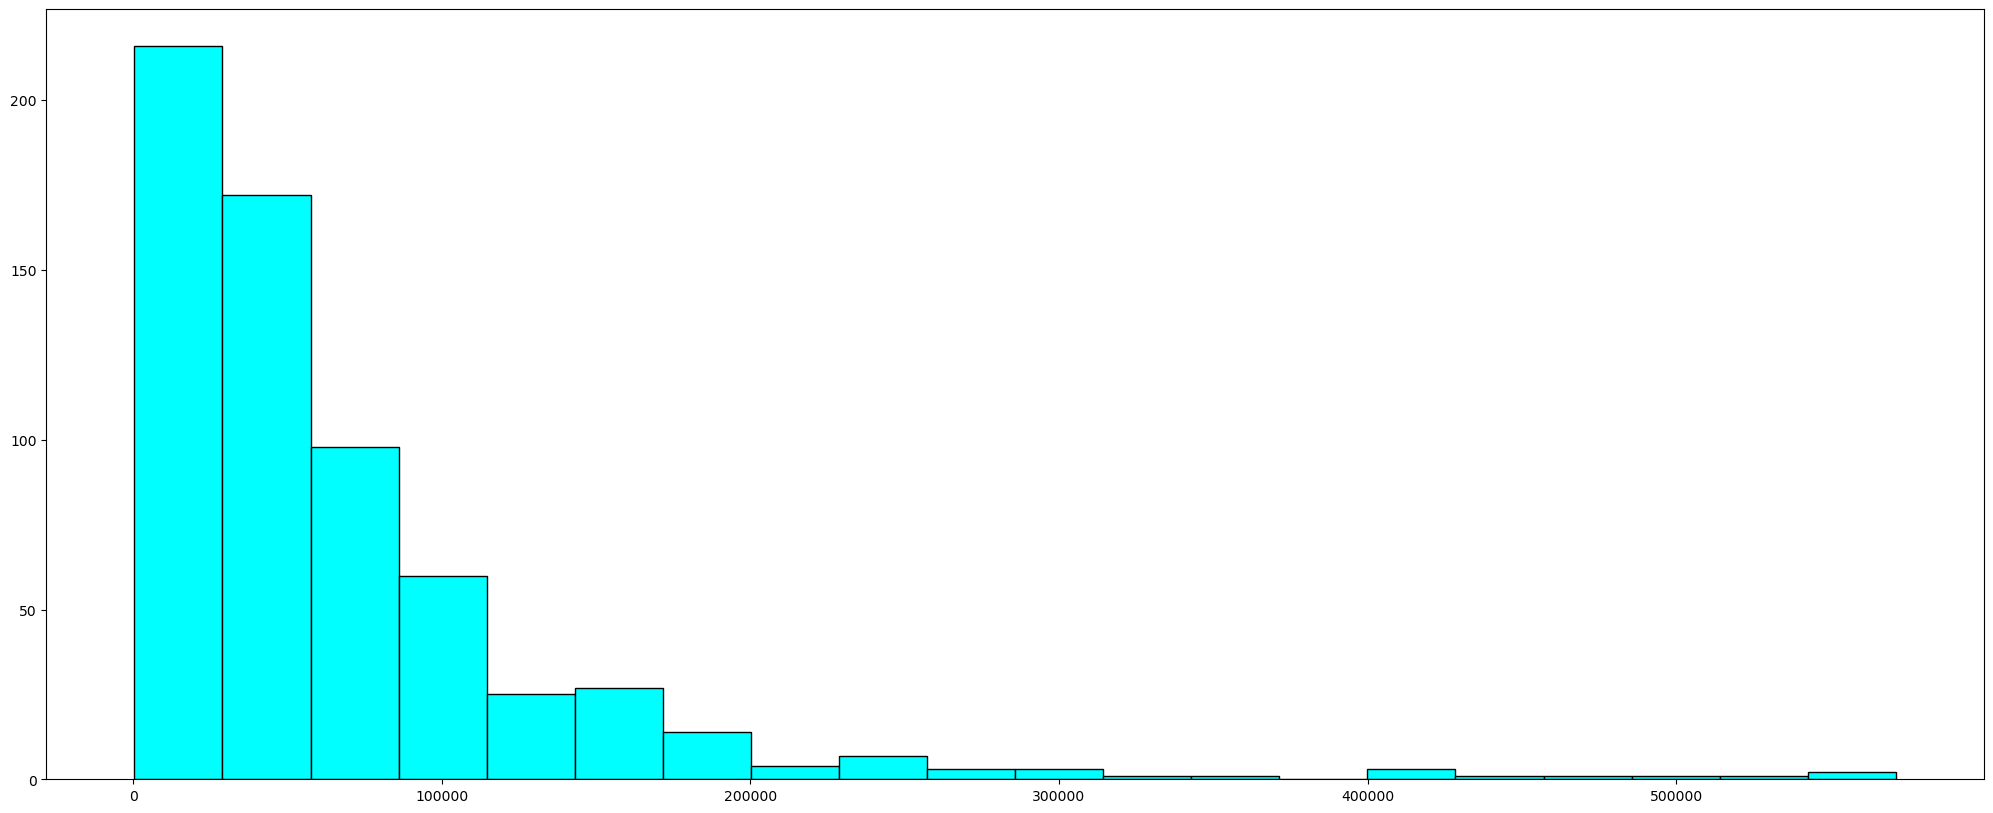

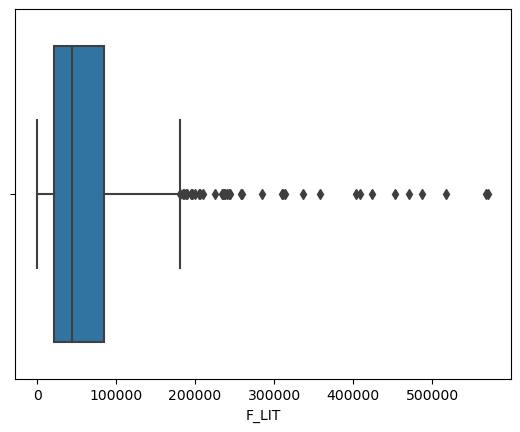

Description of M_ILL
----------------------------------------------------------------------------
count       640.000000
mean      21972.596875
std       19825.605268
min         105.000000
25%        8590.000000
50%       15767.500000
75%       29512.500000
max      105961.000000
Name: M_ILL, dtype: float64 Distribution of M_ILL
----------------------------------------------------------------------------
BoxPlot of M_ILL
----------------------------------------------------------------------------


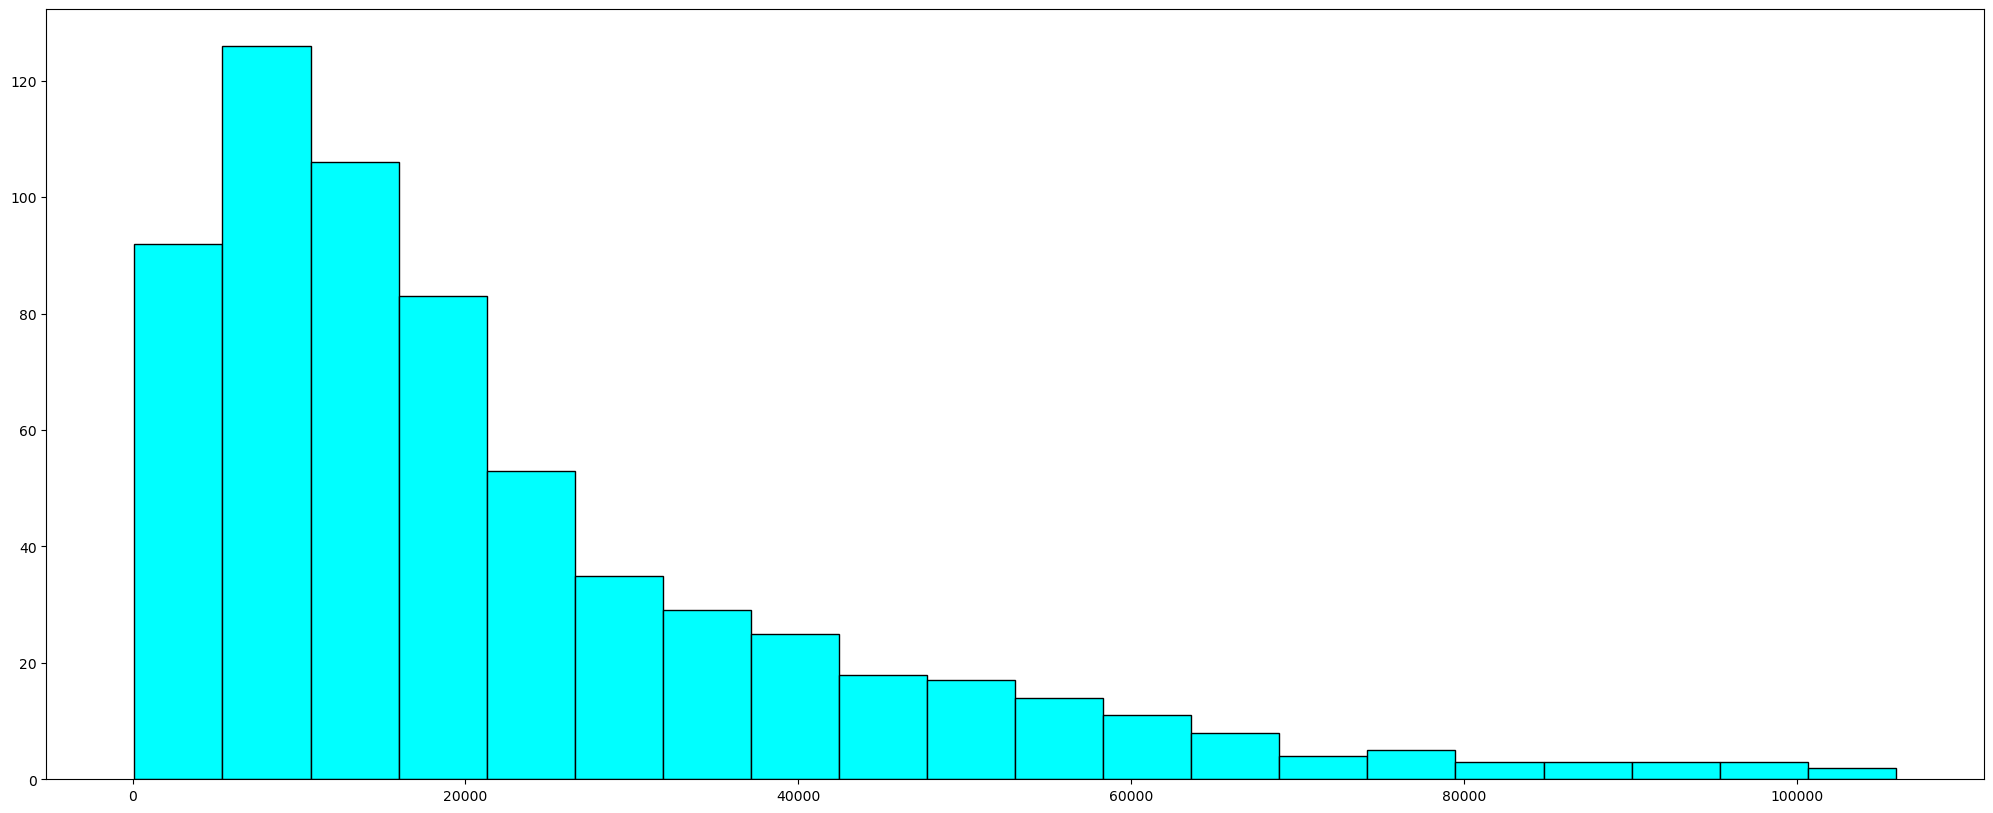

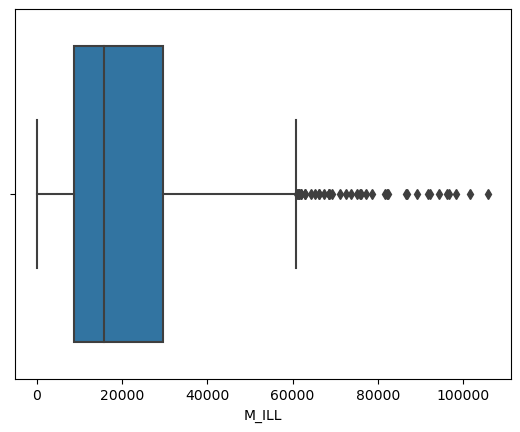

Description of F_ILL
----------------------------------------------------------------------------
count       640.000000
mean      56012.518750
std       47116.693769
min         327.000000
25%       22367.000000
50%       42386.000000
75%       78471.000000
max      254160.000000
Name: F_ILL, dtype: float64 Distribution of F_ILL
----------------------------------------------------------------------------
BoxPlot of F_ILL
----------------------------------------------------------------------------


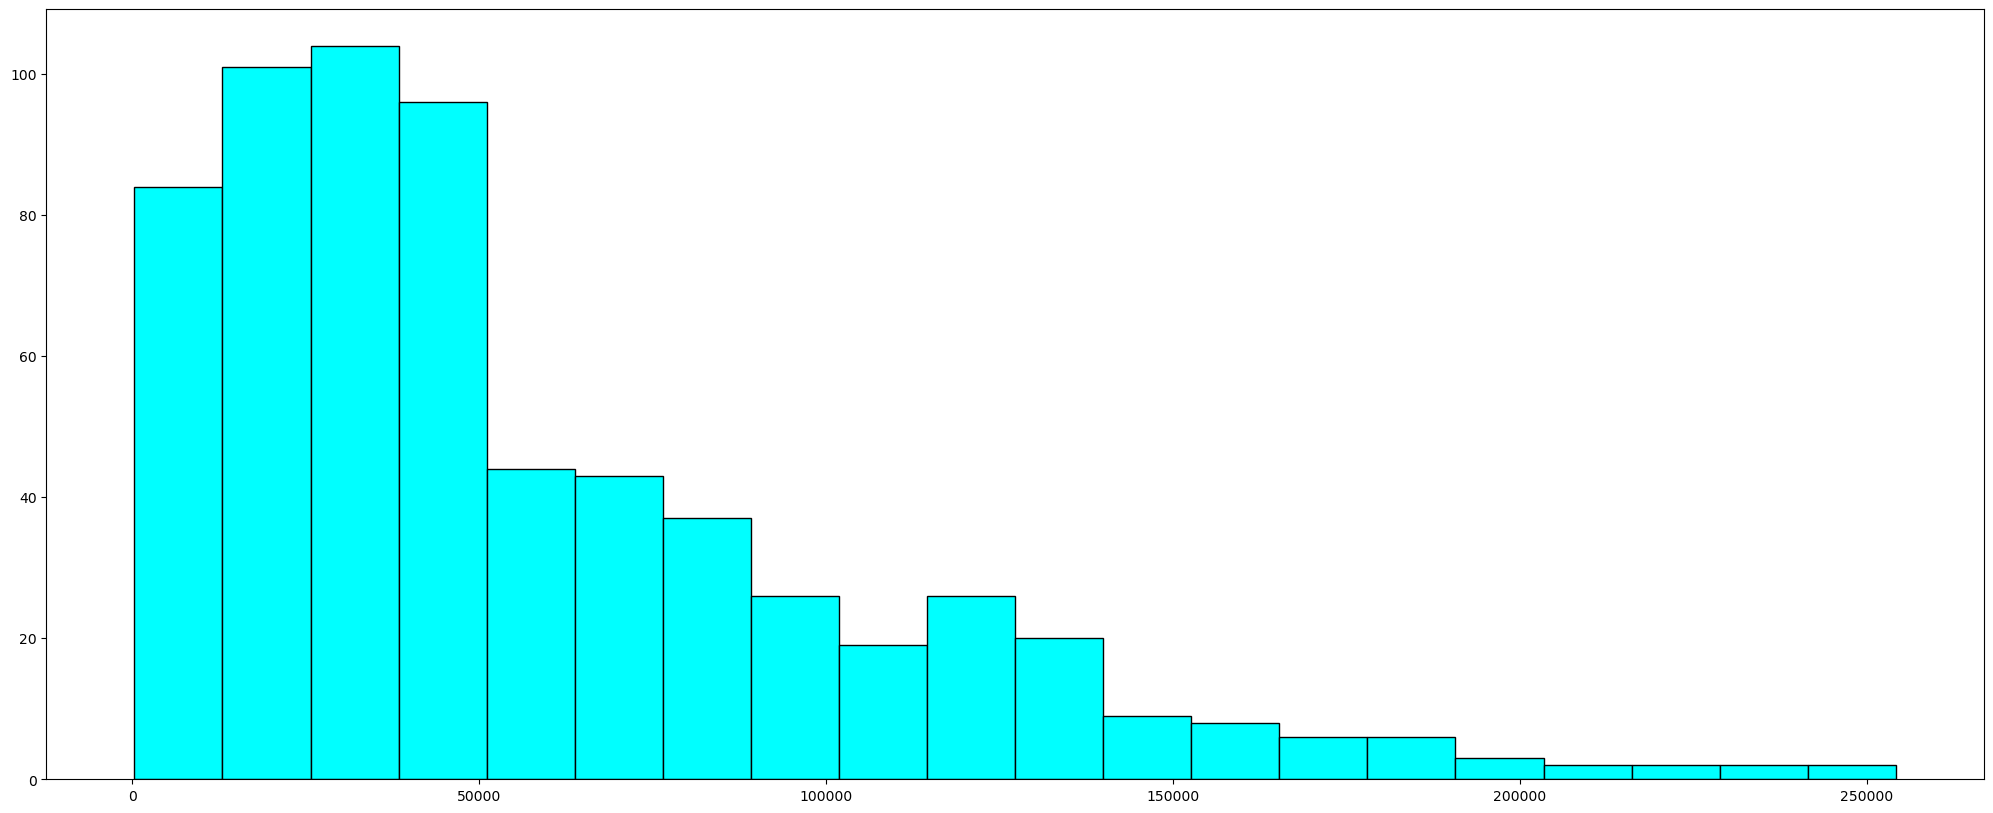

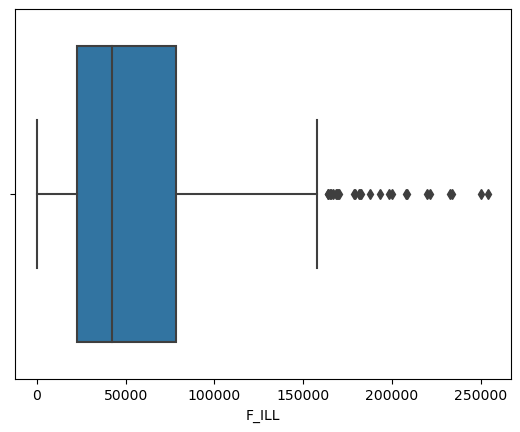

Description of TOT_WORK_M
----------------------------------------------------------------------------
count       640.000000
mean      37992.407813
std       36419.537491
min         100.000000
25%       13753.500000
50%       27936.500000
75%       50226.750000
max      269422.000000
Name: TOT_WORK_M, dtype: float64 Distribution of TOT_WORK_M
----------------------------------------------------------------------------
BoxPlot of TOT_WORK_M
----------------------------------------------------------------------------


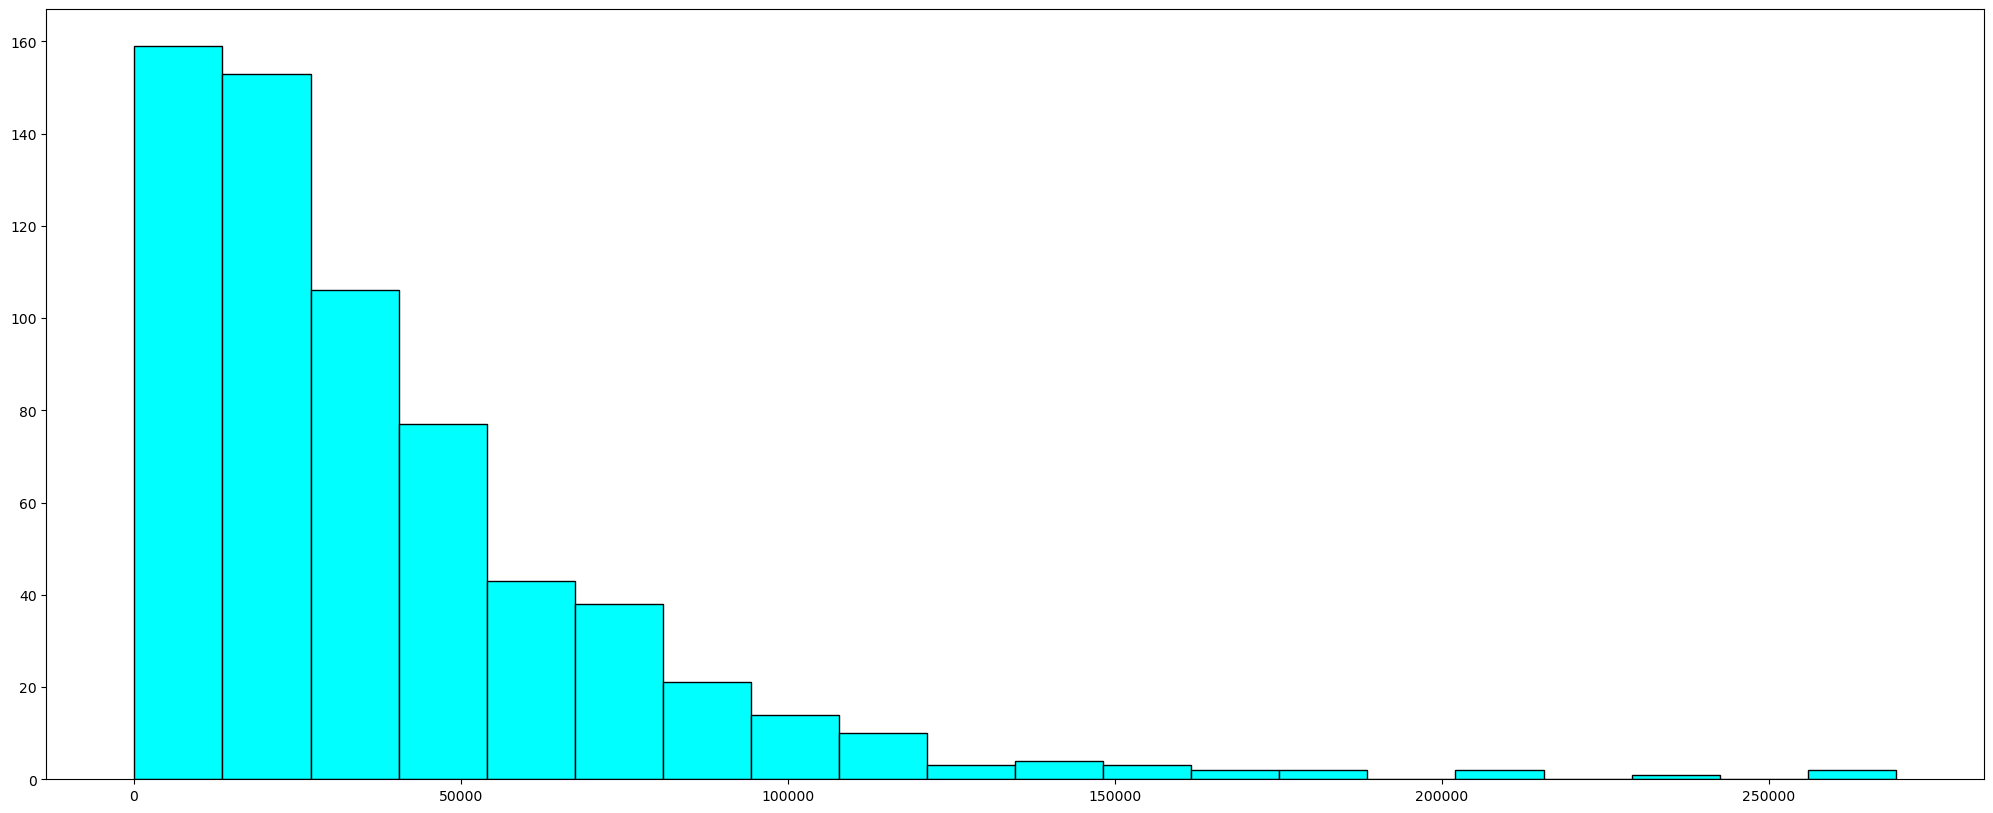

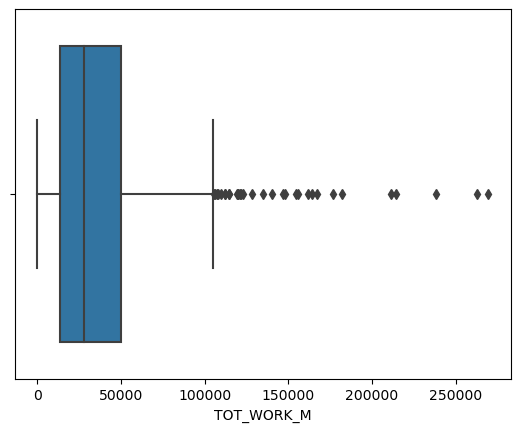

Description of TOT_WORK_F
----------------------------------------------------------------------------
count       640.000000
mean      41295.760938
std       37192.360943
min         357.000000
25%       16097.750000
50%       30588.500000
75%       53234.250000
max      257848.000000
Name: TOT_WORK_F, dtype: float64 Distribution of TOT_WORK_F
----------------------------------------------------------------------------
BoxPlot of TOT_WORK_F
----------------------------------------------------------------------------


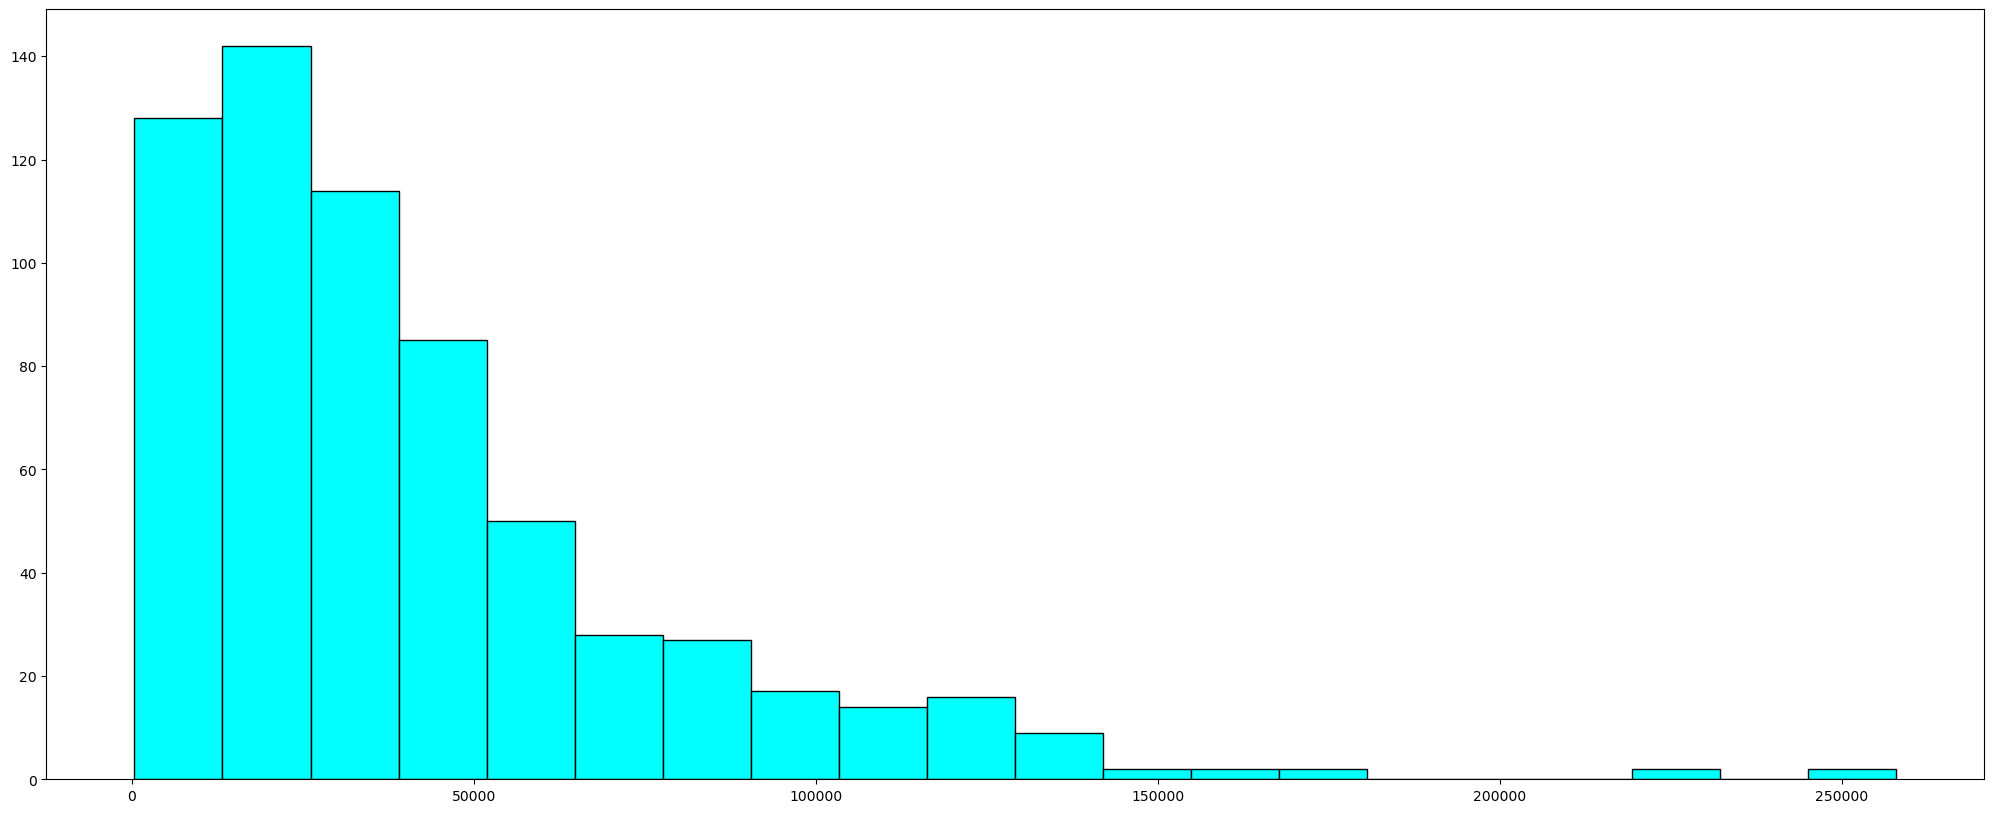

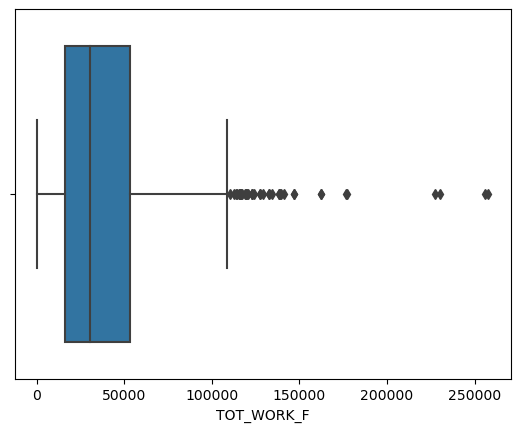

Description of MAINWORK_M
----------------------------------------------------------------------------
count       640.000000
mean      30204.446875
std       31480.915680
min          65.000000
25%        9787.000000
50%       21250.500000
75%       40119.000000
max      247911.000000
Name: MAINWORK_M, dtype: float64 Distribution of MAINWORK_M
----------------------------------------------------------------------------
BoxPlot of MAINWORK_M
----------------------------------------------------------------------------


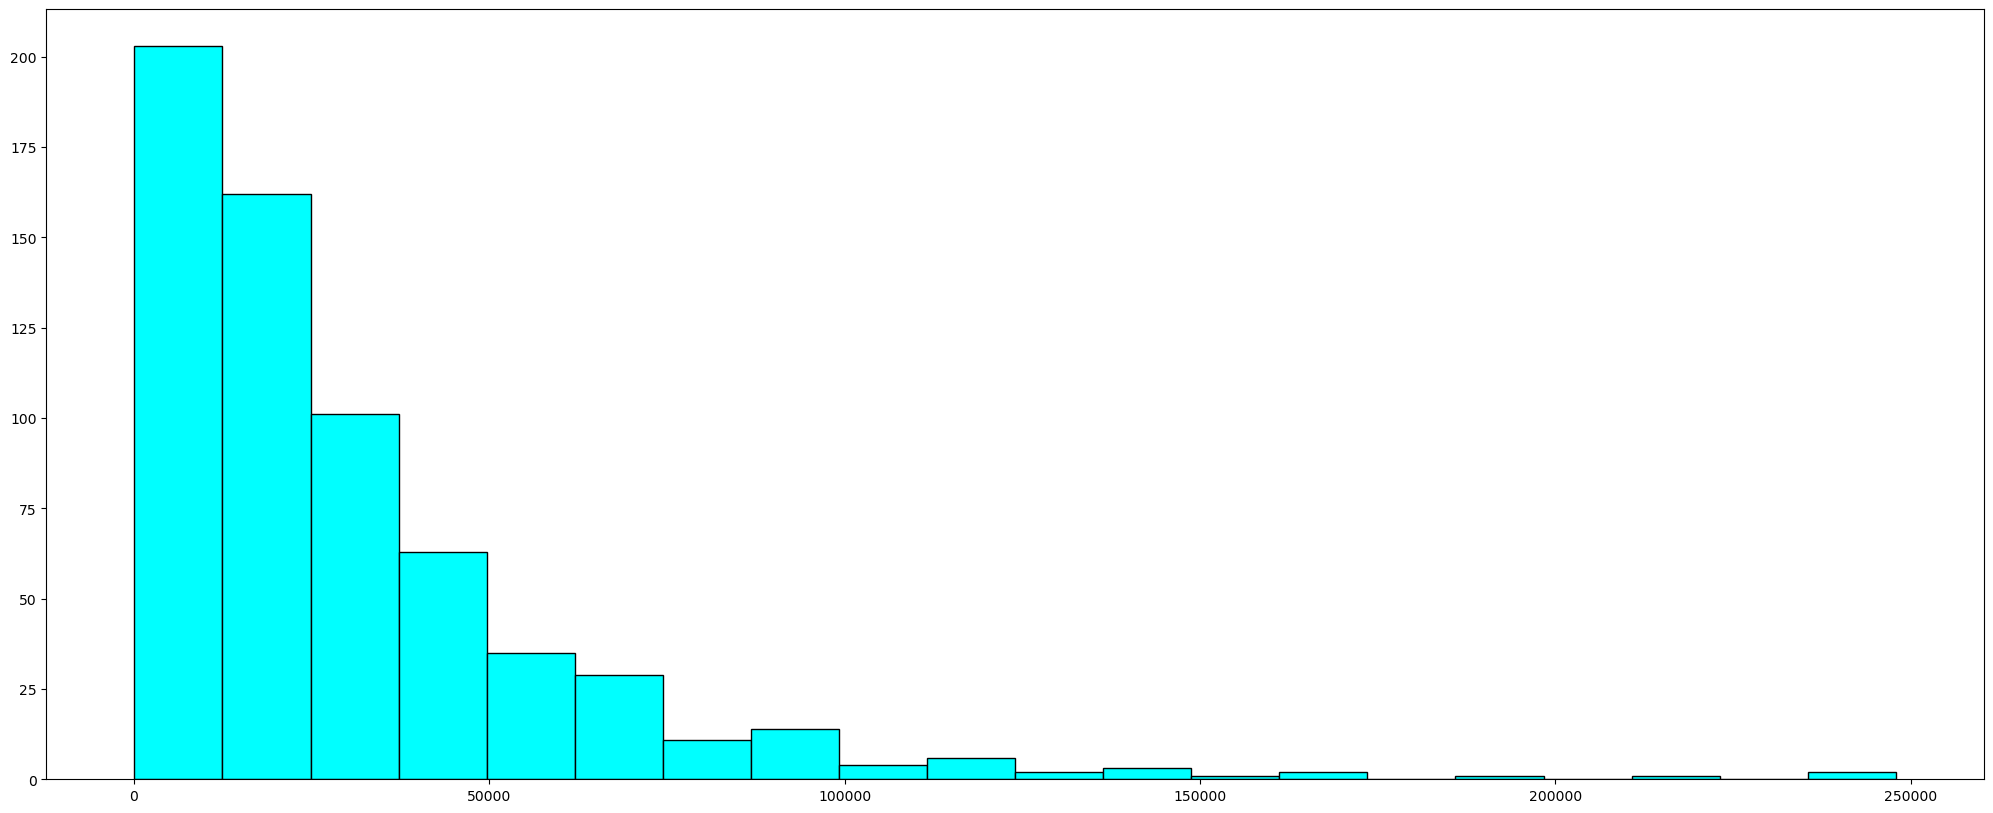

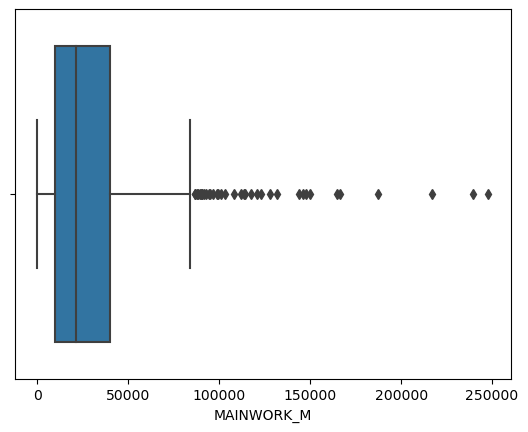

Description of MAINWORK_F
----------------------------------------------------------------------------
count       640.000000
mean      28198.846875
std       29998.262689
min         240.000000
25%        9502.250000
50%       18484.000000
75%       35063.250000
max      226166.000000
Name: MAINWORK_F, dtype: float64 Distribution of MAINWORK_F
----------------------------------------------------------------------------
BoxPlot of MAINWORK_F
----------------------------------------------------------------------------


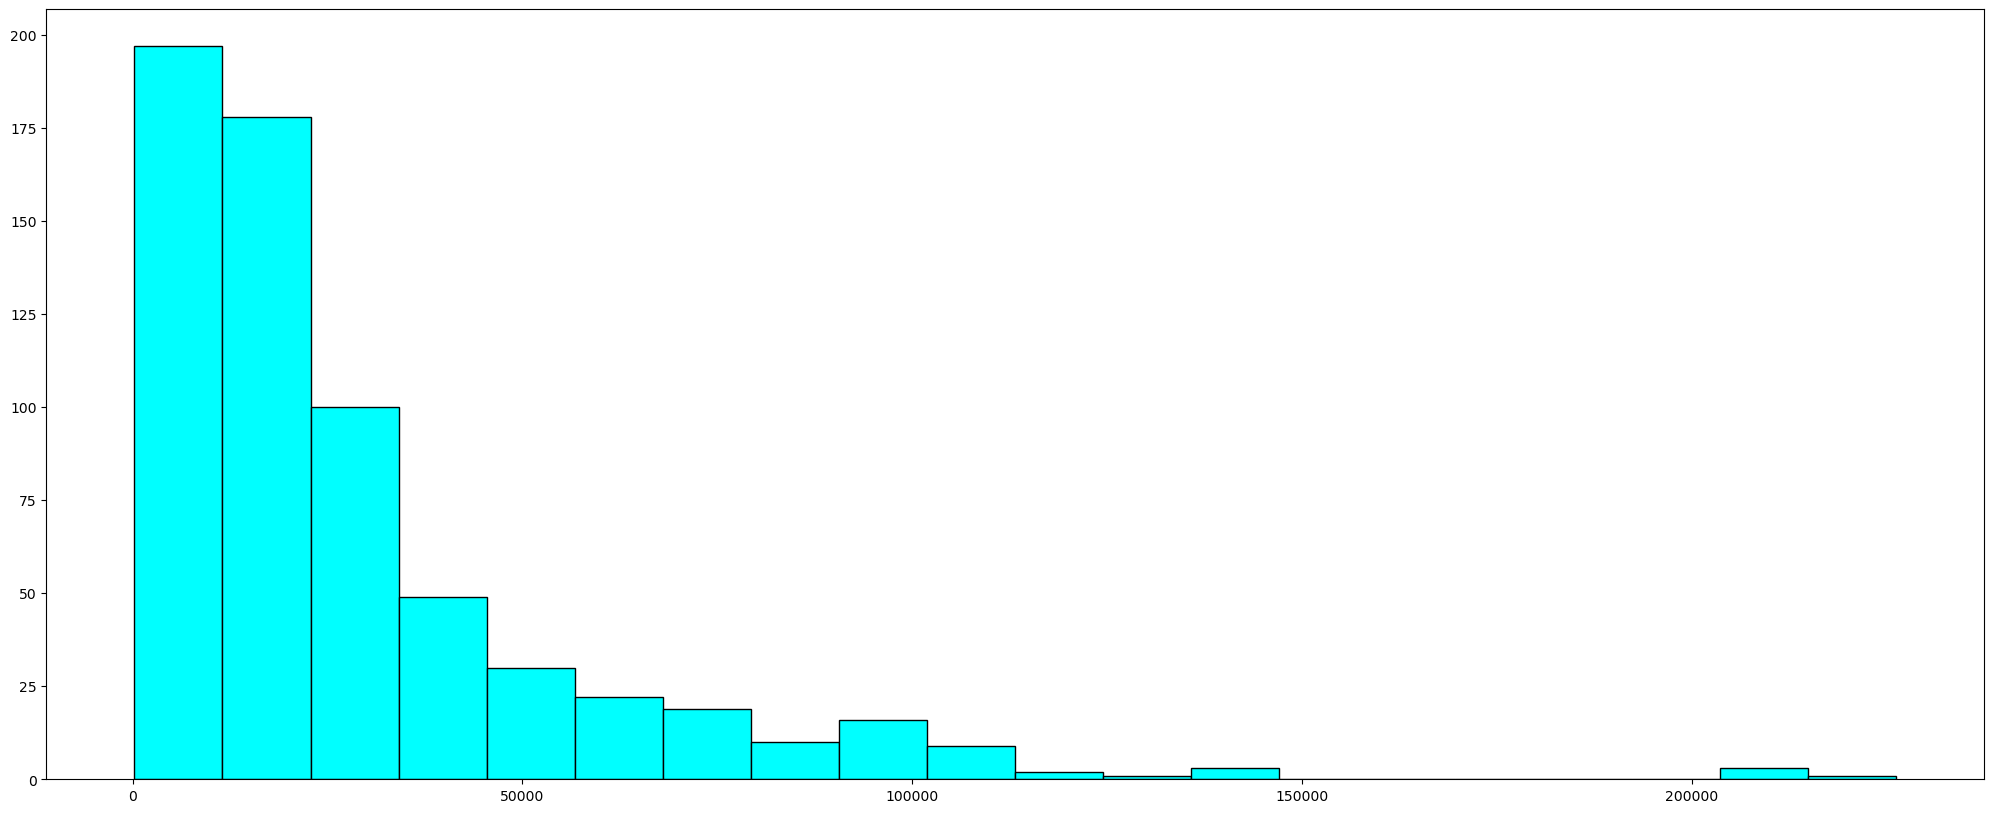

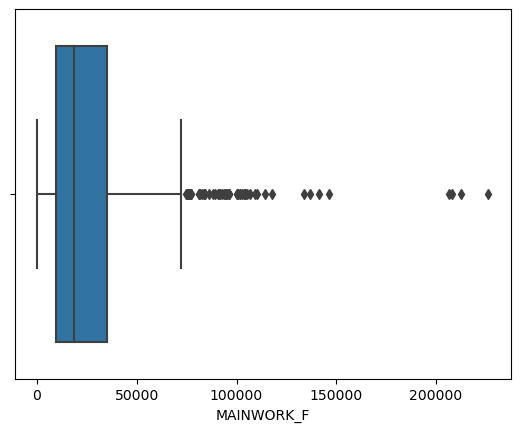

Description of MAIN_CL_M
----------------------------------------------------------------------------
count      640.000000
mean      5424.342188
std       4739.161969
min          0.000000
25%       2023.500000
50%       4160.500000
75%       7695.000000
max      29113.000000
Name: MAIN_CL_M, dtype: float64 Distribution of MAIN_CL_M
----------------------------------------------------------------------------
BoxPlot of MAIN_CL_M
----------------------------------------------------------------------------


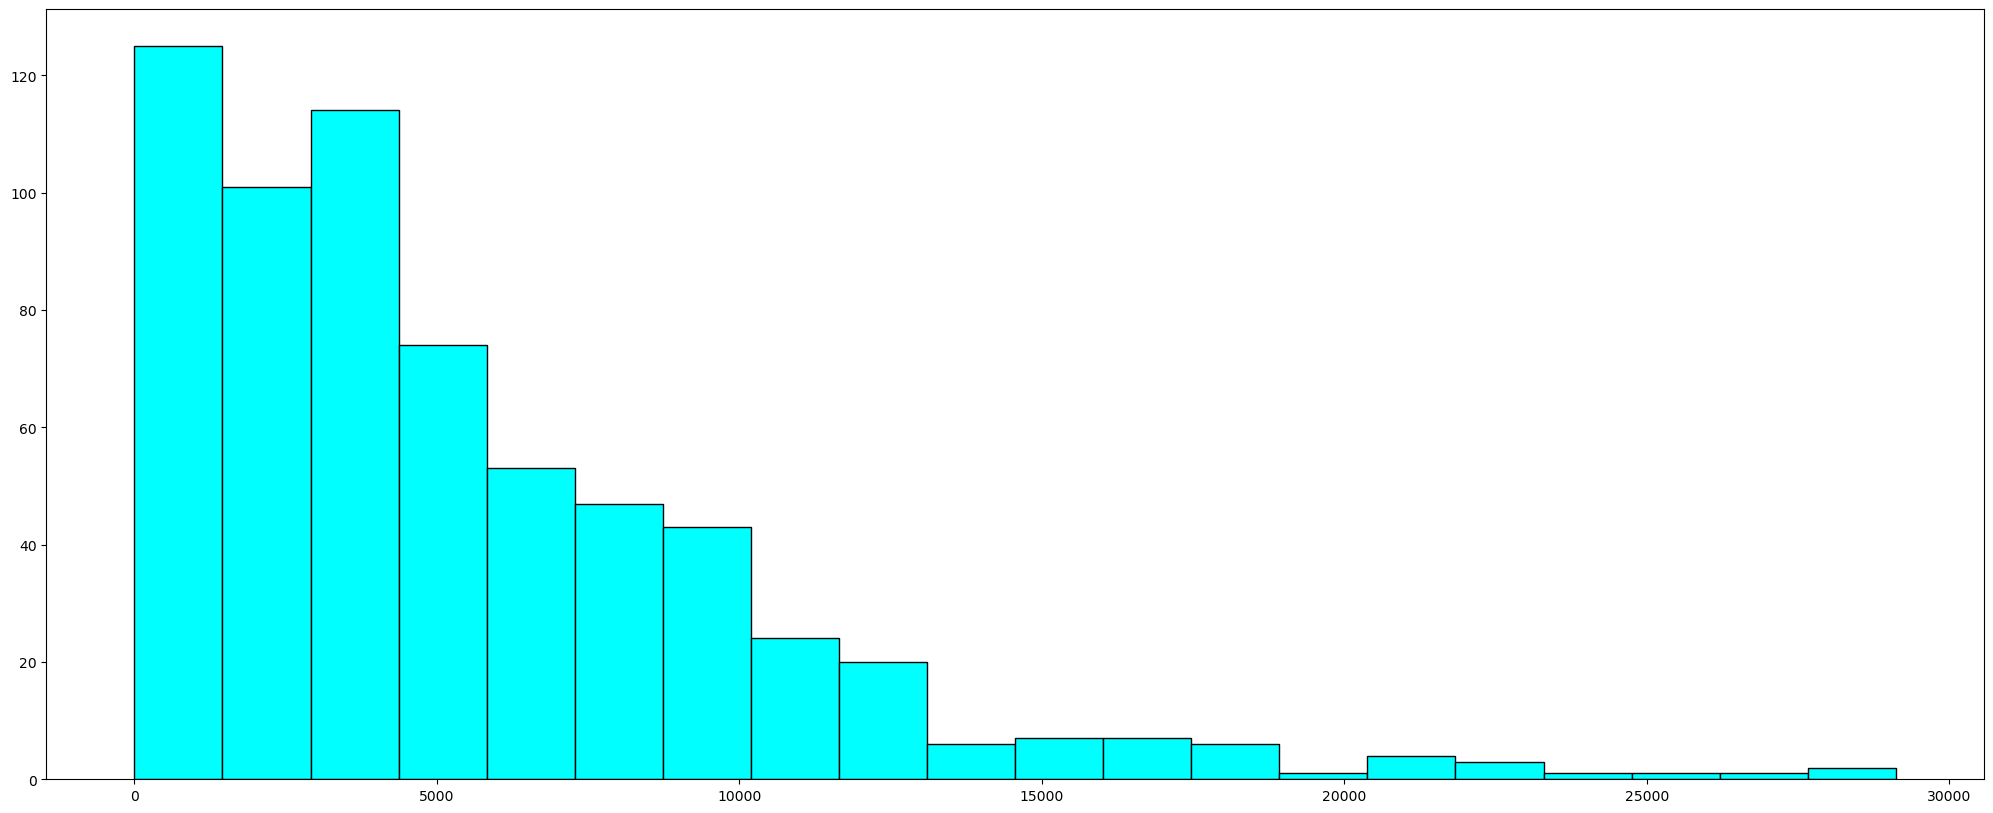

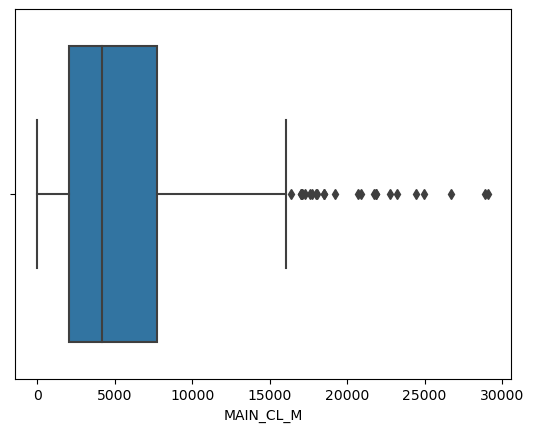

Description of MAIN_CL_F
----------------------------------------------------------------------------
count      640.000000
mean      5486.042188
std       5326.362728
min          0.000000
25%       1920.250000
50%       3908.500000
75%       7286.250000
max      36193.000000
Name: MAIN_CL_F, dtype: float64 Distribution of MAIN_CL_F
----------------------------------------------------------------------------
BoxPlot of MAIN_CL_F
----------------------------------------------------------------------------


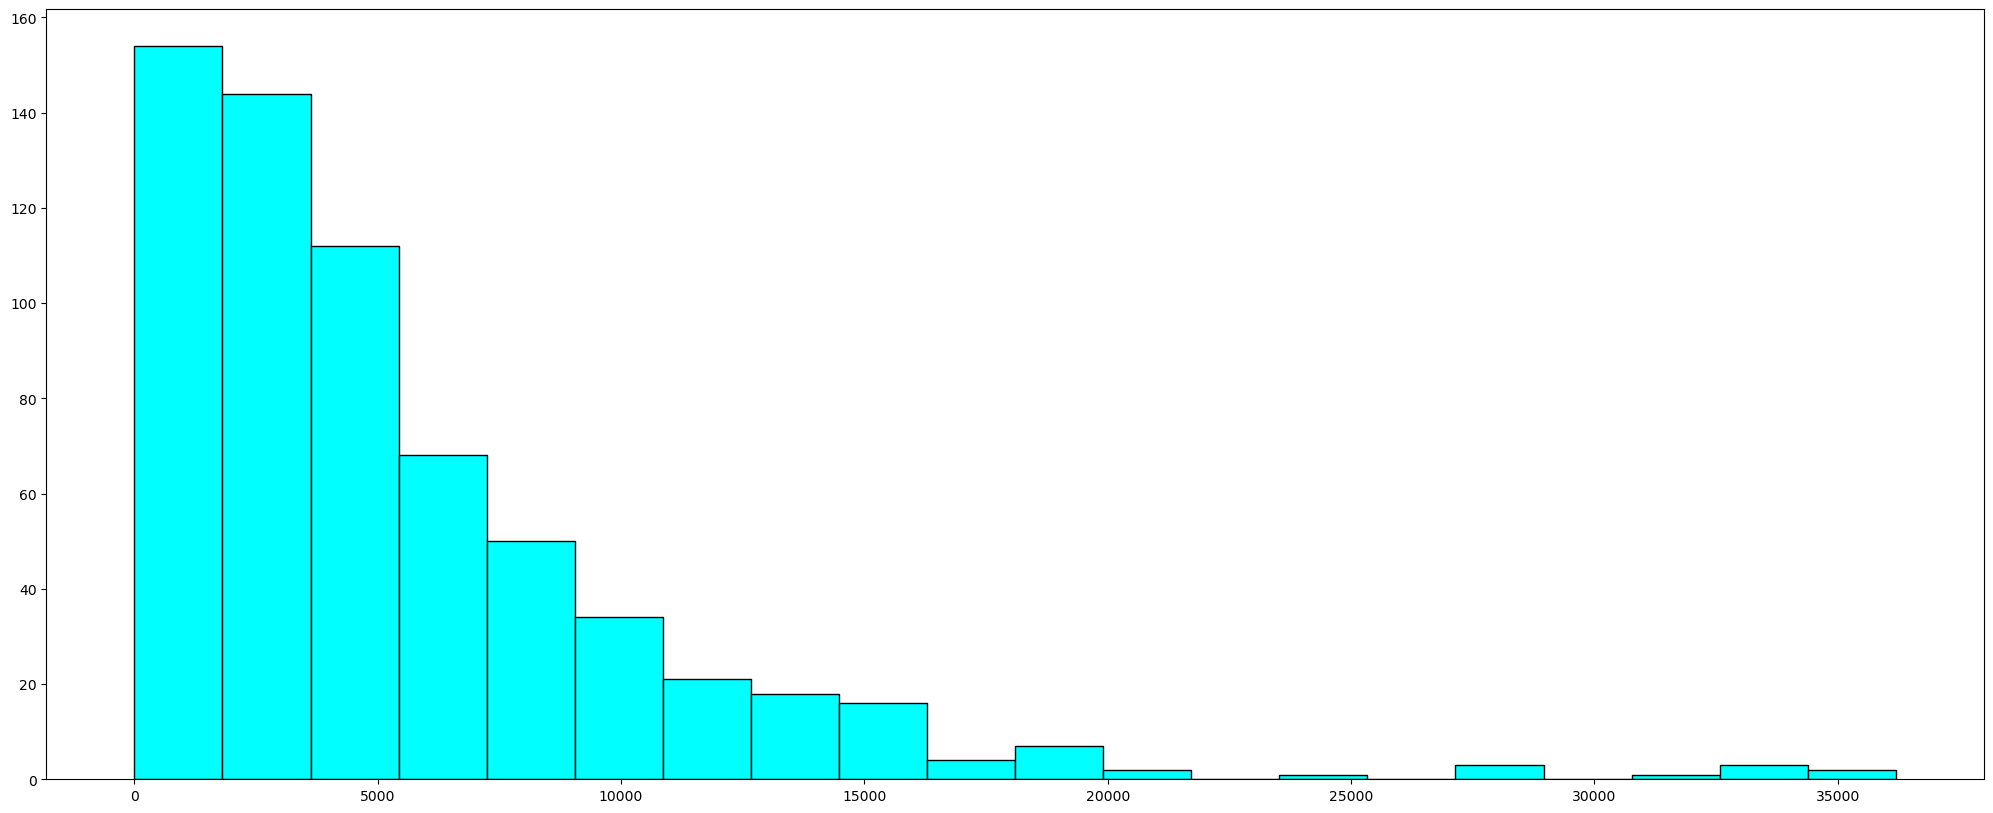

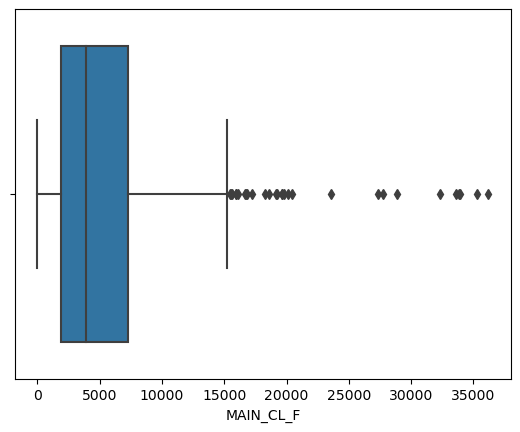

Description of MAIN_AL_M
----------------------------------------------------------------------------
count      640.000000
mean      5849.109375
std       6399.507966
min          0.000000
25%       1070.250000
50%       3936.500000
75%       8067.250000
max      40843.000000
Name: MAIN_AL_M, dtype: float64 Distribution of MAIN_AL_M
----------------------------------------------------------------------------
BoxPlot of MAIN_AL_M
----------------------------------------------------------------------------


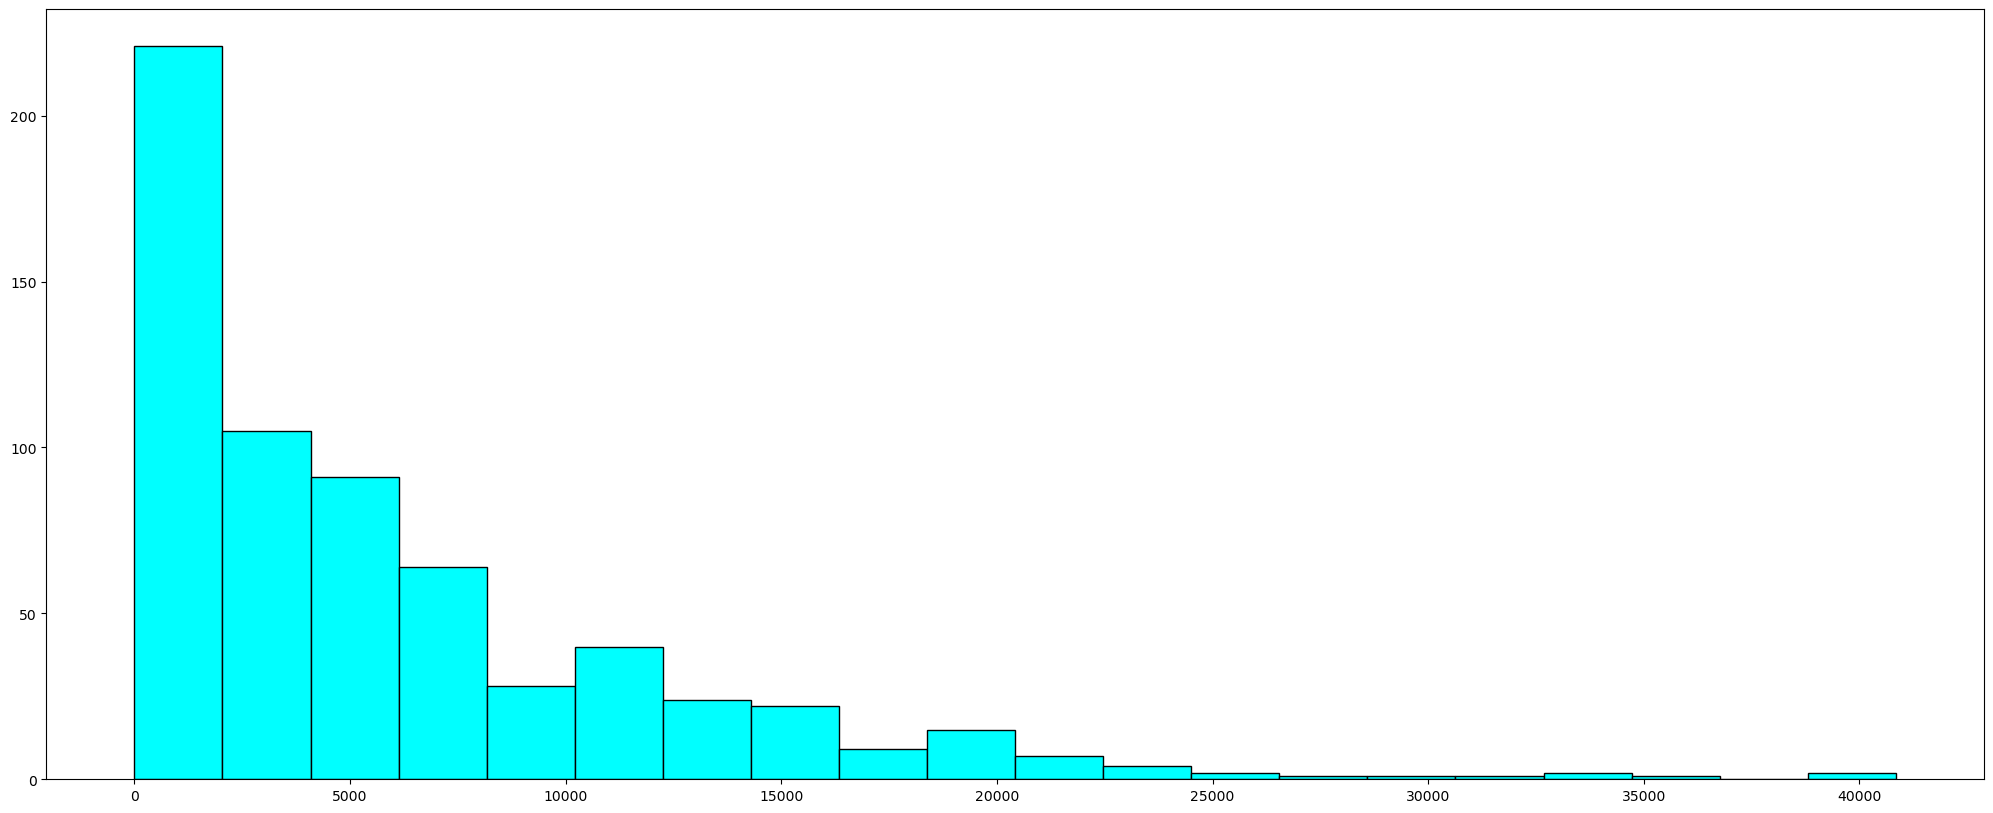

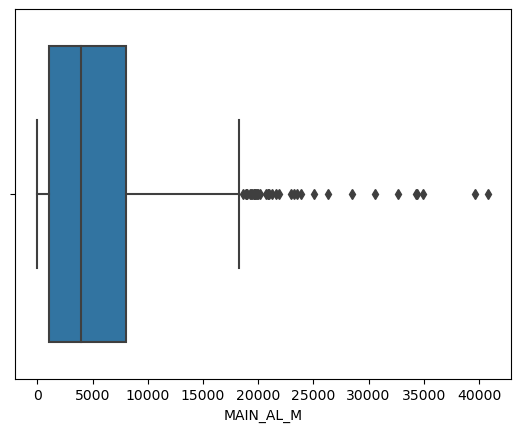

Description of MAIN_AL_F
----------------------------------------------------------------------------
count      640.000000
mean      8925.995312
std      12864.287584
min          0.000000
25%       1408.750000
50%       3933.500000
75%      10617.500000
max      87945.000000
Name: MAIN_AL_F, dtype: float64 Distribution of MAIN_AL_F
----------------------------------------------------------------------------
BoxPlot of MAIN_AL_F
----------------------------------------------------------------------------


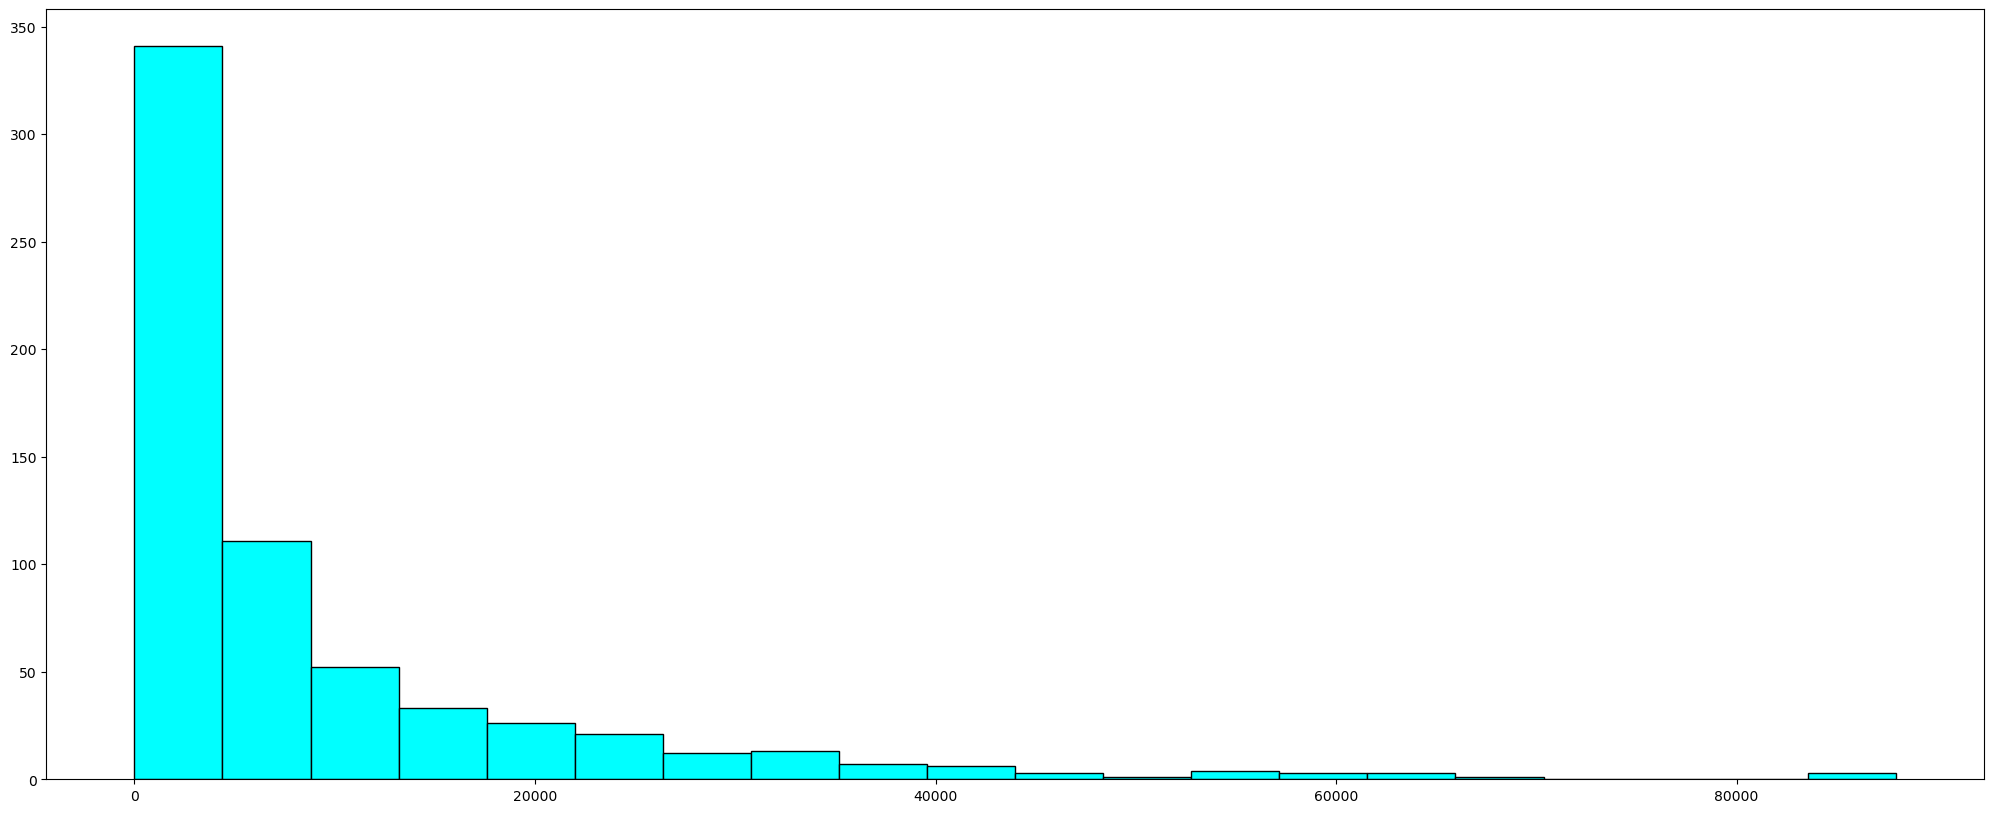

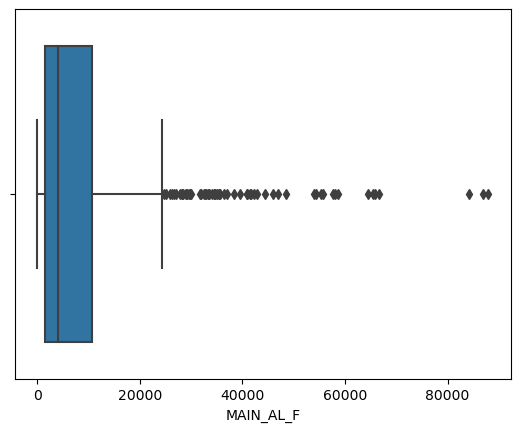

Description of MAIN_HH_M
----------------------------------------------------------------------------
count      640.000000
mean       883.893750
std       1278.642345
min          0.000000
25%        187.500000
50%        498.500000
75%       1099.250000
max      16429.000000
Name: MAIN_HH_M, dtype: float64 Distribution of MAIN_HH_M
----------------------------------------------------------------------------
BoxPlot of MAIN_HH_M
----------------------------------------------------------------------------


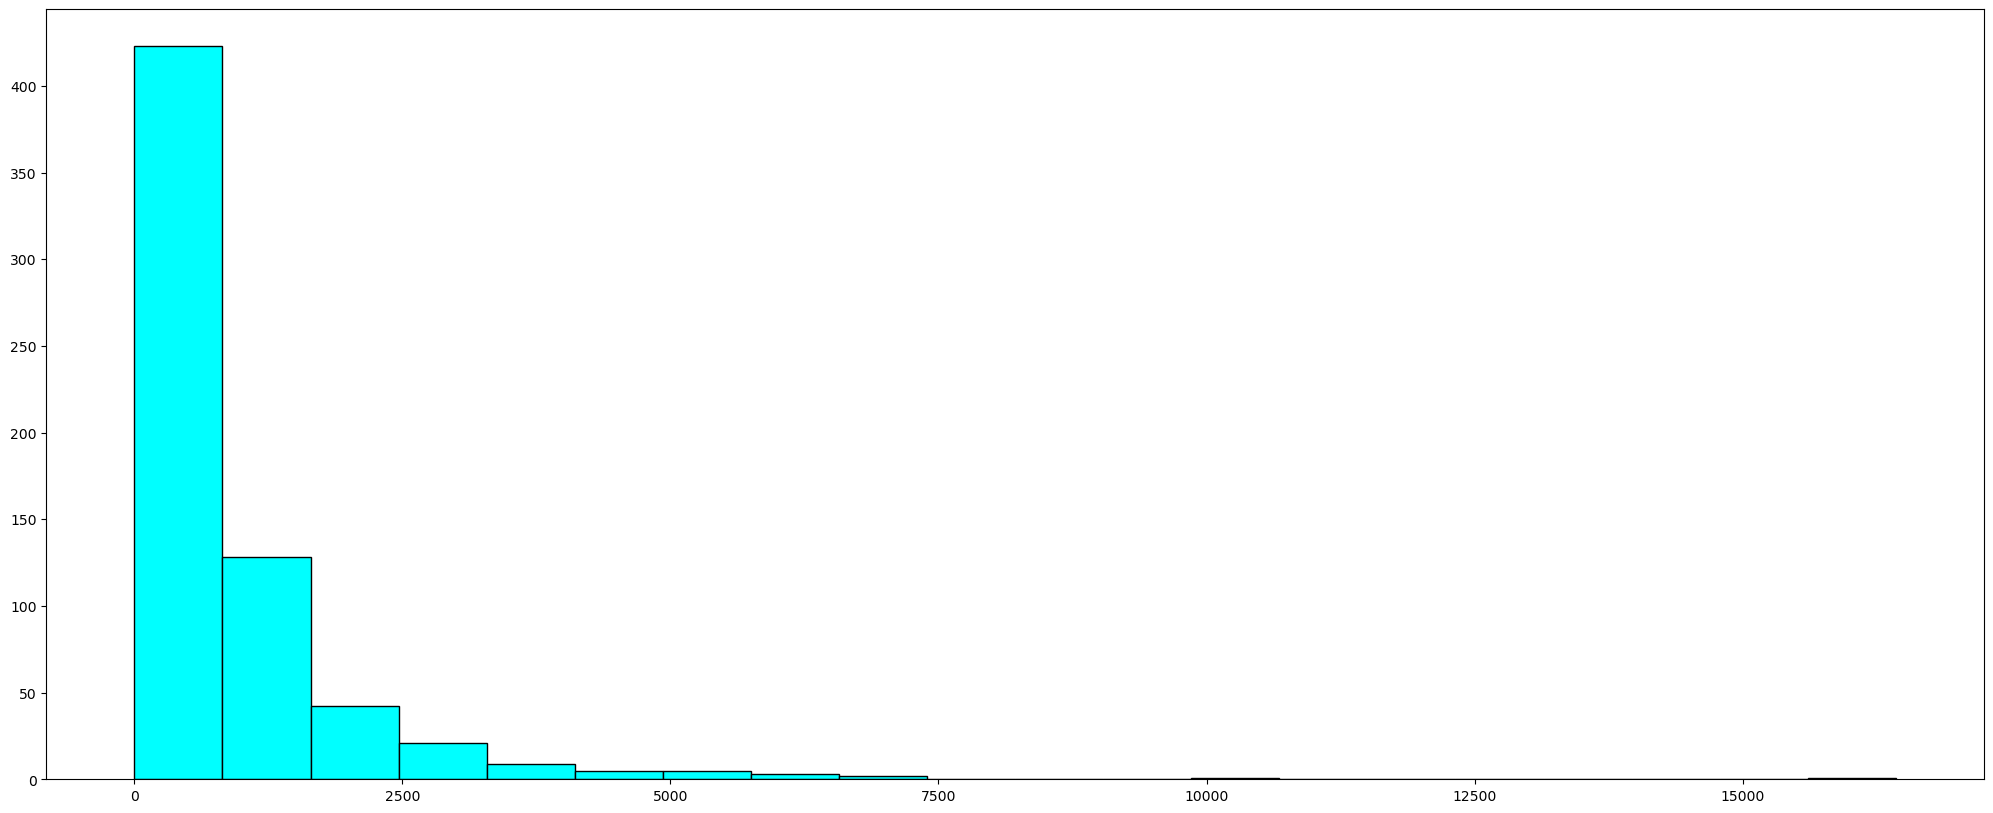

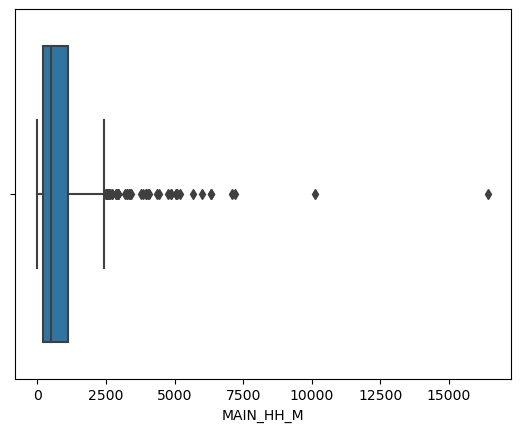

Description of MAIN_HH_F
----------------------------------------------------------------------------
count      640.000000
mean      1380.773438
std       3179.414449
min          0.000000
25%        248.750000
50%        540.500000
75%       1435.750000
max      45979.000000
Name: MAIN_HH_F, dtype: float64 Distribution of MAIN_HH_F
----------------------------------------------------------------------------
BoxPlot of MAIN_HH_F
----------------------------------------------------------------------------


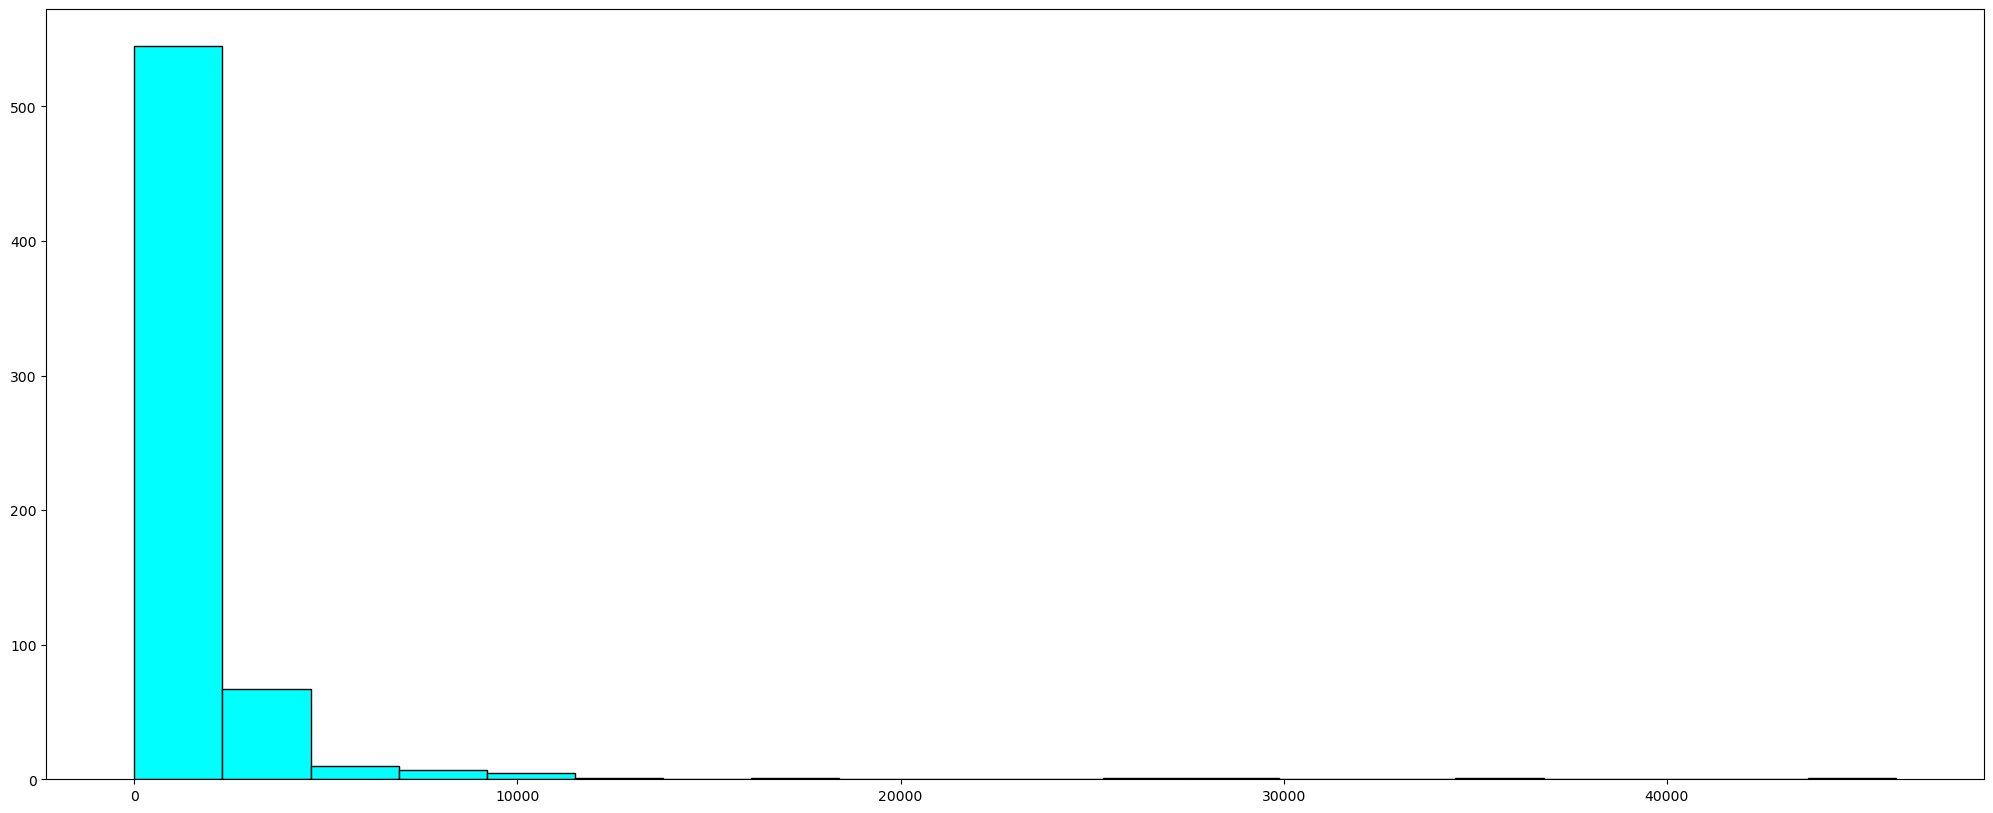

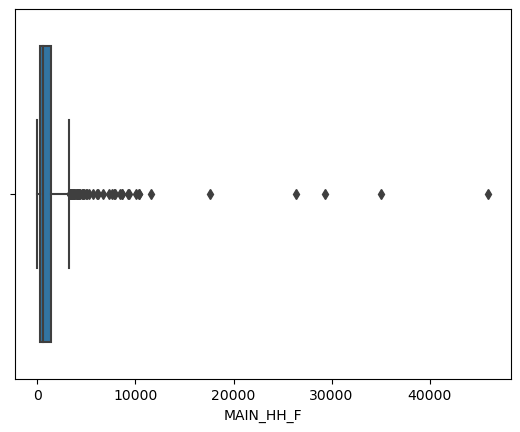

Description of MAIN_OT_M
----------------------------------------------------------------------------
count       640.000000
mean      18047.101562
std       26068.480886
min          36.000000
25%        3997.500000
50%        9598.000000
75%       21249.500000
max      240855.000000
Name: MAIN_OT_M, dtype: float64 Distribution of MAIN_OT_M
----------------------------------------------------------------------------
BoxPlot of MAIN_OT_M
----------------------------------------------------------------------------


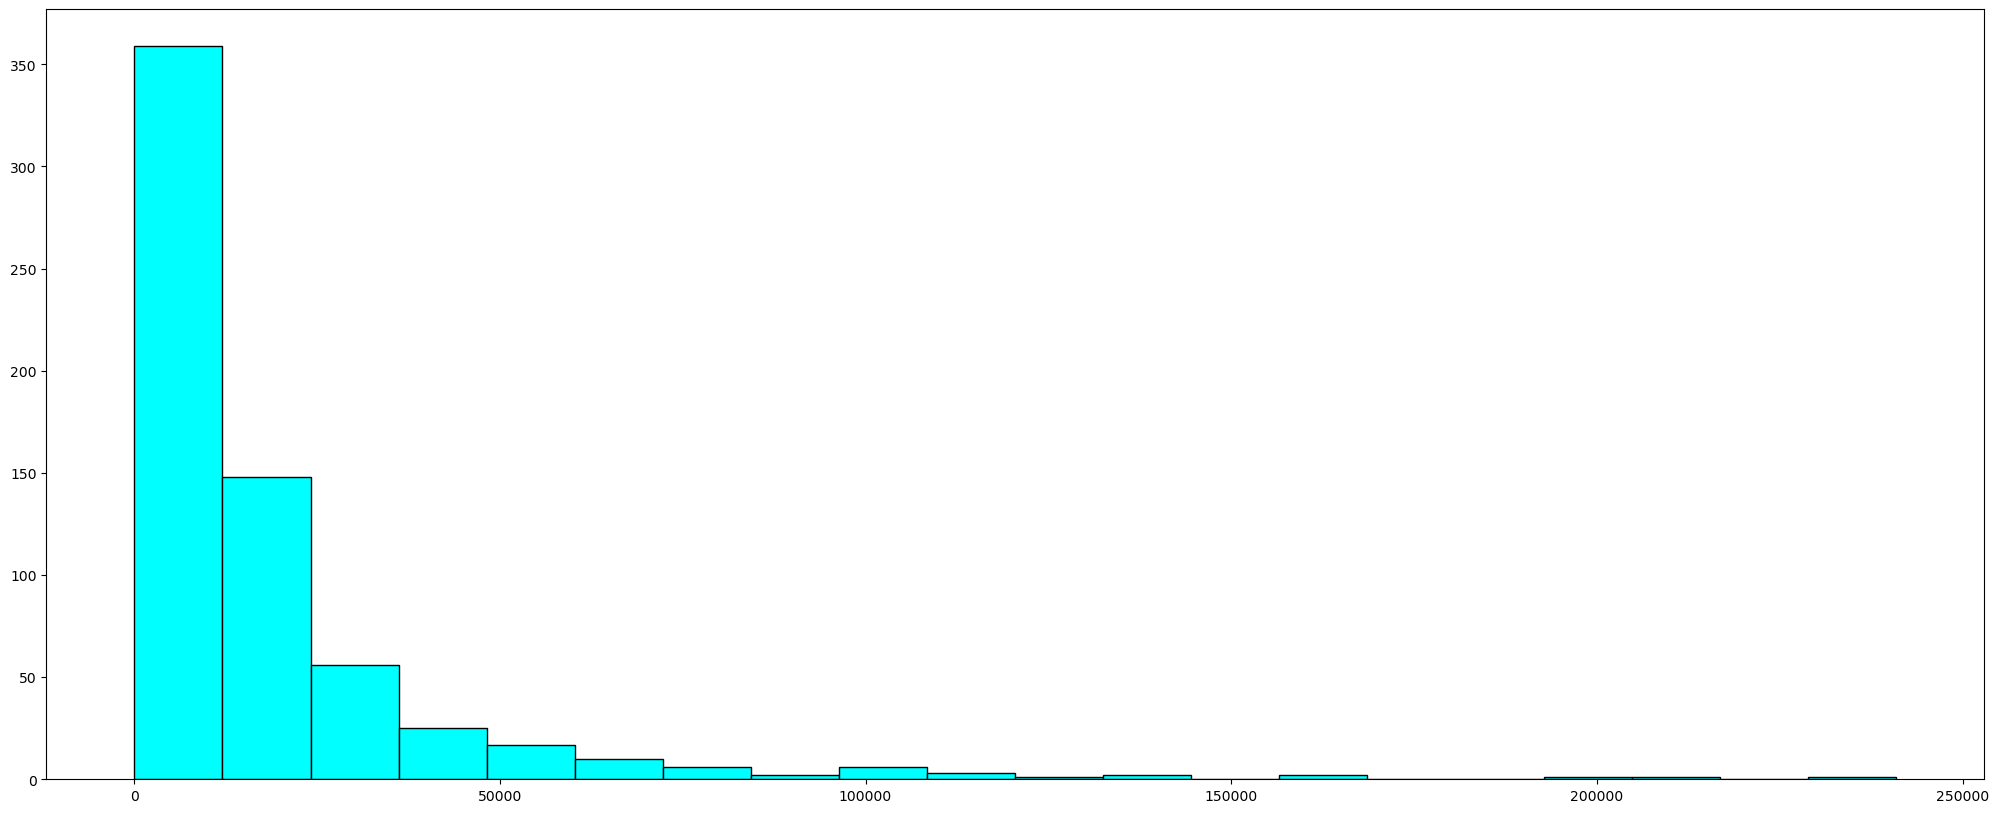

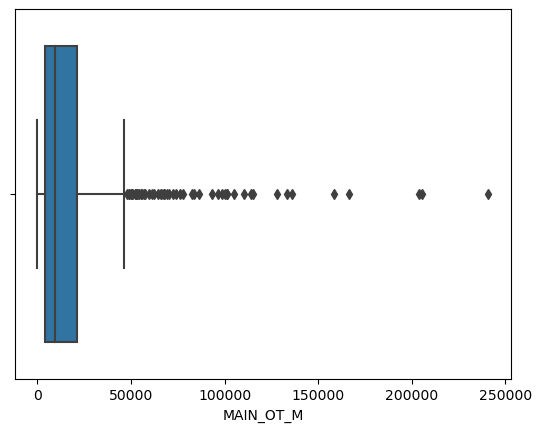

Description of MAIN_OT_F
----------------------------------------------------------------------------
count       640.000000
mean      12406.035938
std       18972.202369
min         153.000000
25%        3142.500000
50%        6380.500000
75%       14368.250000
max      209355.000000
Name: MAIN_OT_F, dtype: float64 Distribution of MAIN_OT_F
----------------------------------------------------------------------------
BoxPlot of MAIN_OT_F
----------------------------------------------------------------------------


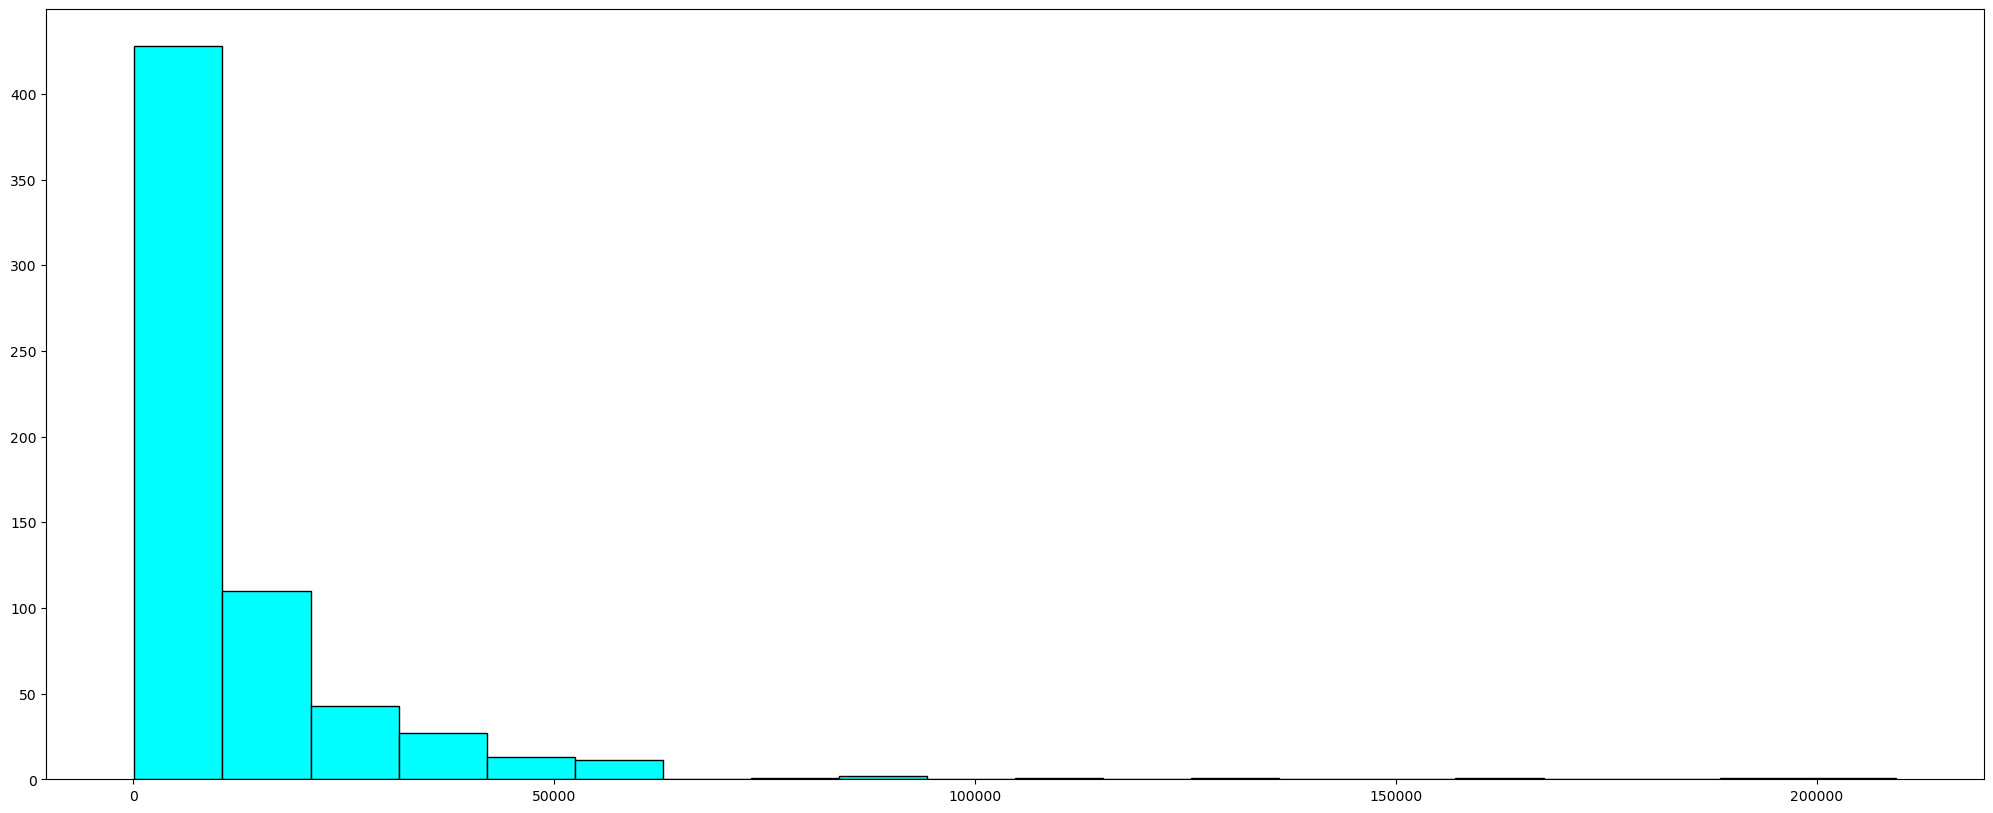

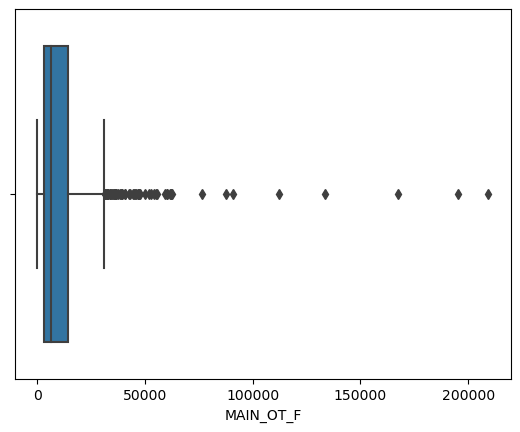

Description of MARGWORK_M
----------------------------------------------------------------------------
count      640.000000
mean      7787.960938
std       7410.791691
min         35.000000
25%       2937.500000
50%       5627.000000
75%       9800.250000
max      47553.000000
Name: MARGWORK_M, dtype: float64 Distribution of MARGWORK_M
----------------------------------------------------------------------------
BoxPlot of MARGWORK_M
----------------------------------------------------------------------------


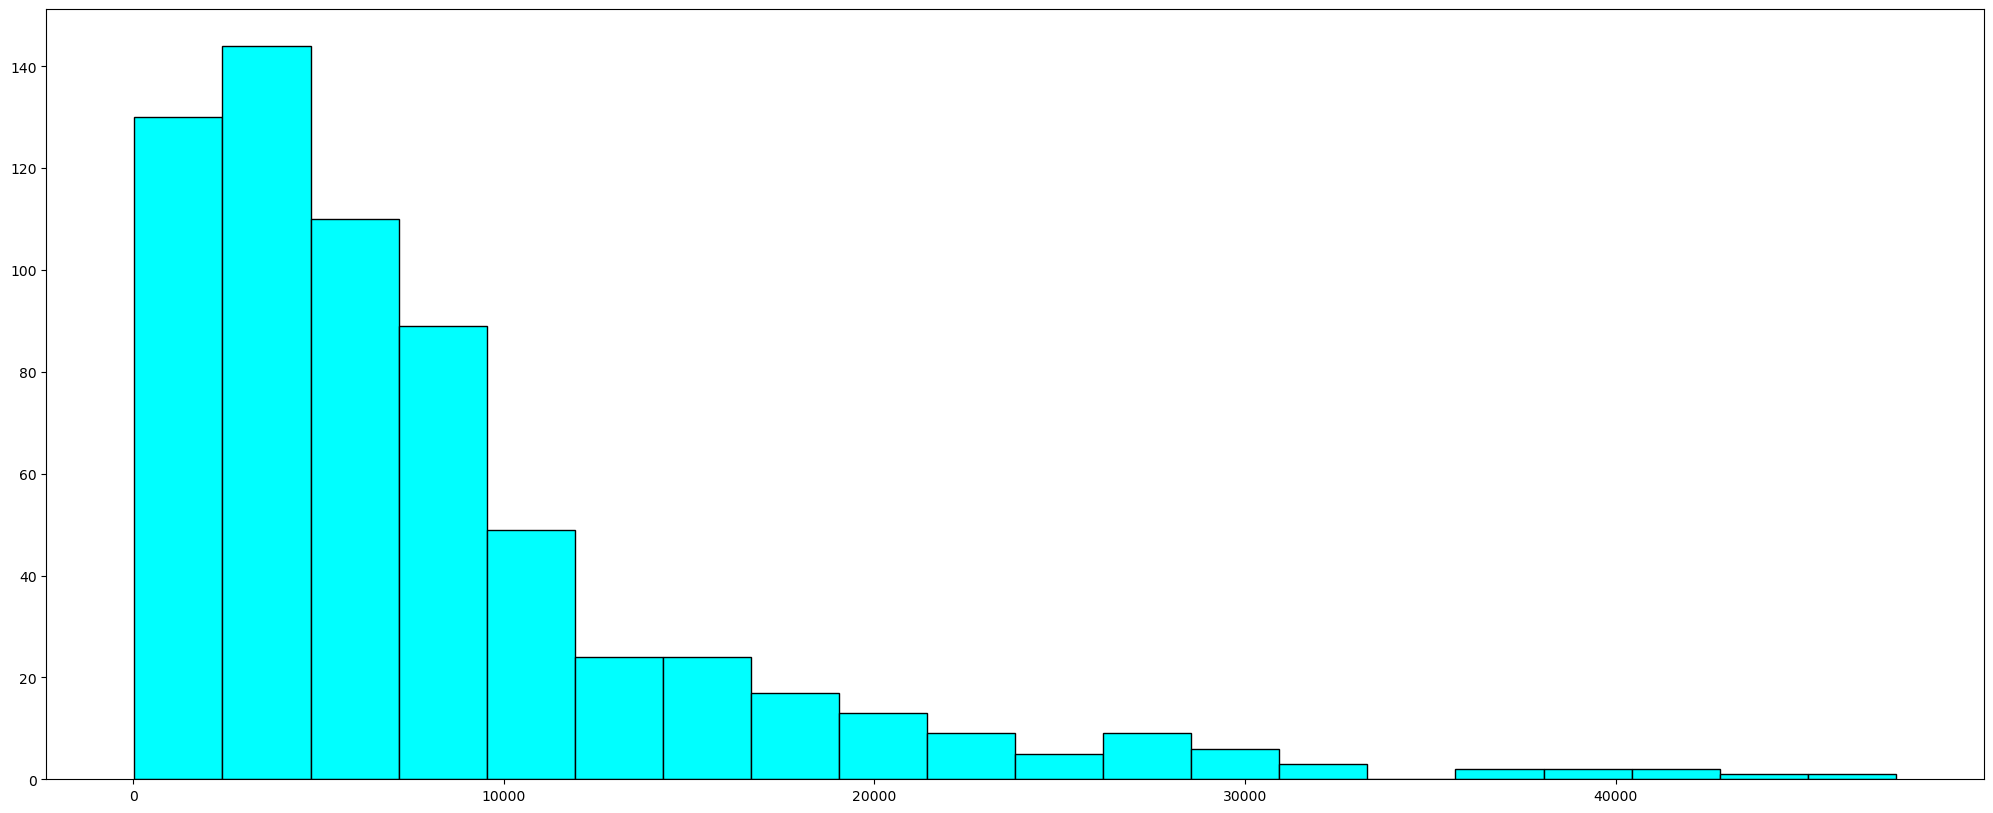

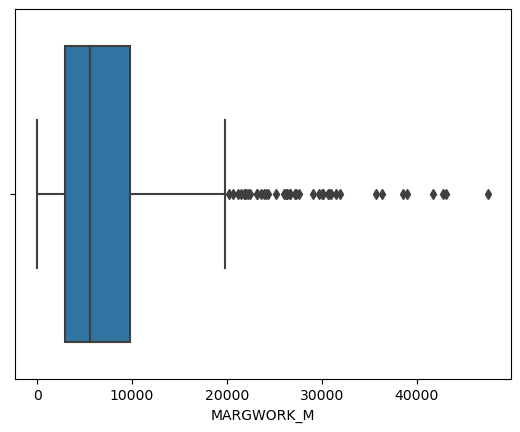

Description of MARGWORK_F
----------------------------------------------------------------------------
count      640.000000
mean     13096.914062
std      10996.474528
min        117.000000
25%       5424.500000
50%      10175.000000
75%      18879.250000
max      66915.000000
Name: MARGWORK_F, dtype: float64 Distribution of MARGWORK_F
----------------------------------------------------------------------------
BoxPlot of MARGWORK_F
----------------------------------------------------------------------------


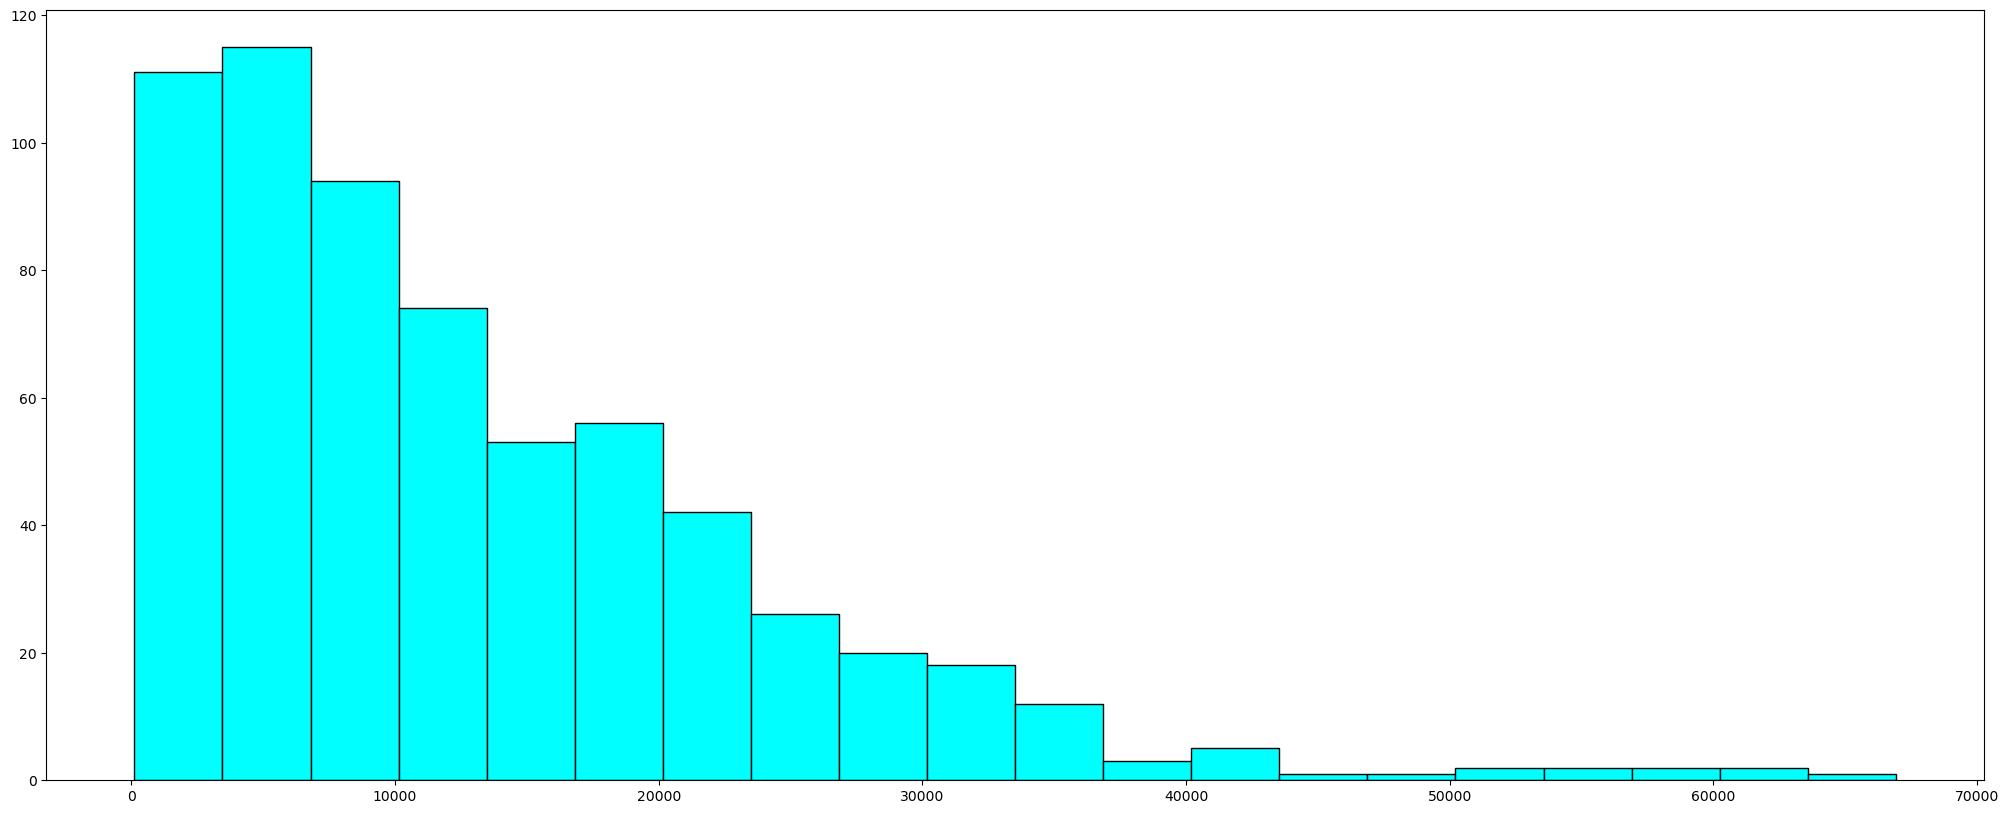

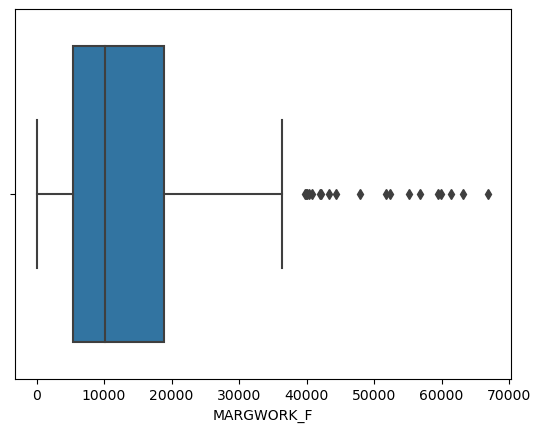

Description of MARG_CL_M
----------------------------------------------------------------------------
count      640.000000
mean      1040.737500
std       1311.546847
min          0.000000
25%        311.750000
50%        606.500000
75%       1281.000000
max      13201.000000
Name: MARG_CL_M, dtype: float64 Distribution of MARG_CL_M
----------------------------------------------------------------------------
BoxPlot of MARG_CL_M
----------------------------------------------------------------------------


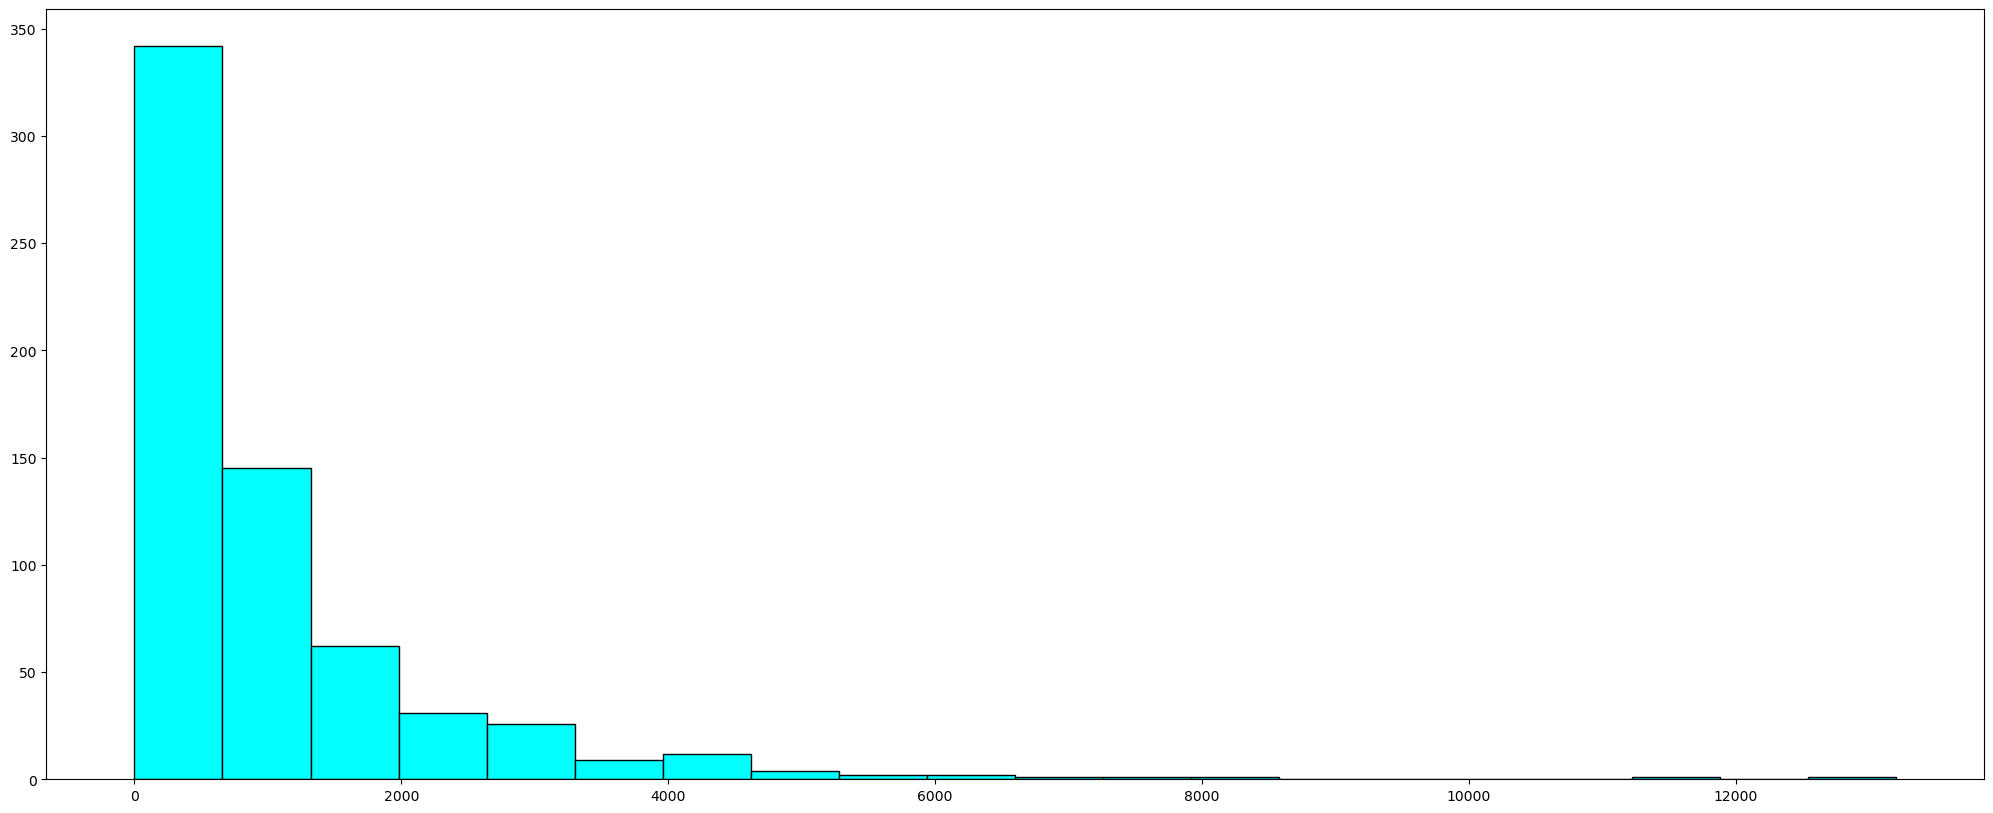

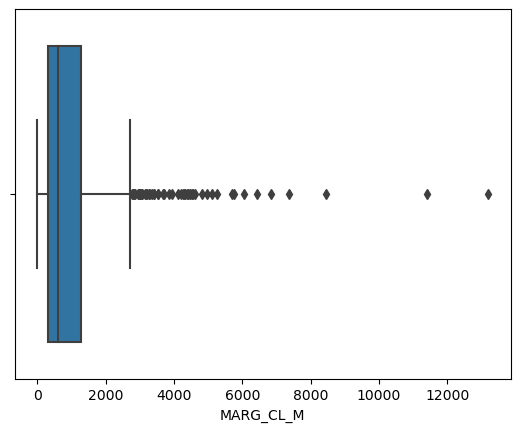

Description of MARG_CL_F
----------------------------------------------------------------------------
count      640.000000
mean      2307.682813
std       3564.626095
min          0.000000
25%        630.250000
50%       1226.000000
75%       2659.250000
max      44324.000000
Name: MARG_CL_F, dtype: float64 Distribution of MARG_CL_F
----------------------------------------------------------------------------
BoxPlot of MARG_CL_F
----------------------------------------------------------------------------


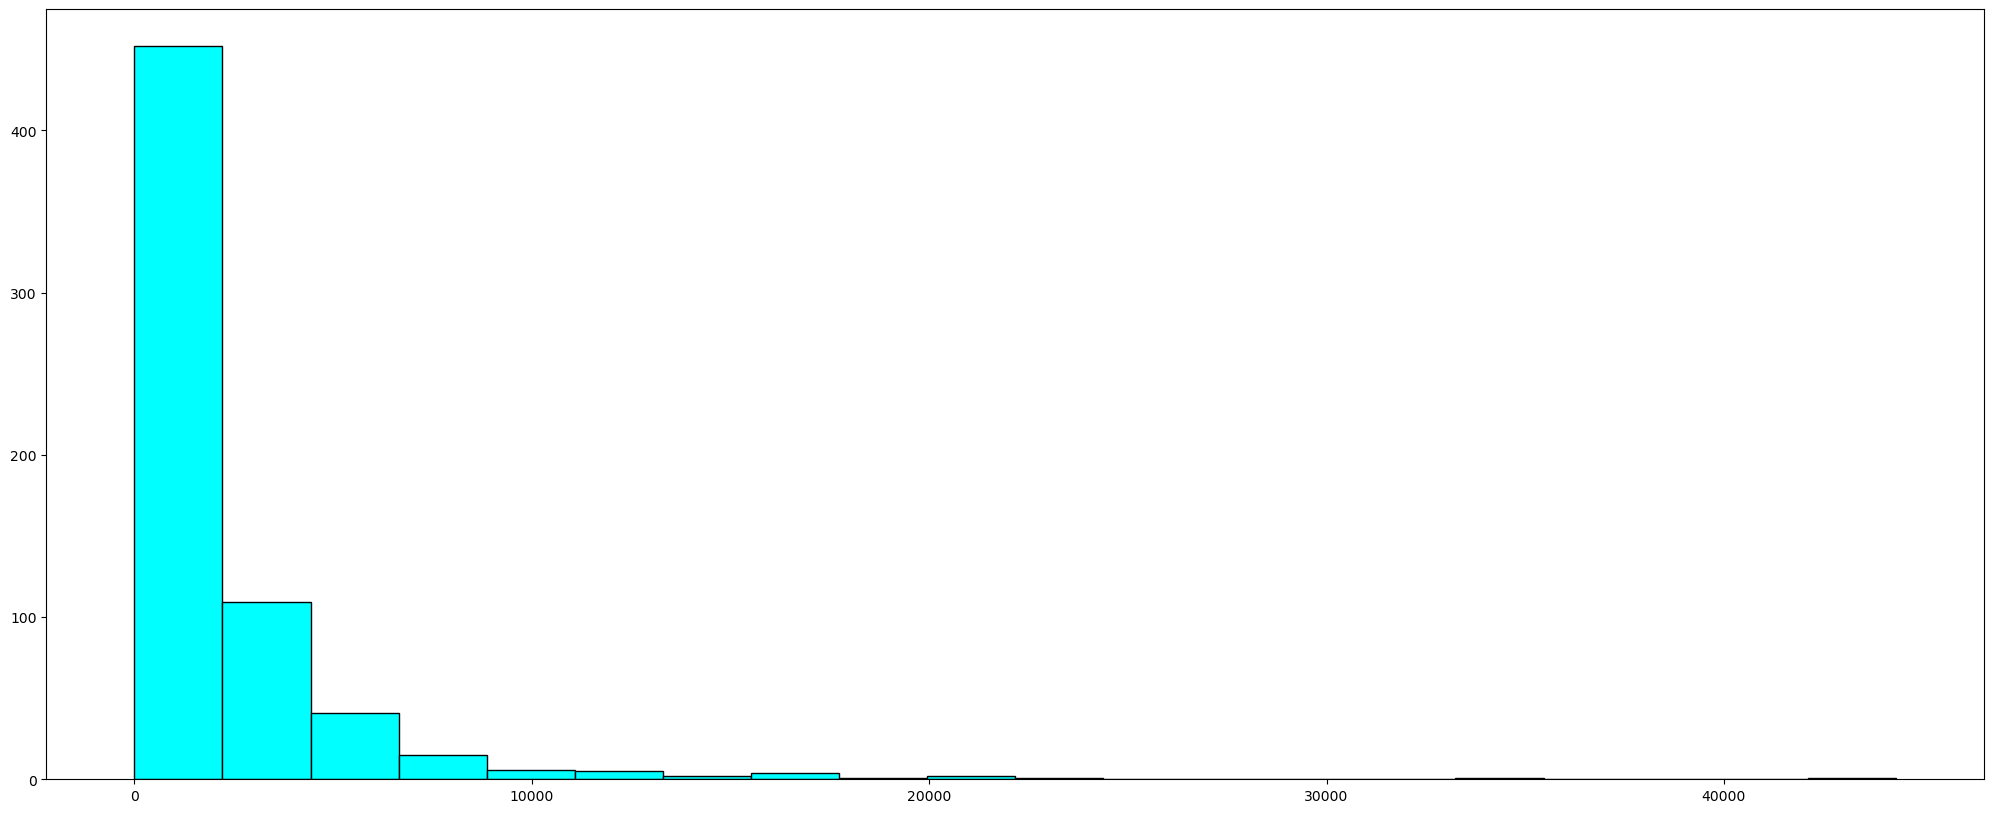

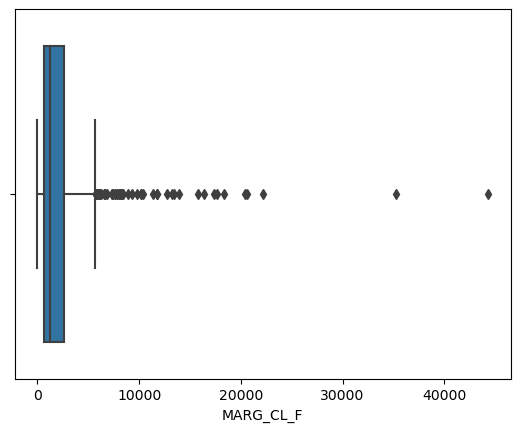

Description of MARG_AL_M
----------------------------------------------------------------------------
count      640.000000
mean      3304.326562
std       3781.555707
min          0.000000
25%        873.500000
50%       2062.000000
75%       4300.750000
max      23719.000000
Name: MARG_AL_M, dtype: float64 Distribution of MARG_AL_M
----------------------------------------------------------------------------
BoxPlot of MARG_AL_M
----------------------------------------------------------------------------


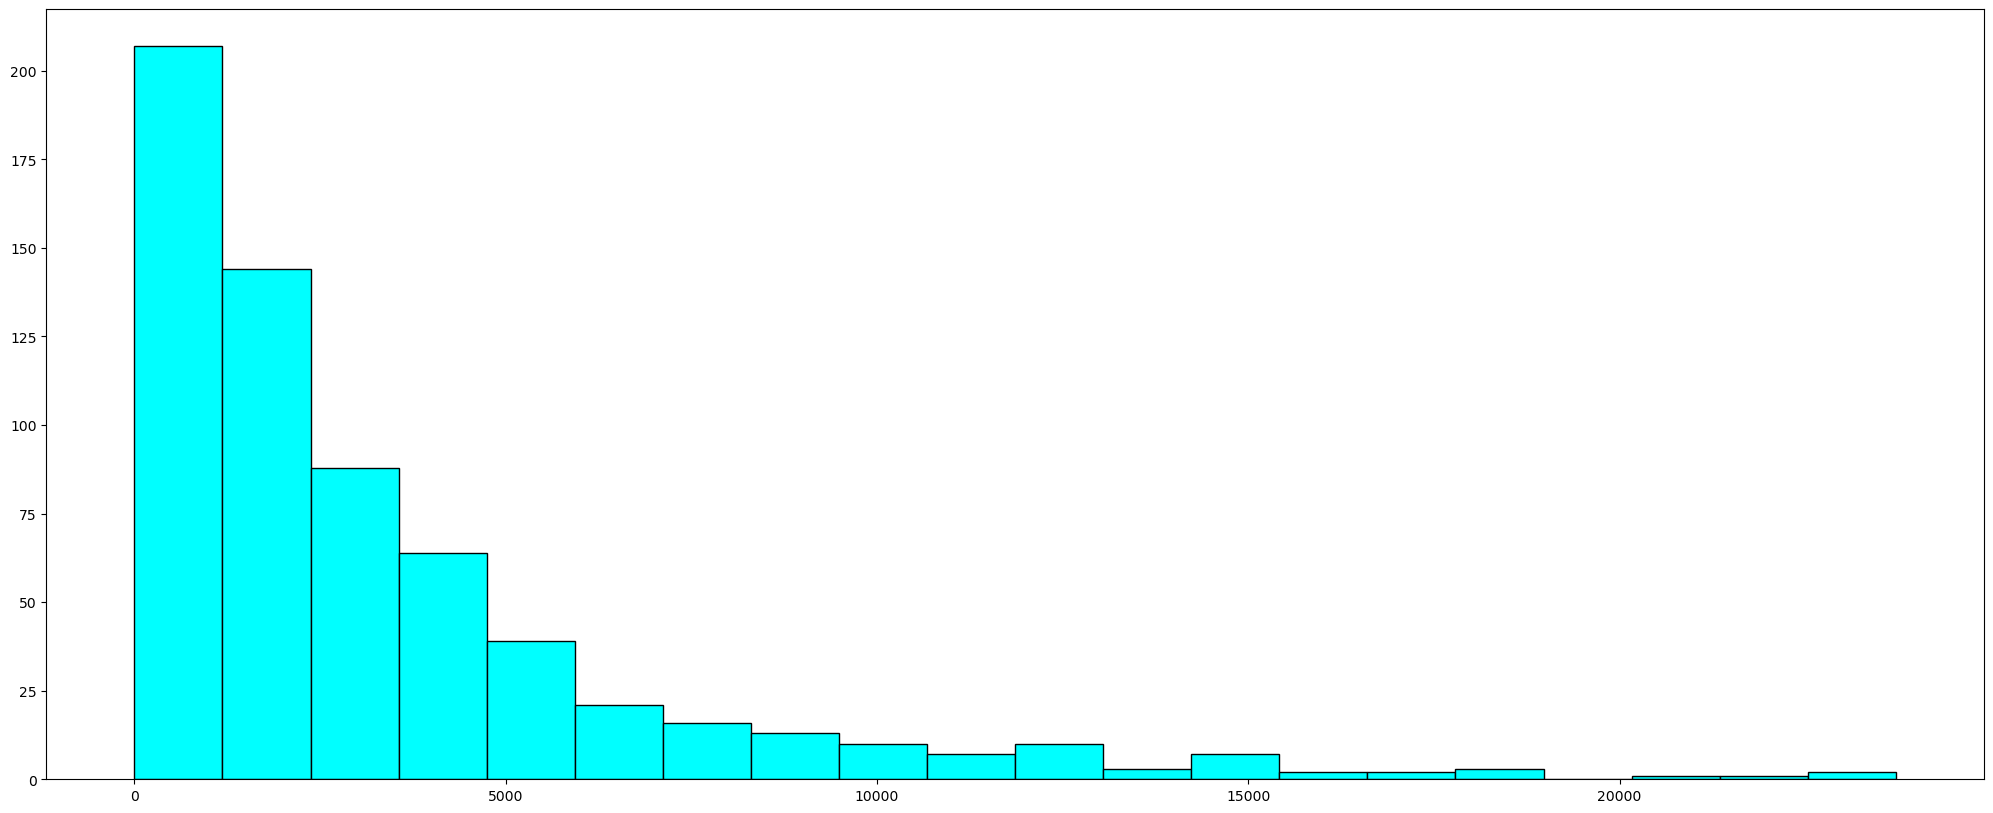

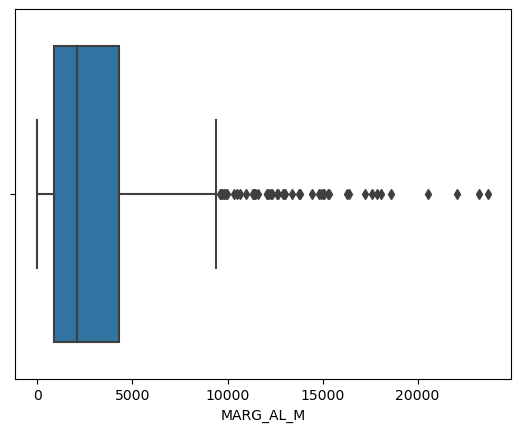

Description of MARG_AL_F
----------------------------------------------------------------------------
count      640.000000
mean      6463.281250
std       6773.876298
min          0.000000
25%       1402.500000
50%       4020.500000
75%       9089.250000
max      45301.000000
Name: MARG_AL_F, dtype: float64 Distribution of MARG_AL_F
----------------------------------------------------------------------------
BoxPlot of MARG_AL_F
----------------------------------------------------------------------------


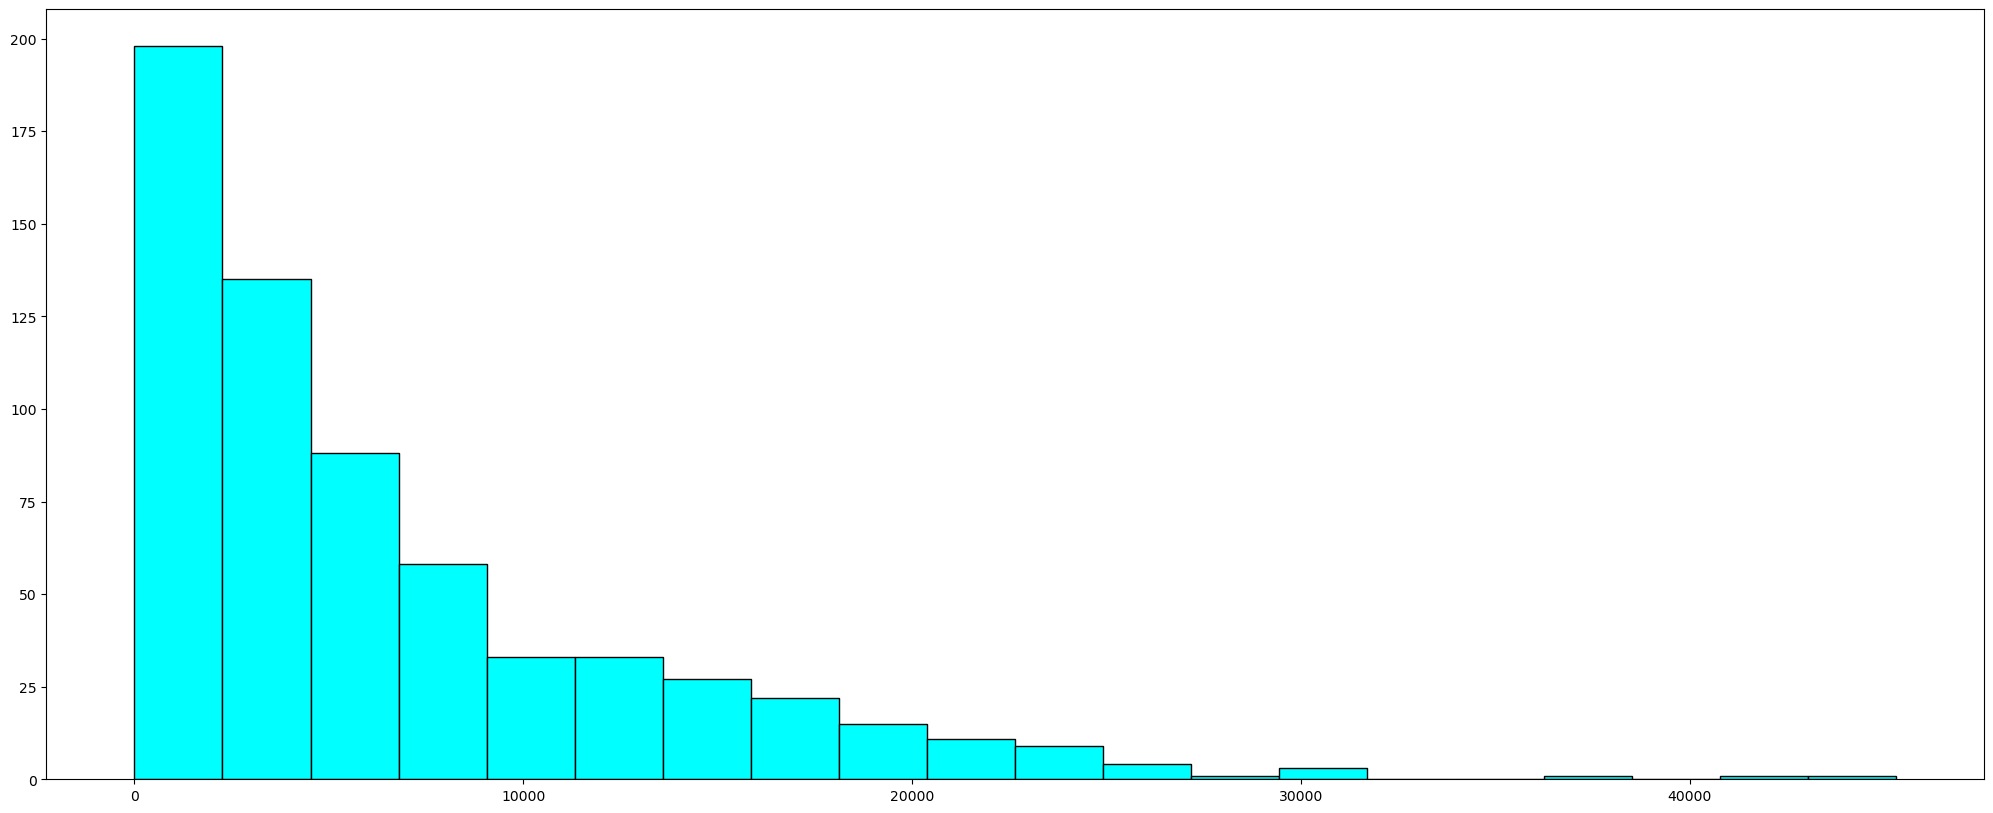

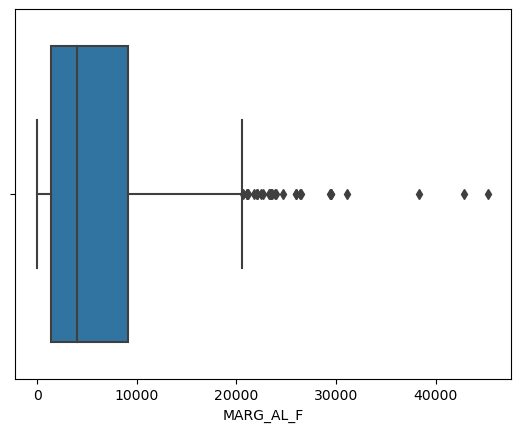

Description of MARG_HH_M
----------------------------------------------------------------------------
count     640.000000
mean      316.742188
std       462.661891
min         0.000000
25%        71.750000
50%       166.000000
75%       356.500000
max      4298.000000
Name: MARG_HH_M, dtype: float64 Distribution of MARG_HH_M
----------------------------------------------------------------------------
BoxPlot of MARG_HH_M
----------------------------------------------------------------------------


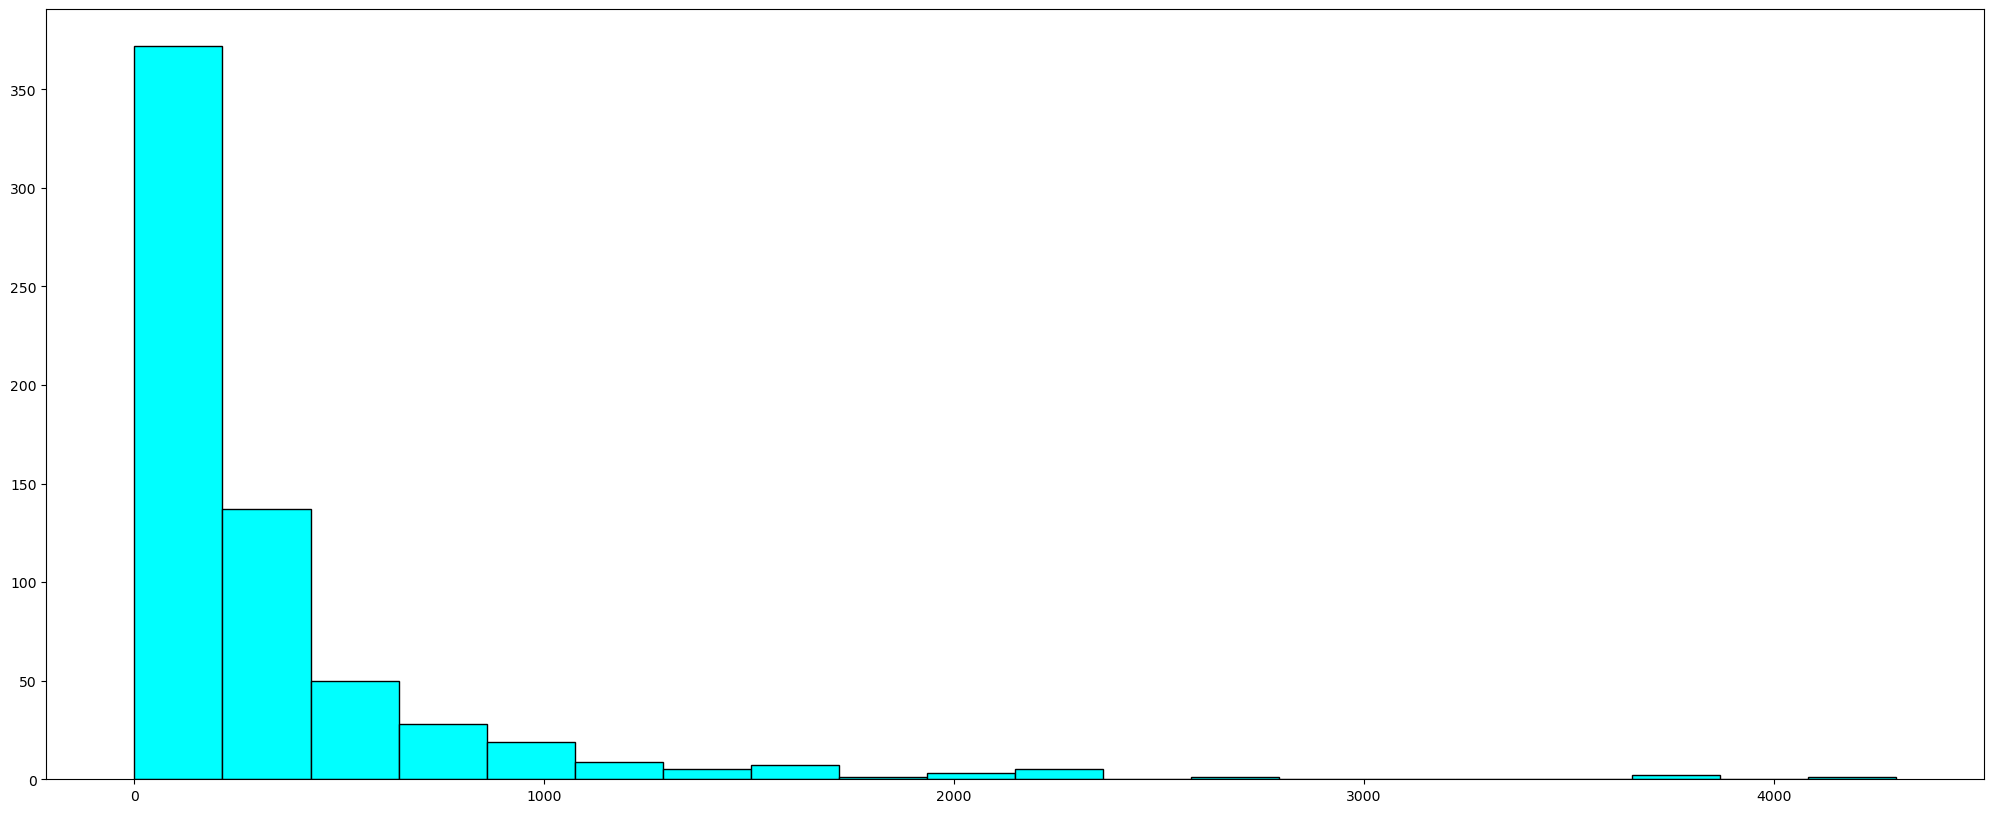

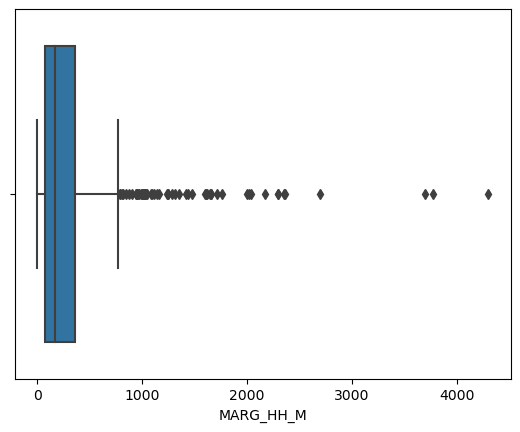

Description of MARG_HH_F
----------------------------------------------------------------------------
count      640.000000
mean       786.626562
std       1198.718213
min          0.000000
25%        171.750000
50%        429.000000
75%        962.500000
max      15448.000000
Name: MARG_HH_F, dtype: float64 Distribution of MARG_HH_F
----------------------------------------------------------------------------
BoxPlot of MARG_HH_F
----------------------------------------------------------------------------


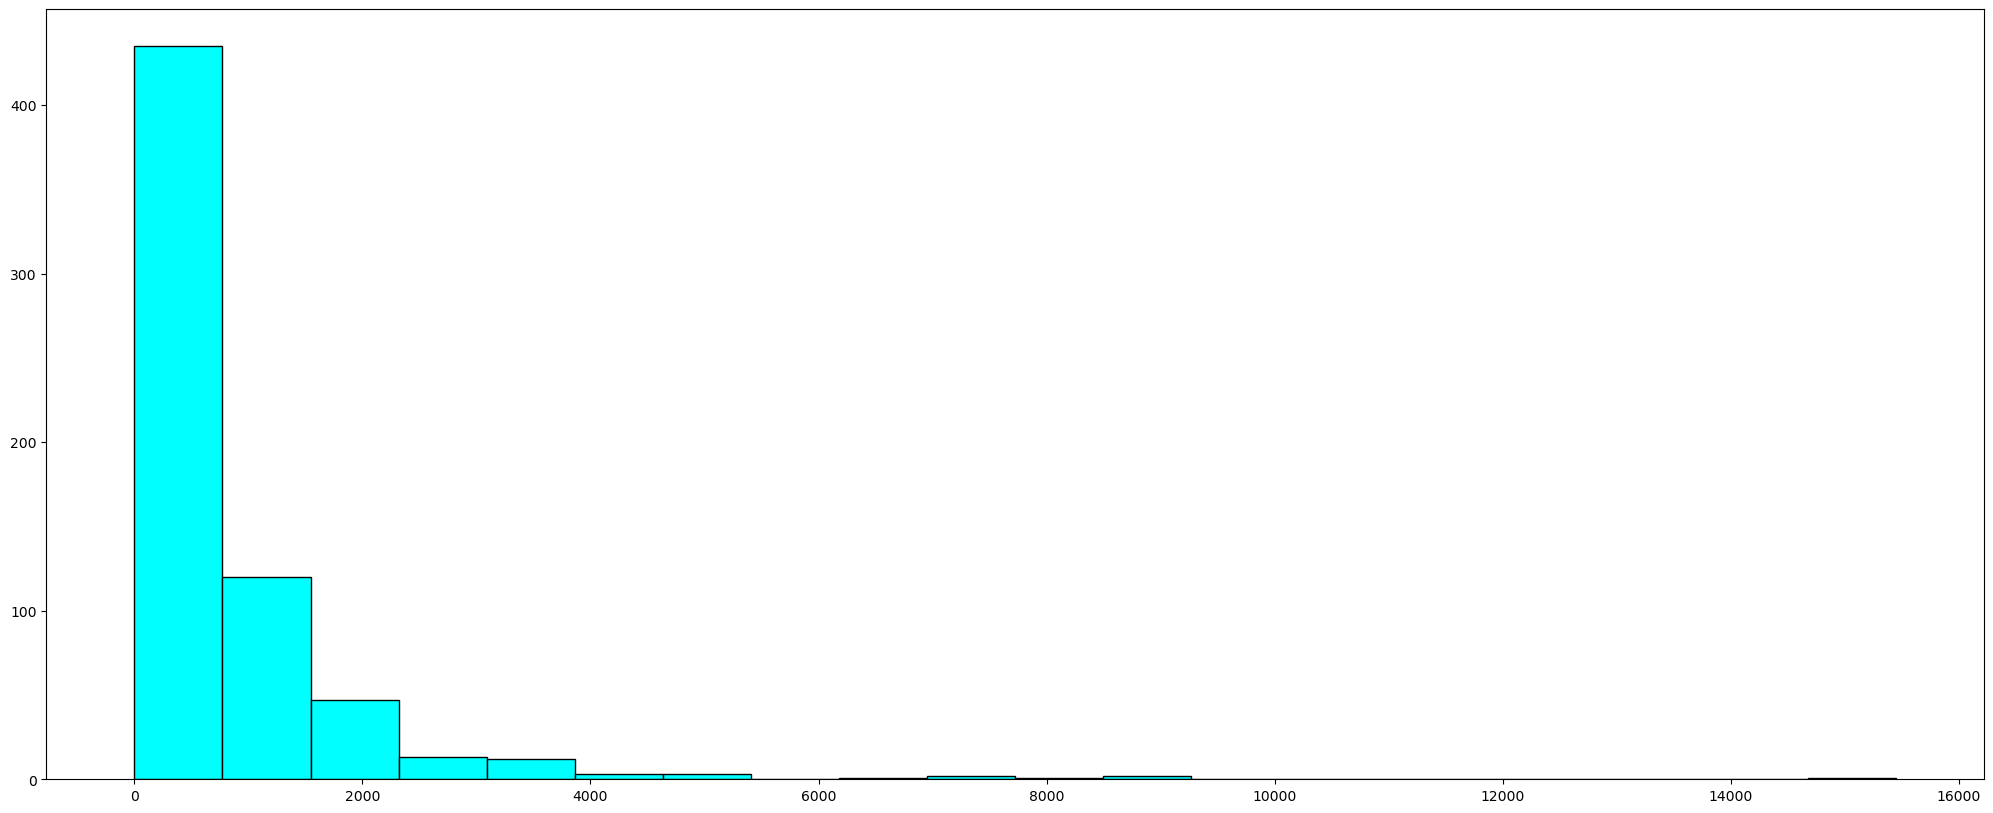

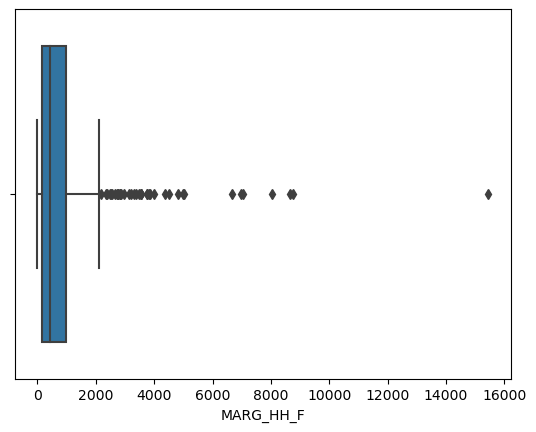

Description of MARG_OT_M
----------------------------------------------------------------------------
count      640.000000
mean      3126.154687
std       3609.391821
min          7.000000
25%        935.500000
50%       2036.000000
75%       3985.250000
max      24728.000000
Name: MARG_OT_M, dtype: float64 Distribution of MARG_OT_M
----------------------------------------------------------------------------
BoxPlot of MARG_OT_M
----------------------------------------------------------------------------


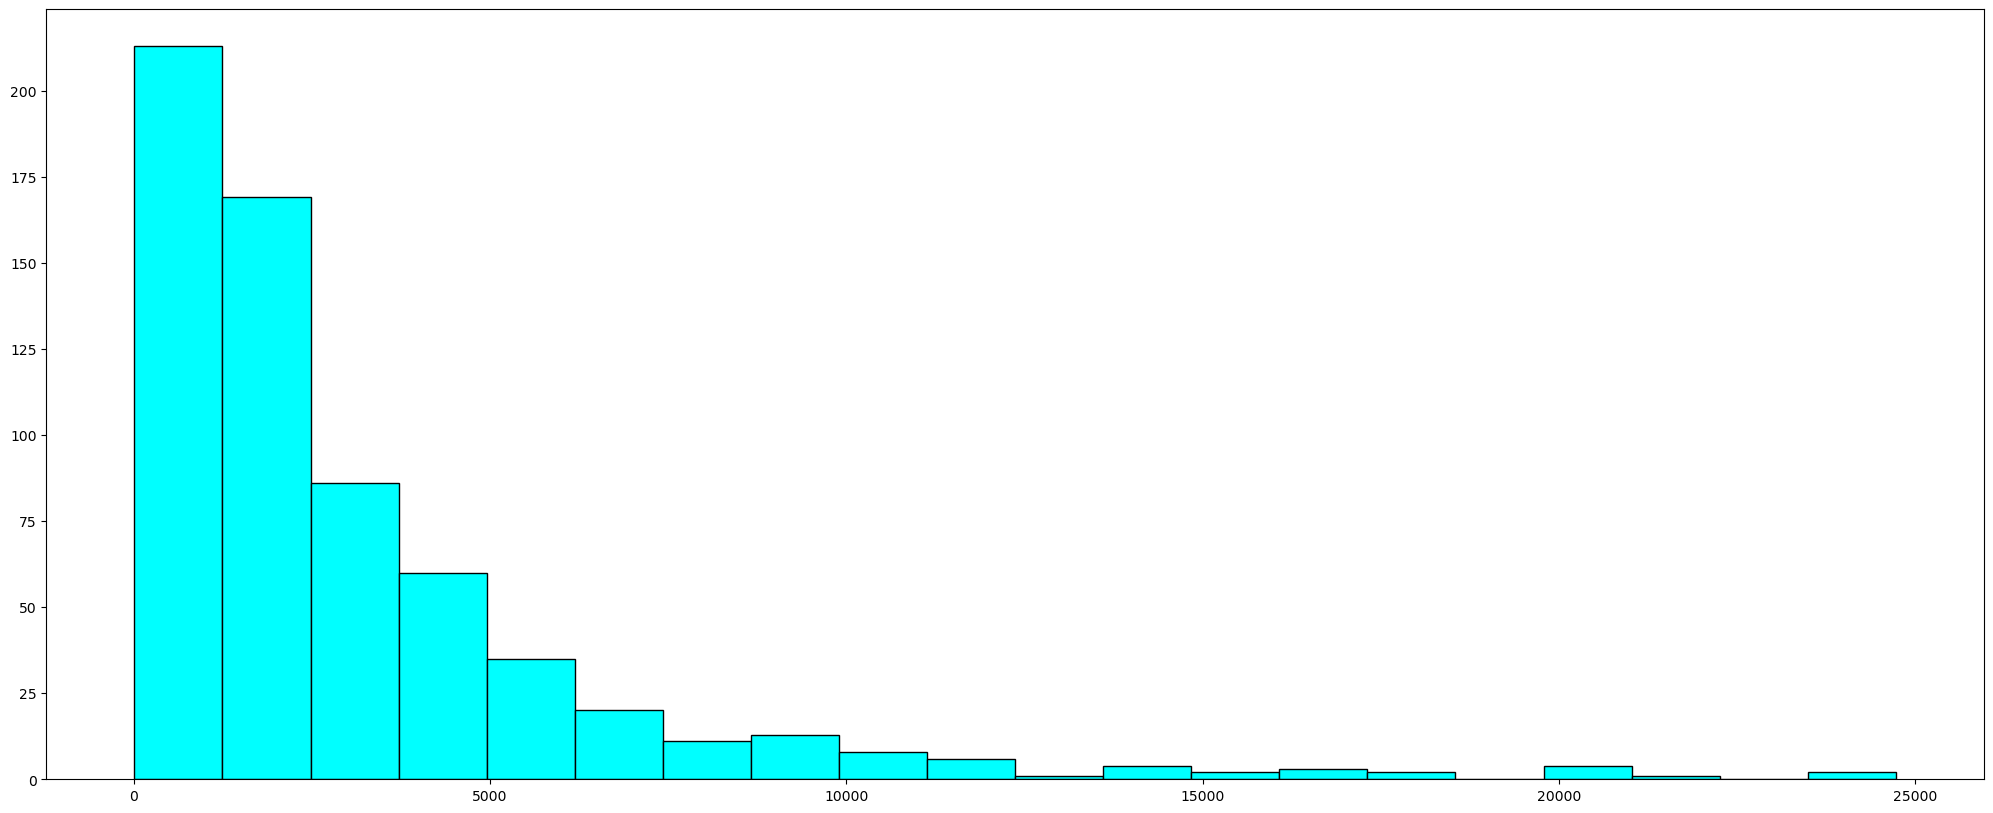

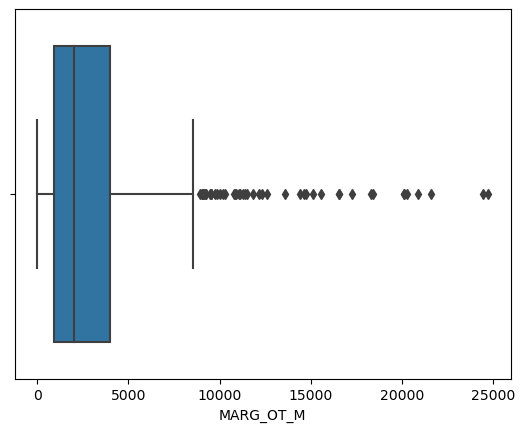

Description of MARG_OT_F
----------------------------------------------------------------------------
count      640.000000
mean      3539.323438
std       4115.191314
min         19.000000
25%       1071.750000
50%       2349.500000
75%       4400.500000
max      36377.000000
Name: MARG_OT_F, dtype: float64 Distribution of MARG_OT_F
----------------------------------------------------------------------------
BoxPlot of MARG_OT_F
----------------------------------------------------------------------------


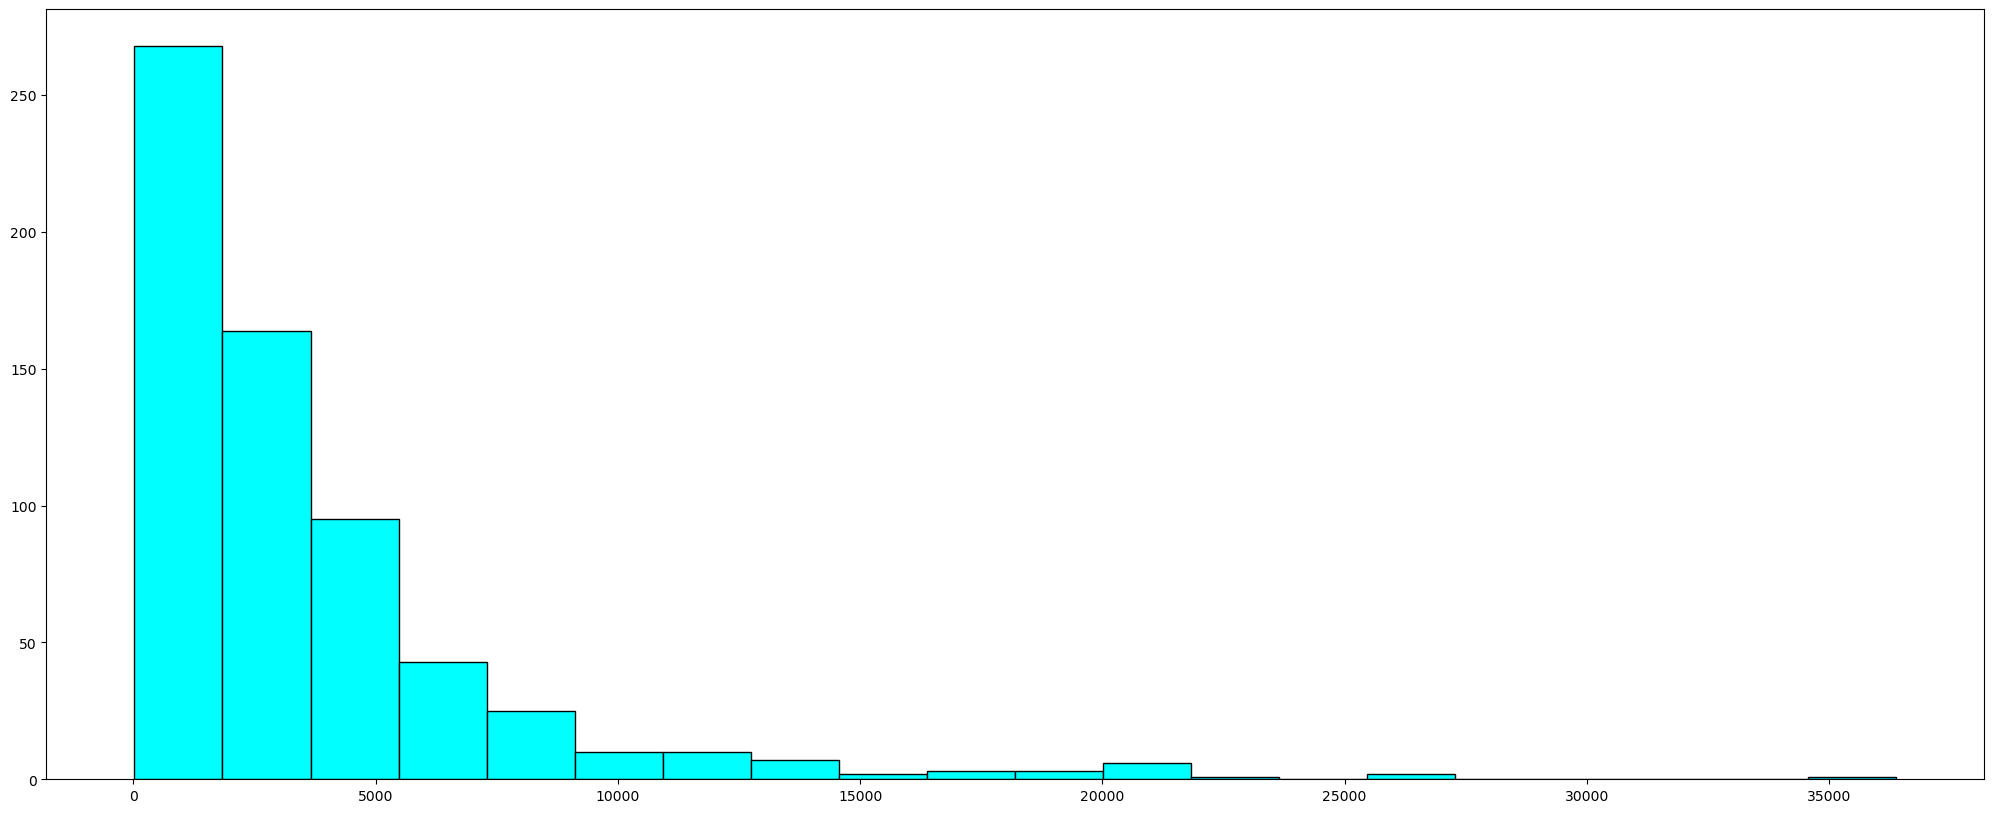

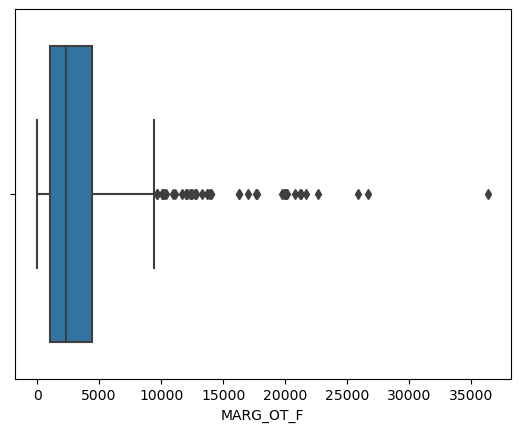

Description of MARGWORK_3_6_M
----------------------------------------------------------------------------
count       640.000000
mean      41948.168750
std       39045.316918
min         291.000000
25%       16208.250000
50%       30315.000000
75%       57218.750000
max      300937.000000
Name: MARGWORK_3_6_M, dtype: float64 Distribution of MARGWORK_3_6_M
----------------------------------------------------------------------------
BoxPlot of MARGWORK_3_6_M
----------------------------------------------------------------------------


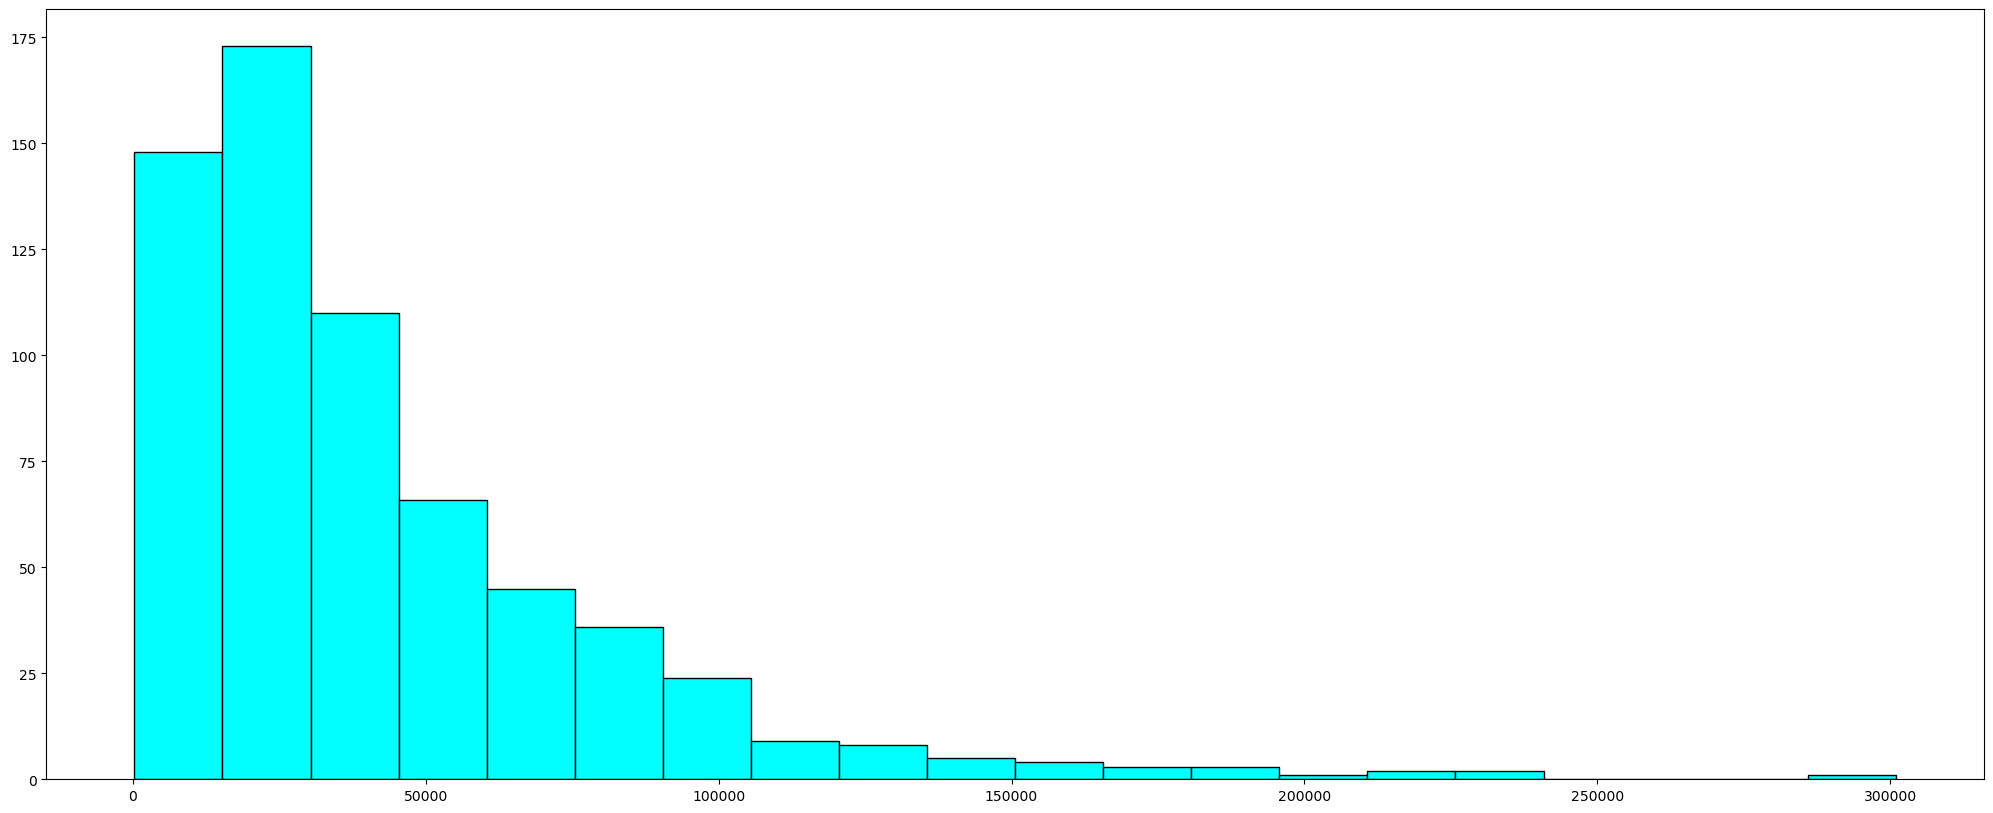

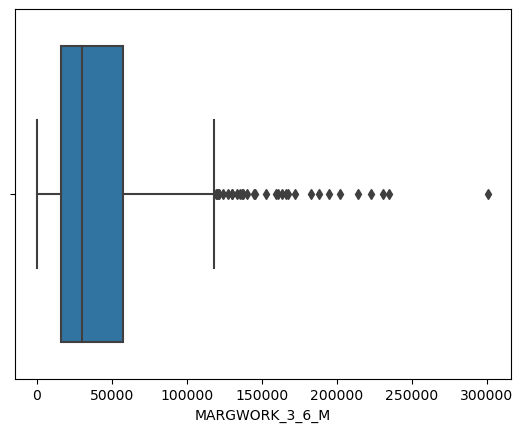

Description of MARGWORK_3_6_F
----------------------------------------------------------------------------
count       640.000000
mean      81076.323438
std       82970.406216
min         341.000000
25%       26619.500000
50%       56793.000000
75%      107924.000000
max      676450.000000
Name: MARGWORK_3_6_F, dtype: float64 Distribution of MARGWORK_3_6_F
----------------------------------------------------------------------------
BoxPlot of MARGWORK_3_6_F
----------------------------------------------------------------------------


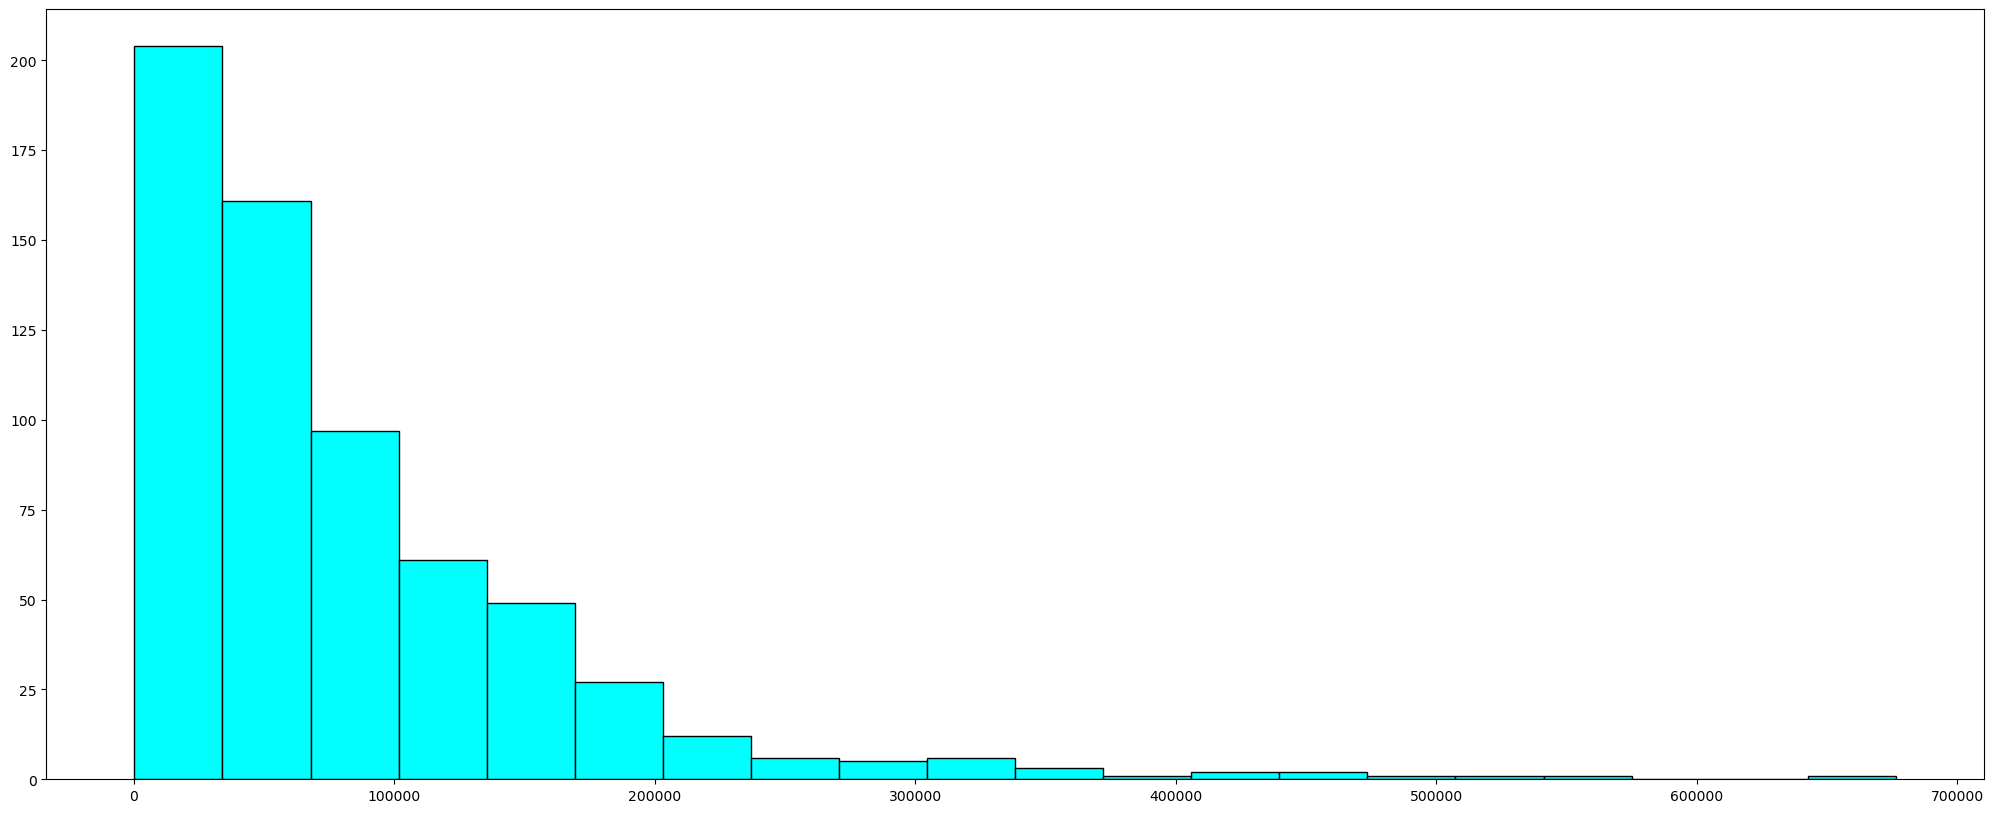

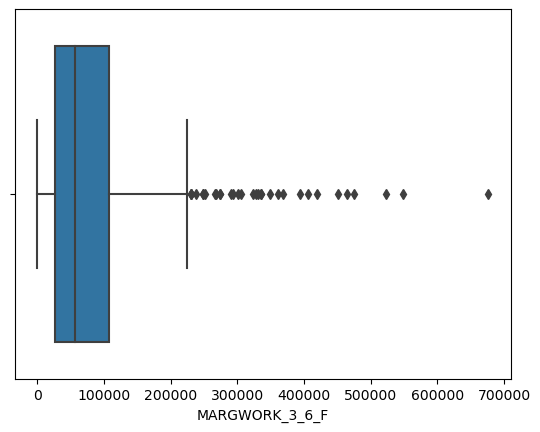

Description of MARG_CL_3_6_M
----------------------------------------------------------------------------
count      640.000000
mean      6394.987500
std       6019.806644
min         27.000000
25%       2372.000000
50%       4630.000000
75%       8167.000000
max      39106.000000
Name: MARG_CL_3_6_M, dtype: float64 Distribution of MARG_CL_3_6_M
----------------------------------------------------------------------------
BoxPlot of MARG_CL_3_6_M
----------------------------------------------------------------------------


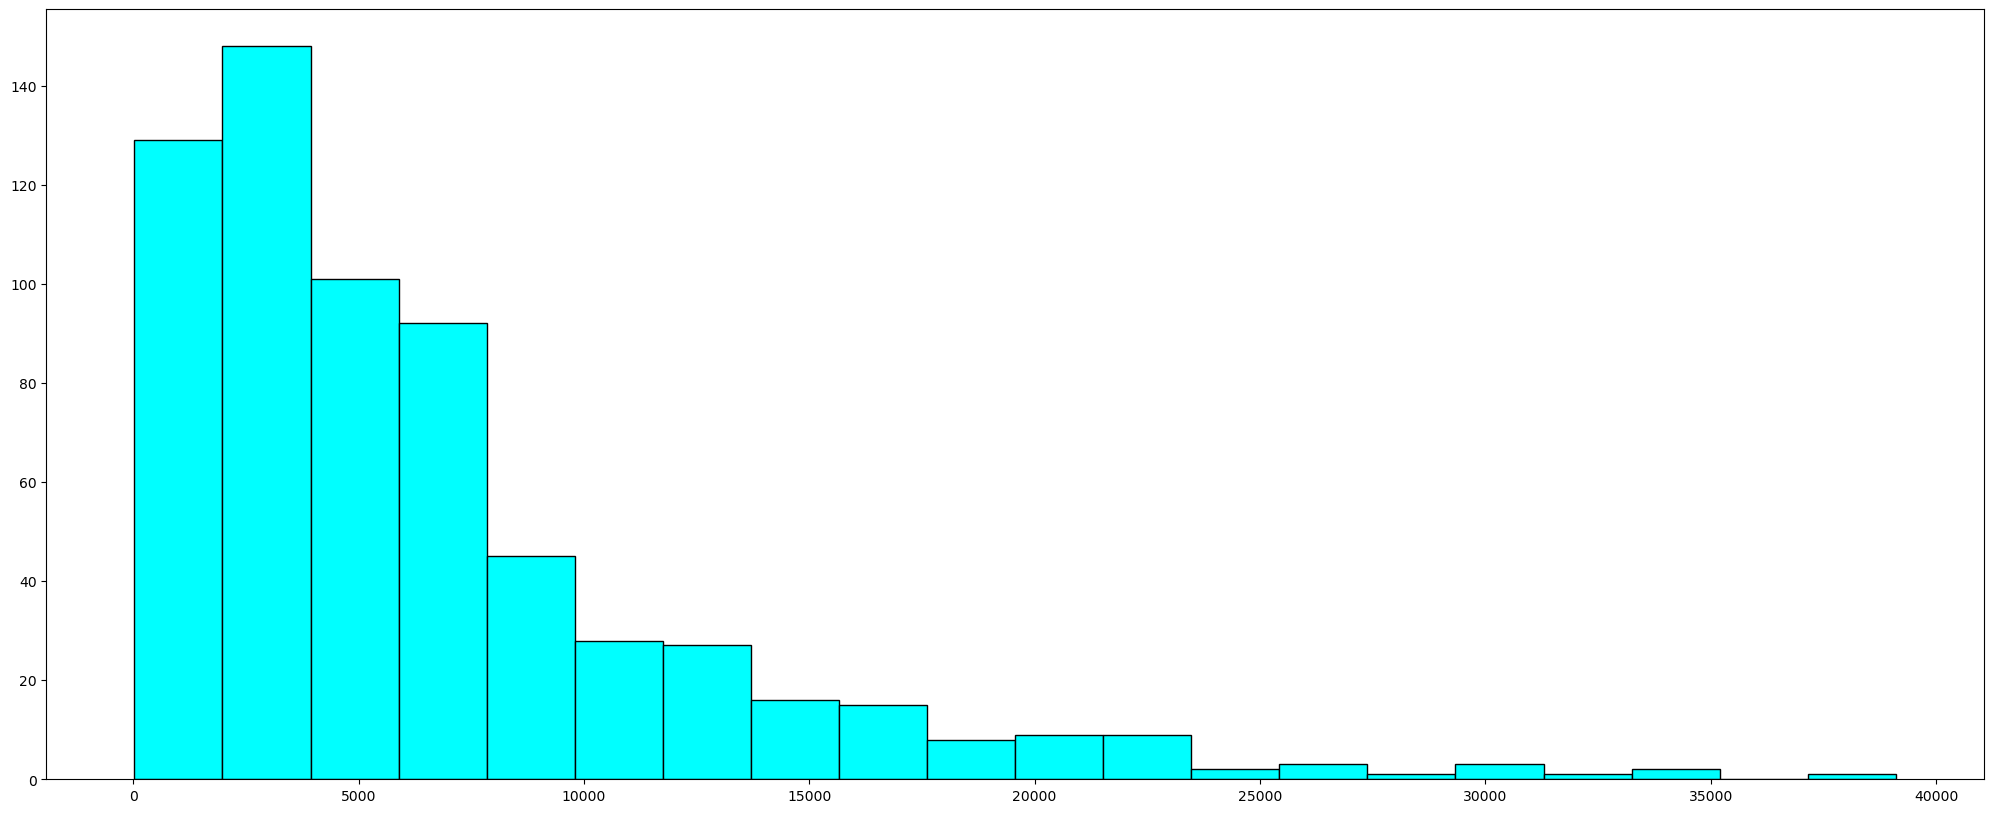

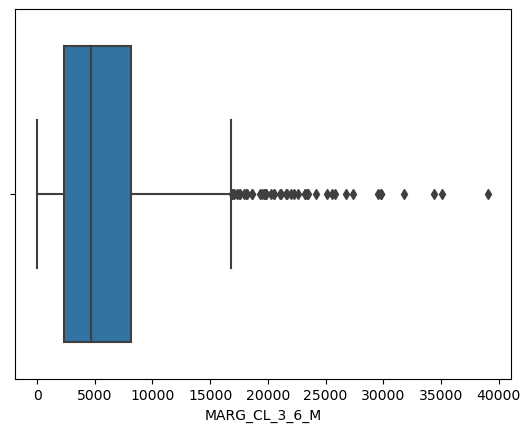

Description of MARG_CL_3_6_F
----------------------------------------------------------------------------
count      640.000000
mean     10339.864063
std       8467.473429
min         85.000000
25%       4351.500000
50%       8295.000000
75%      15102.000000
max      50065.000000
Name: MARG_CL_3_6_F, dtype: float64 Distribution of MARG_CL_3_6_F
----------------------------------------------------------------------------
BoxPlot of MARG_CL_3_6_F
----------------------------------------------------------------------------


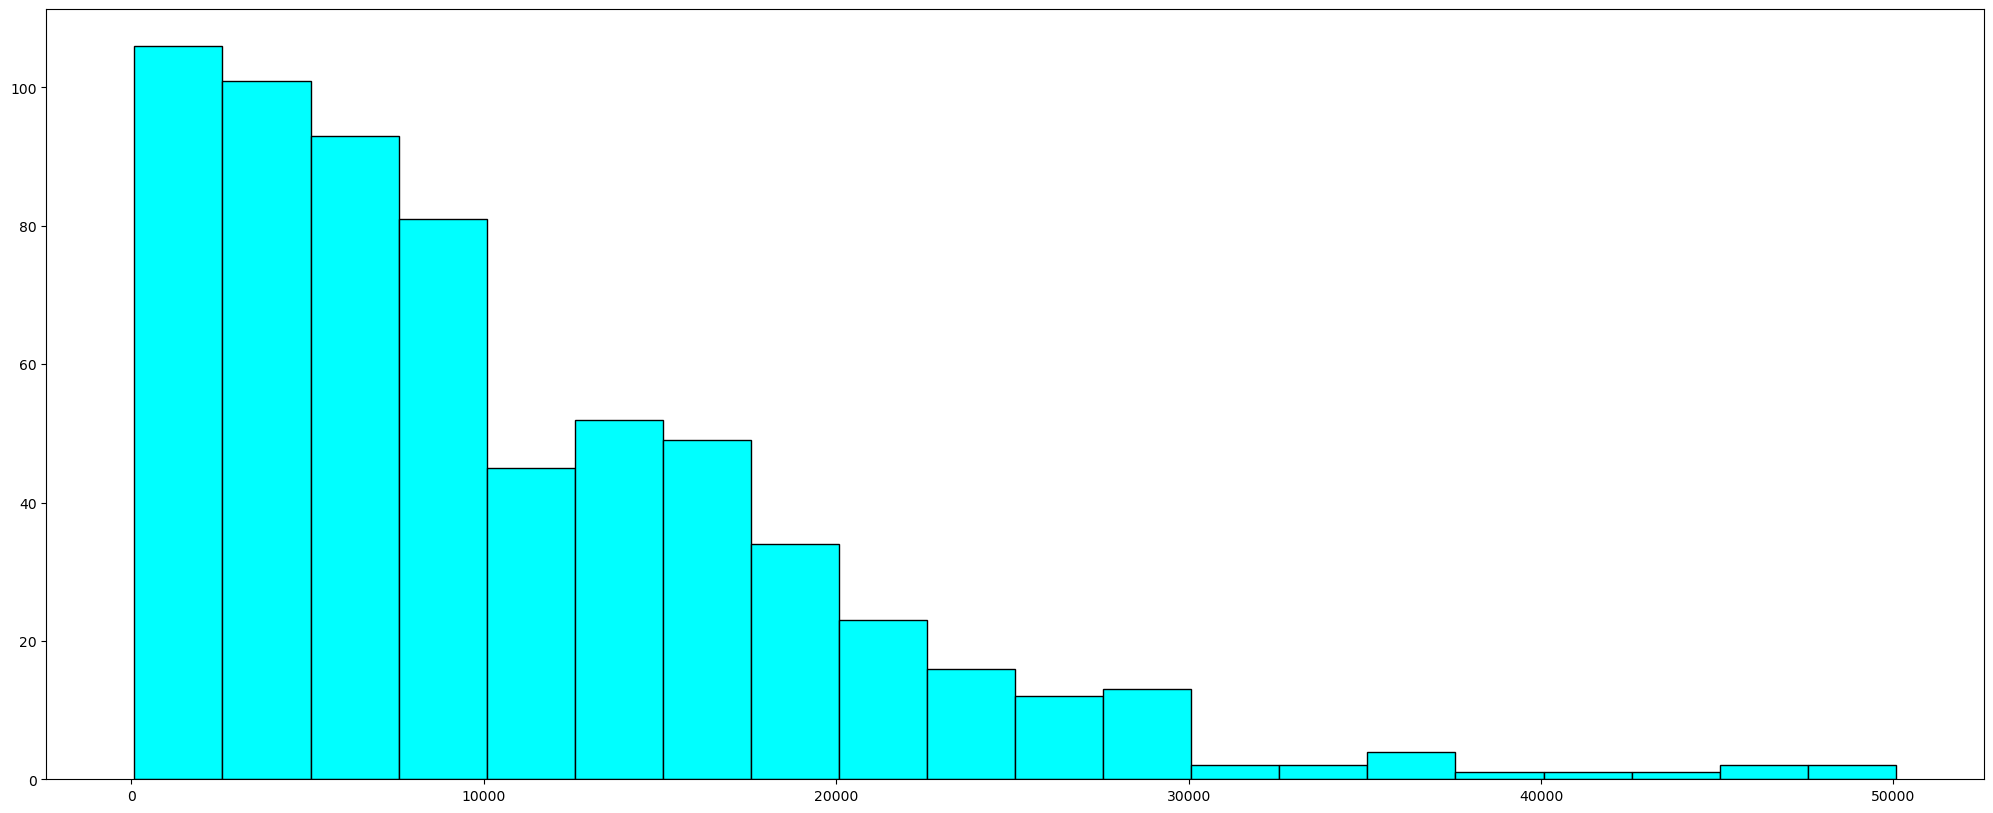

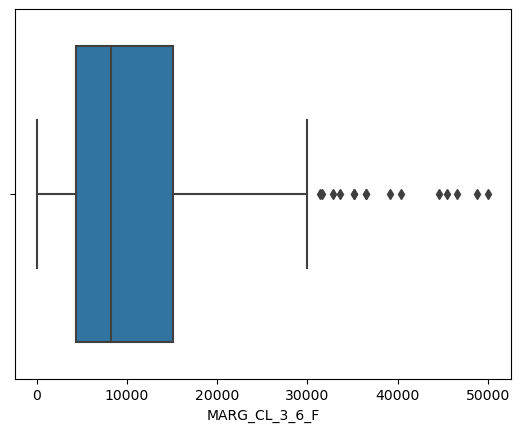

Description of MARG_AL_3_6_M
----------------------------------------------------------------------------
count     640.000000
mean      789.848438
std       905.639279
min         0.000000
25%       235.500000
50%       480.500000
75%       986.000000
max      7426.000000
Name: MARG_AL_3_6_M, dtype: float64 Distribution of MARG_AL_3_6_M
----------------------------------------------------------------------------
BoxPlot of MARG_AL_3_6_M
----------------------------------------------------------------------------


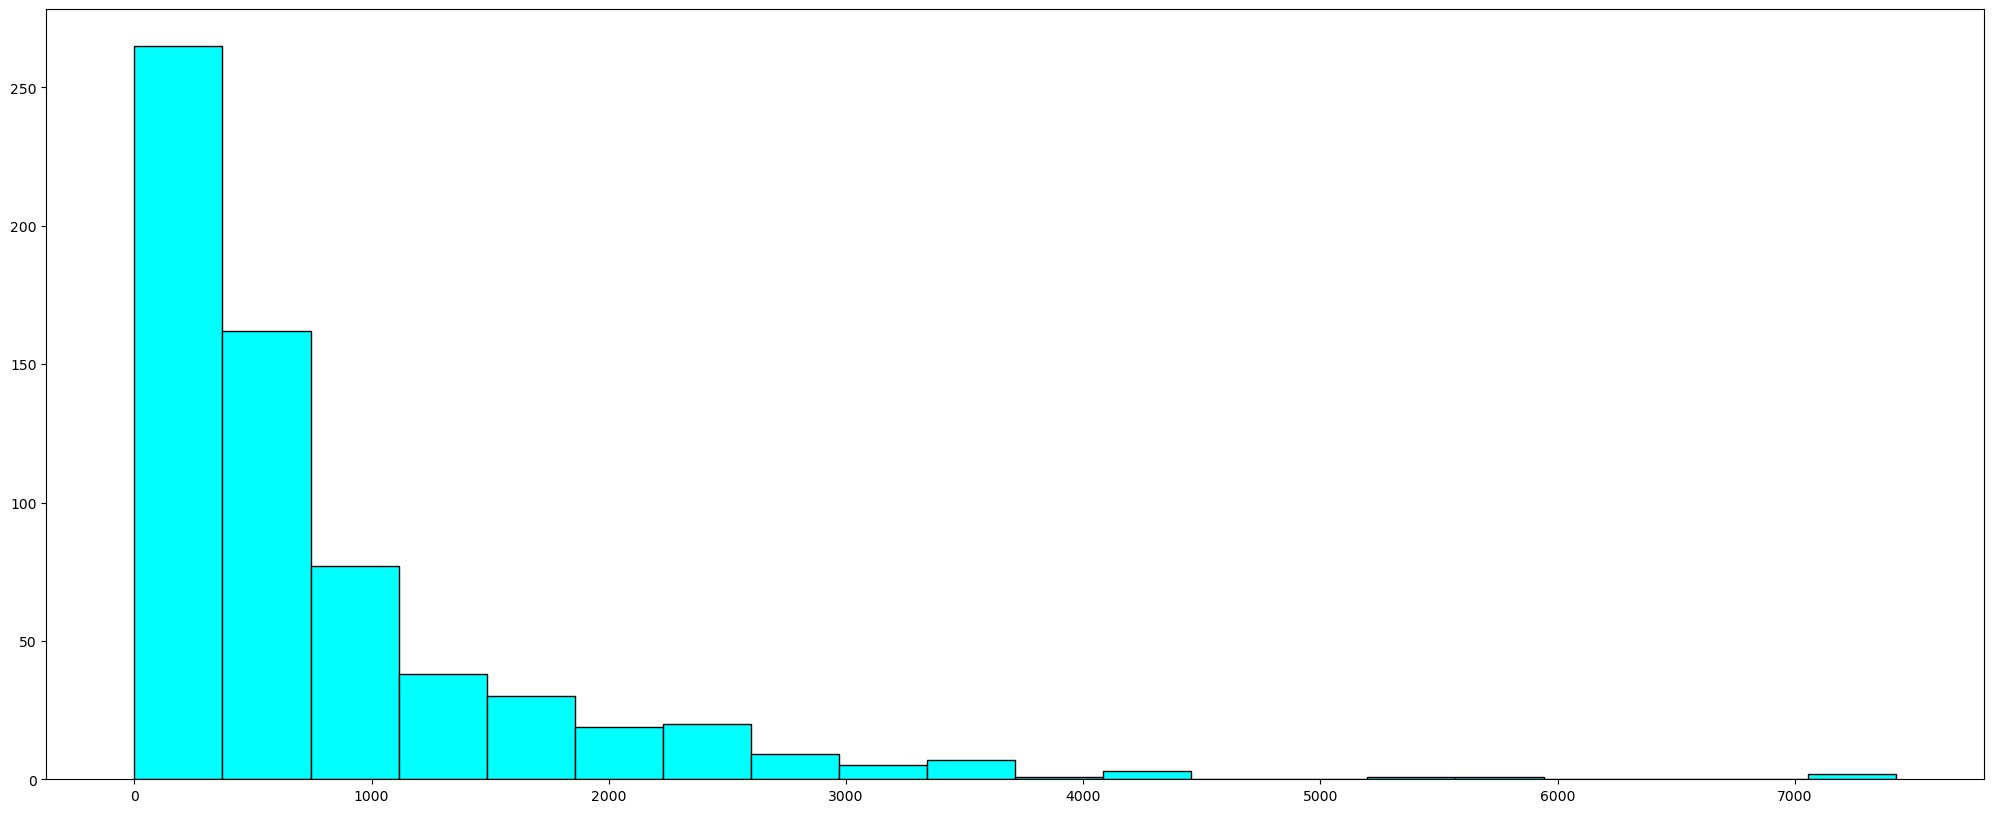

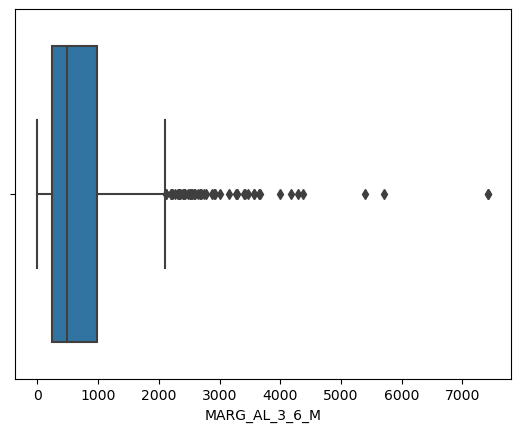

Description of MARG_AL_3_6_F
----------------------------------------------------------------------------
count      640.000000
mean      1749.584375
std       2496.541514
min          0.000000
25%        497.250000
50%        985.500000
75%       2059.000000
max      27171.000000
Name: MARG_AL_3_6_F, dtype: float64 Distribution of MARG_AL_3_6_F
----------------------------------------------------------------------------
BoxPlot of MARG_AL_3_6_F
----------------------------------------------------------------------------


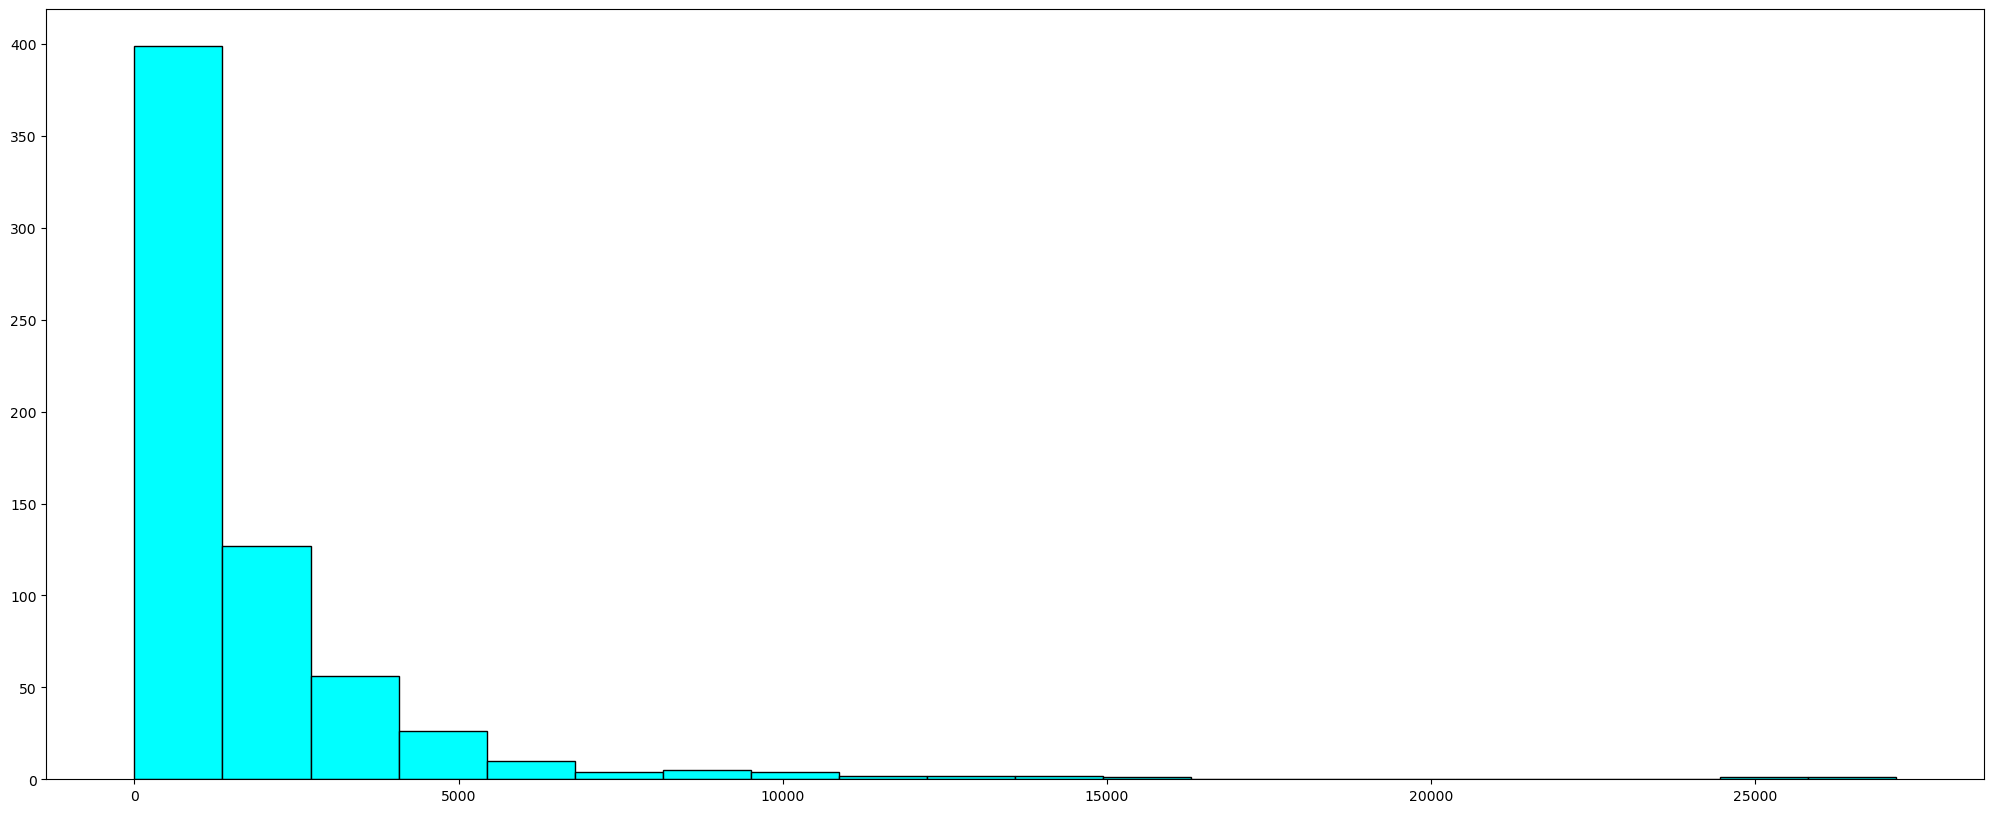

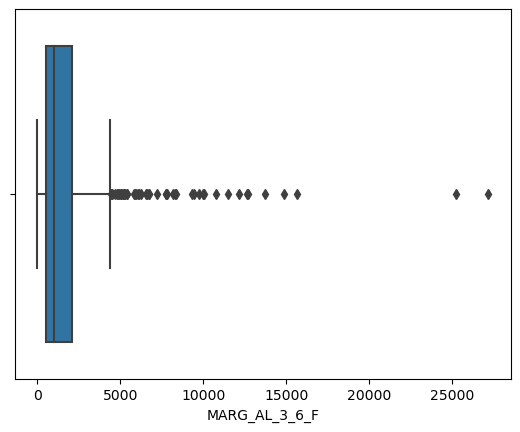

Description of MARG_HH_3_6_M
----------------------------------------------------------------------------
count      640.000000
mean      2743.635938
std       3059.586387
min          0.000000
25%        718.750000
50%       1714.500000
75%       3702.250000
max      19343.000000
Name: MARG_HH_3_6_M, dtype: float64 Distribution of MARG_HH_3_6_M
----------------------------------------------------------------------------
BoxPlot of MARG_HH_3_6_M
----------------------------------------------------------------------------


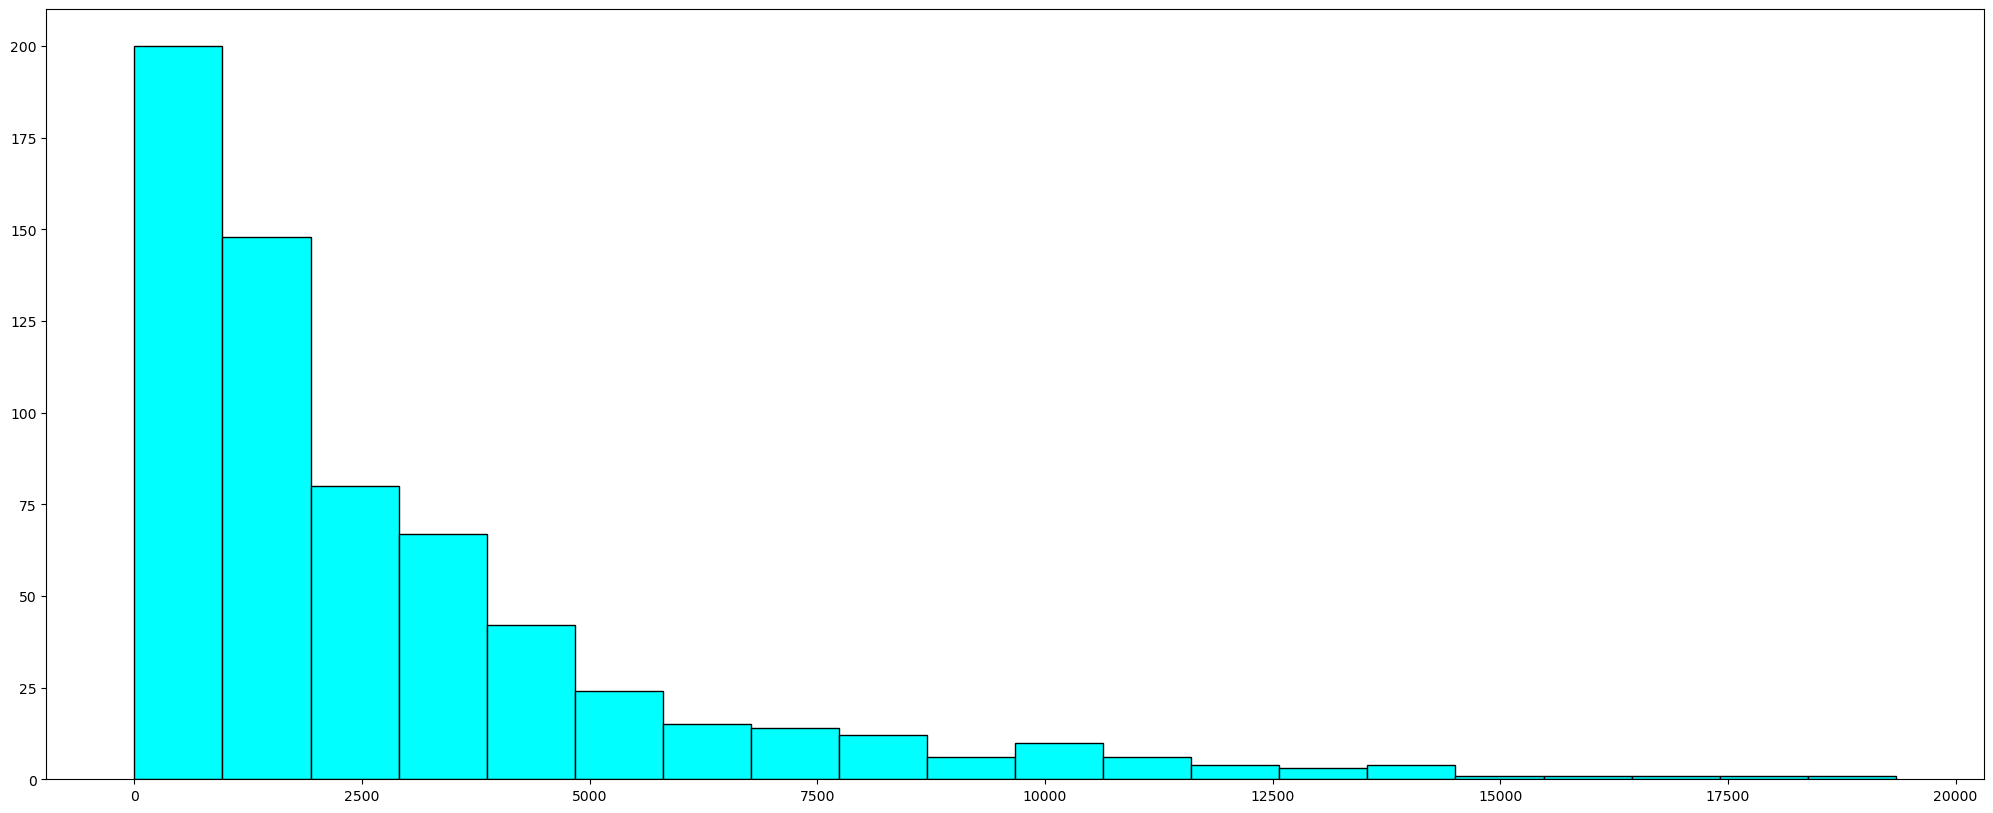

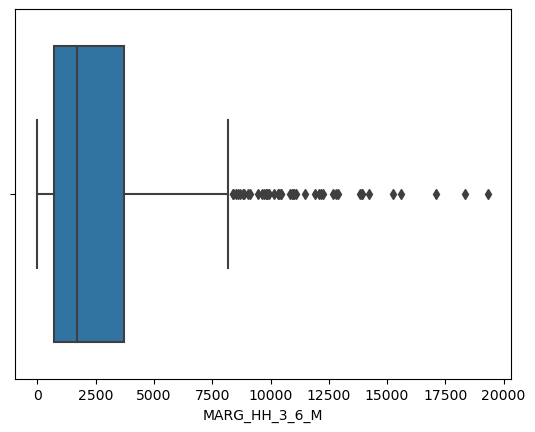

Description of MARG_HH_3_6_F
----------------------------------------------------------------------------
count      640.00000
mean      5169.85000
std       5335.64096
min          0.00000
25%       1113.75000
50%       3294.00000
75%       7502.25000
max      36253.00000
Name: MARG_HH_3_6_F, dtype: float64 Distribution of MARG_HH_3_6_F
----------------------------------------------------------------------------
BoxPlot of MARG_HH_3_6_F
----------------------------------------------------------------------------


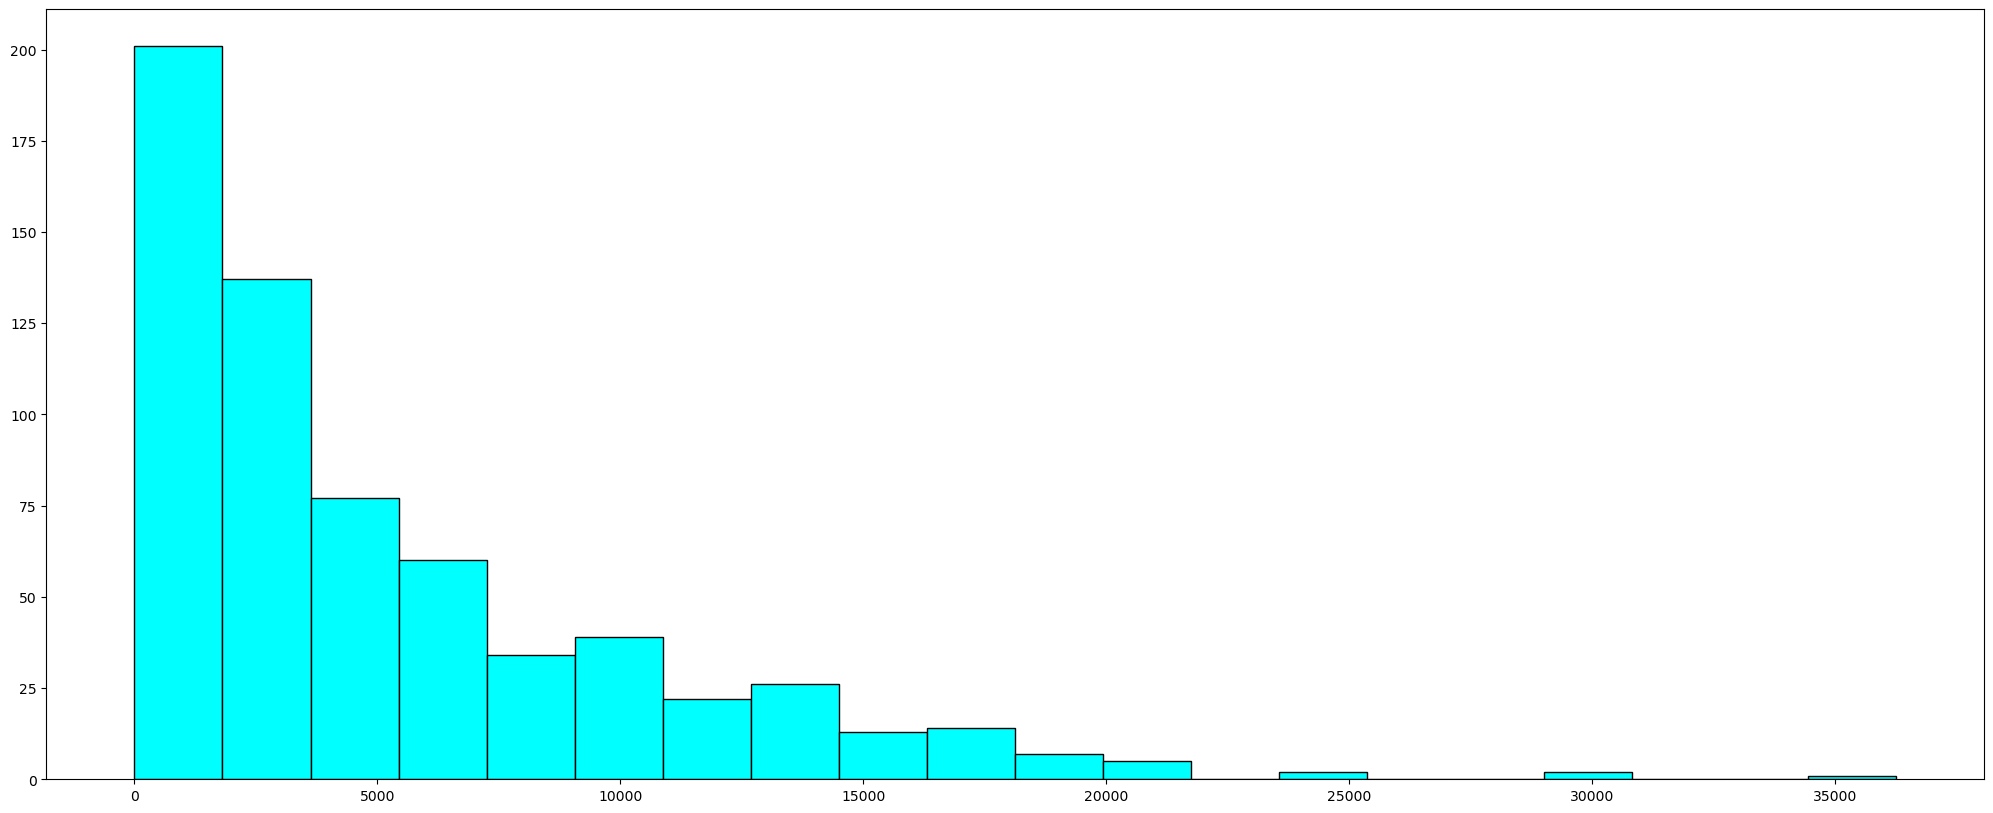

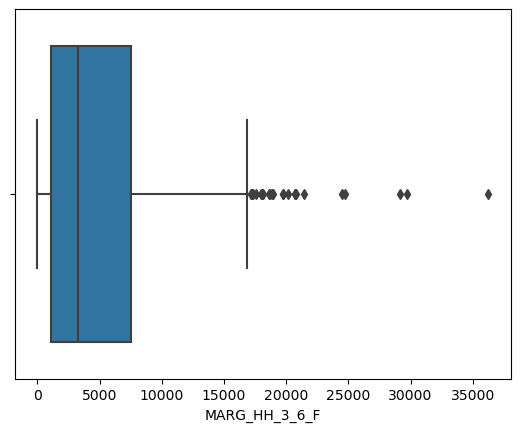

Description of MARG_OT_3_6_M
----------------------------------------------------------------------------
count     640.000000
mean      245.362500
std       358.728567
min         0.000000
25%        58.000000
50%       129.500000
75%       276.000000
max      3535.000000
Name: MARG_OT_3_6_M, dtype: float64 Distribution of MARG_OT_3_6_M
----------------------------------------------------------------------------
BoxPlot of MARG_OT_3_6_M
----------------------------------------------------------------------------


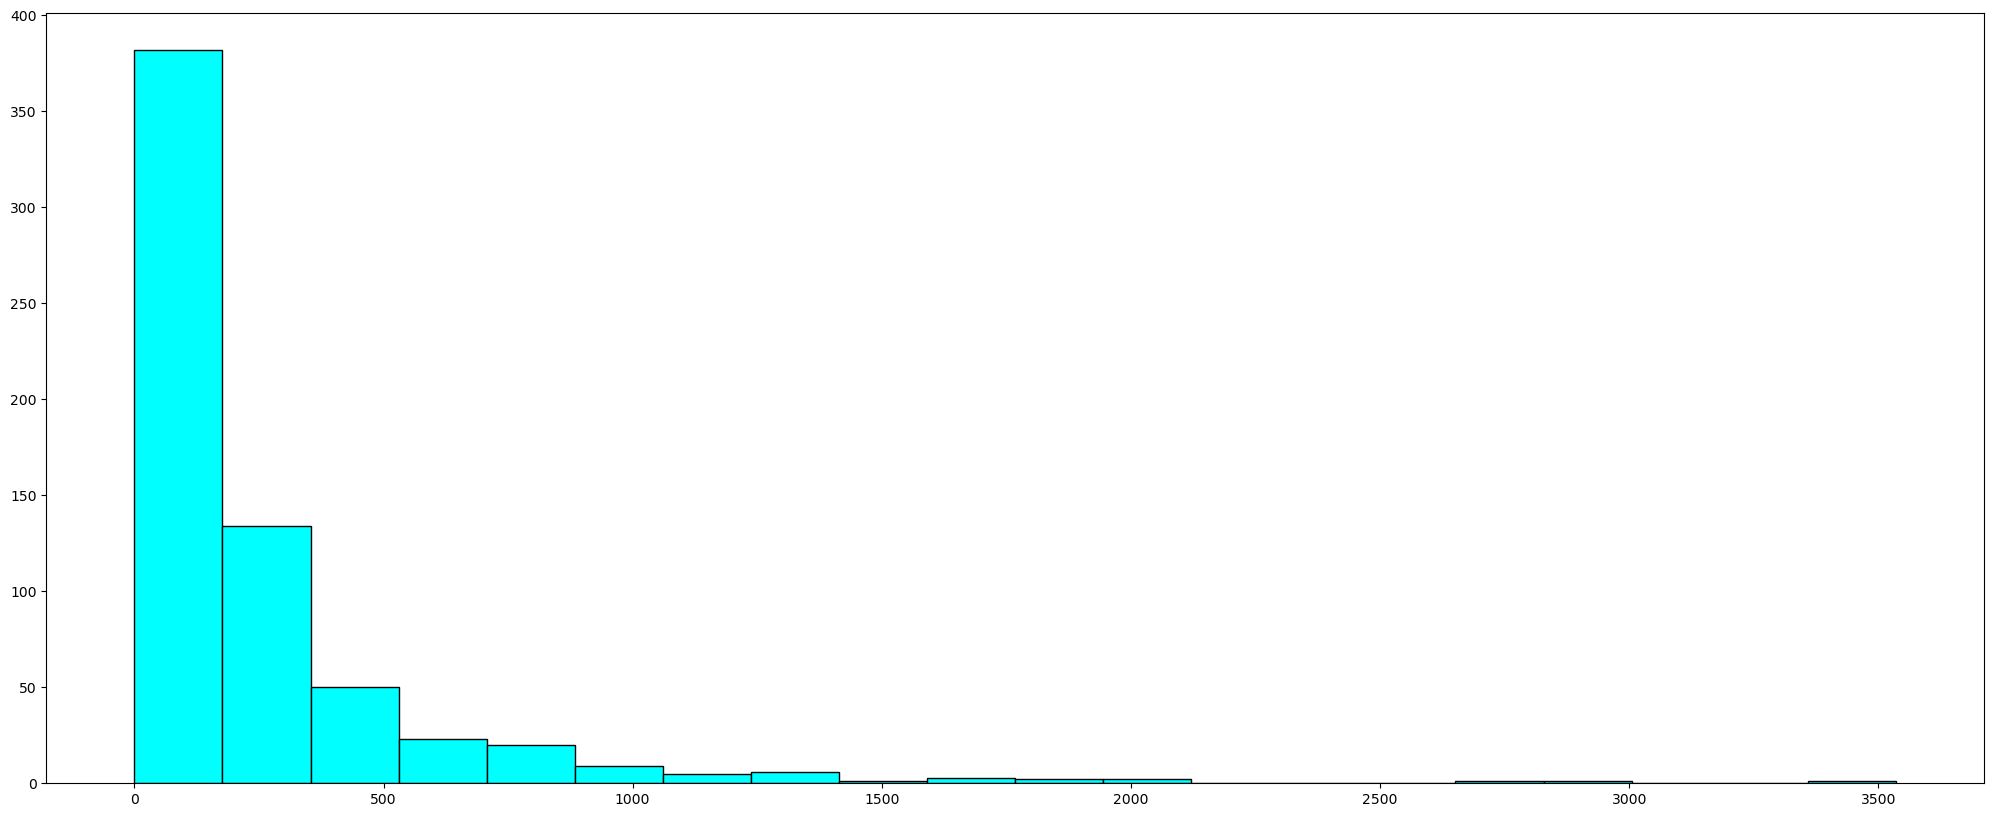

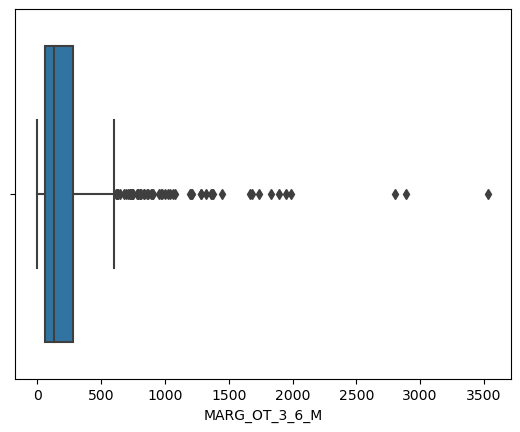

Description of MARG_OT_3_6_F
----------------------------------------------------------------------------
count      640.000000
mean       585.884375
std        900.025817
min          0.000000
25%        127.750000
50%        320.500000
75%        719.250000
max      12094.000000
Name: MARG_OT_3_6_F, dtype: float64 Distribution of MARG_OT_3_6_F
----------------------------------------------------------------------------
BoxPlot of MARG_OT_3_6_F
----------------------------------------------------------------------------


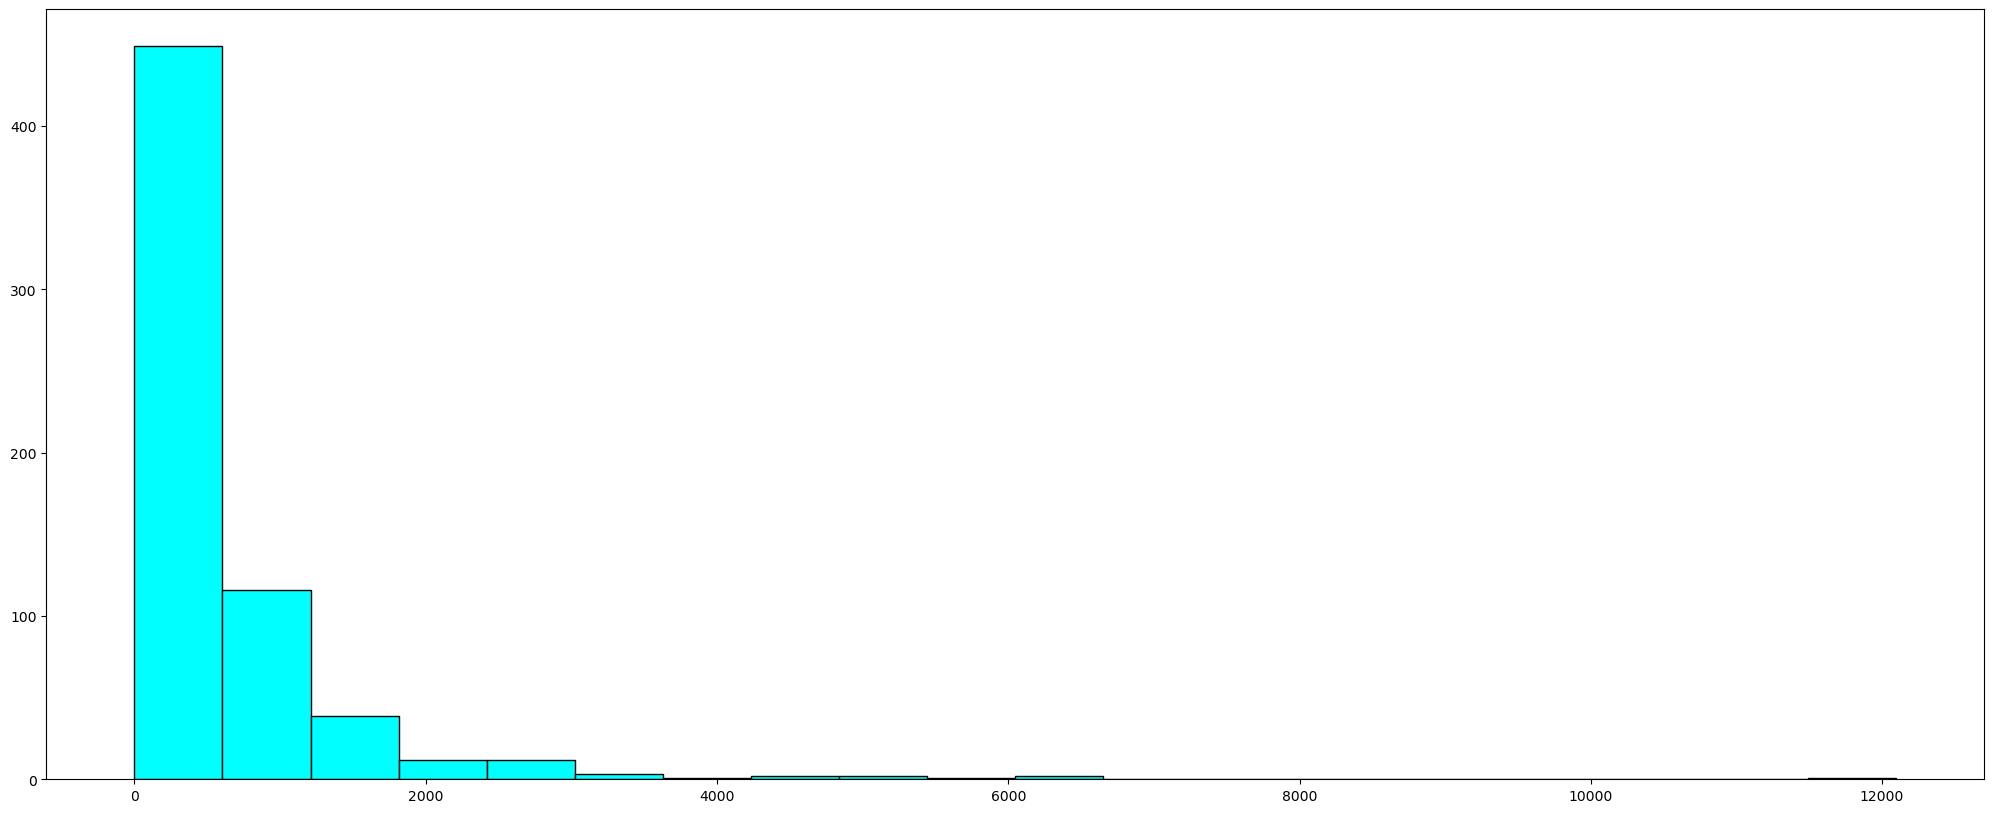

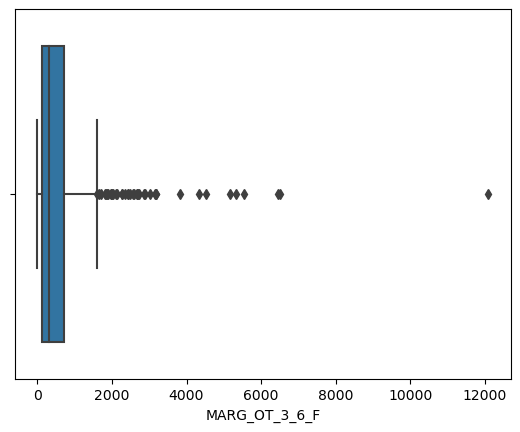

Description of MARGWORK_0_3_M
----------------------------------------------------------------------------
count      640.000000
mean      2616.140625
std       3036.964381
min          7.000000
25%        755.000000
50%       1681.500000
75%       3320.250000
max      20648.000000
Name: MARGWORK_0_3_M, dtype: float64 Distribution of MARGWORK_0_3_M
----------------------------------------------------------------------------
BoxPlot of MARGWORK_0_3_M
----------------------------------------------------------------------------


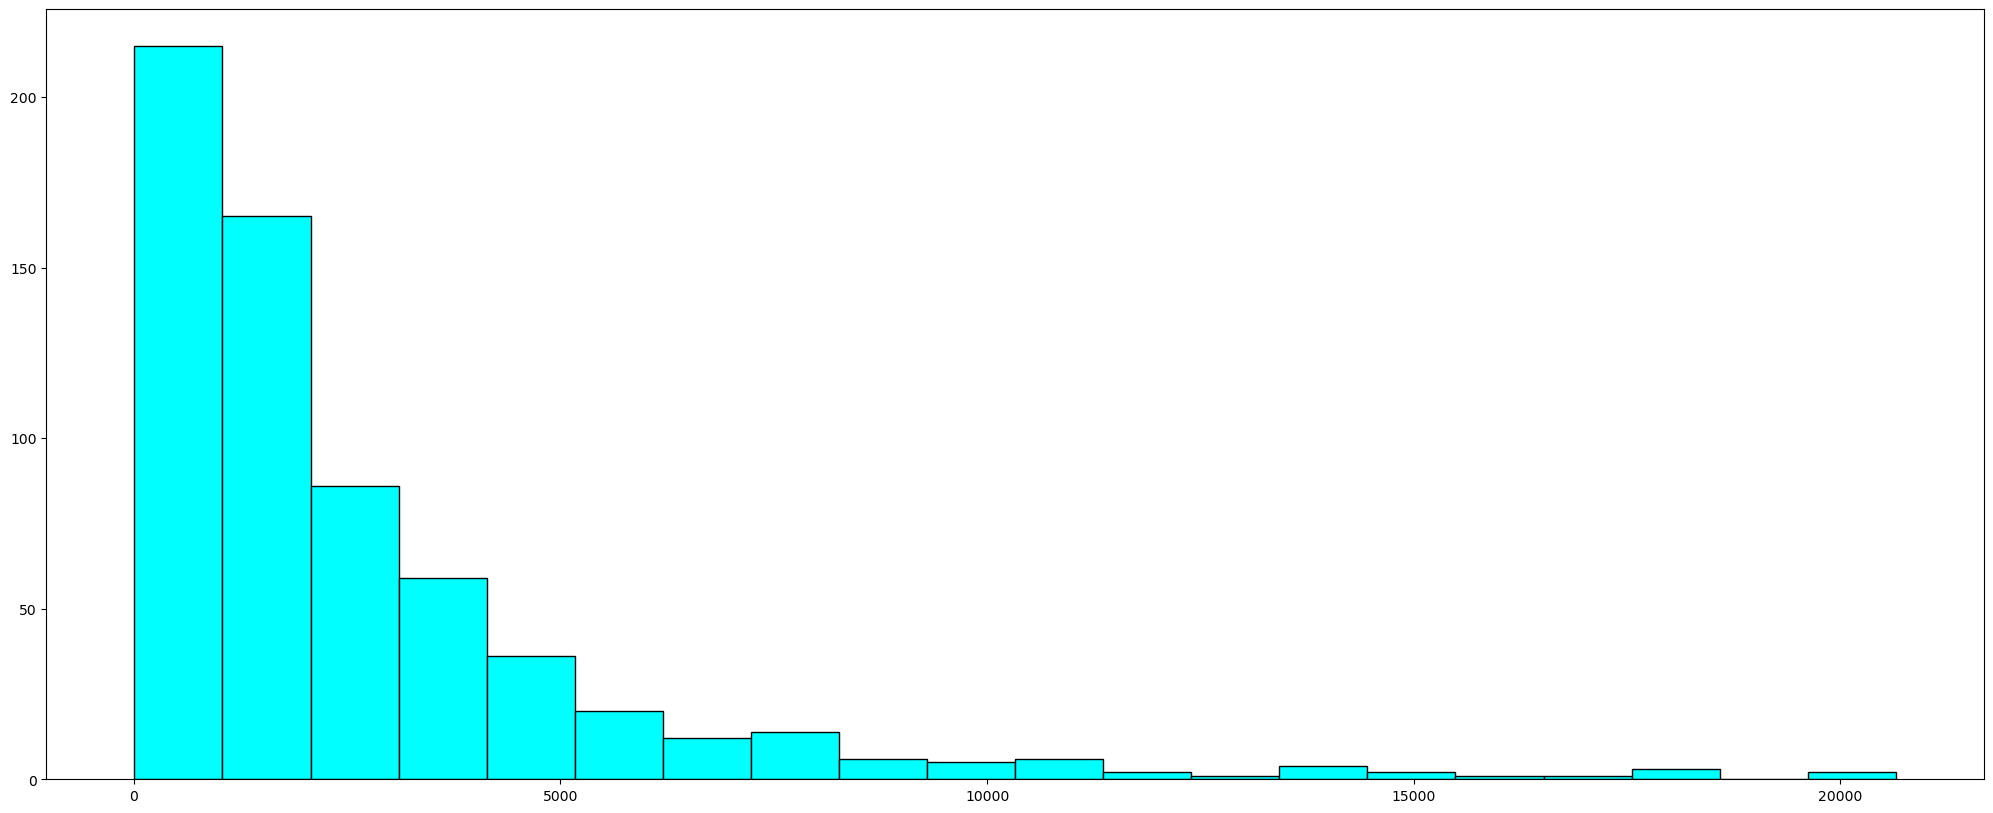

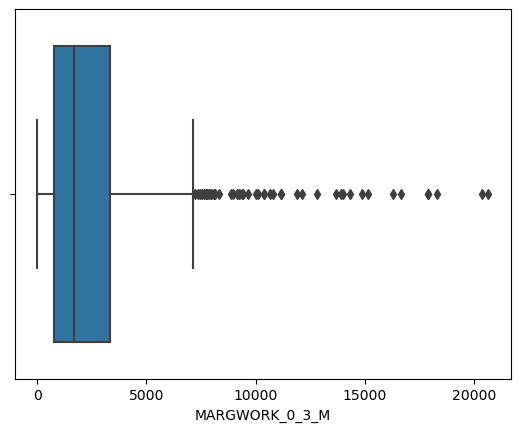

Description of MARGWORK_0_3_F
----------------------------------------------------------------------------
count      640.000000
mean      2834.545312
std       3327.836932
min         14.000000
25%        833.500000
50%       1834.500000
75%       3610.500000
max      25844.000000
Name: MARGWORK_0_3_F, dtype: float64 Distribution of MARGWORK_0_3_F
----------------------------------------------------------------------------
BoxPlot of MARGWORK_0_3_F
----------------------------------------------------------------------------


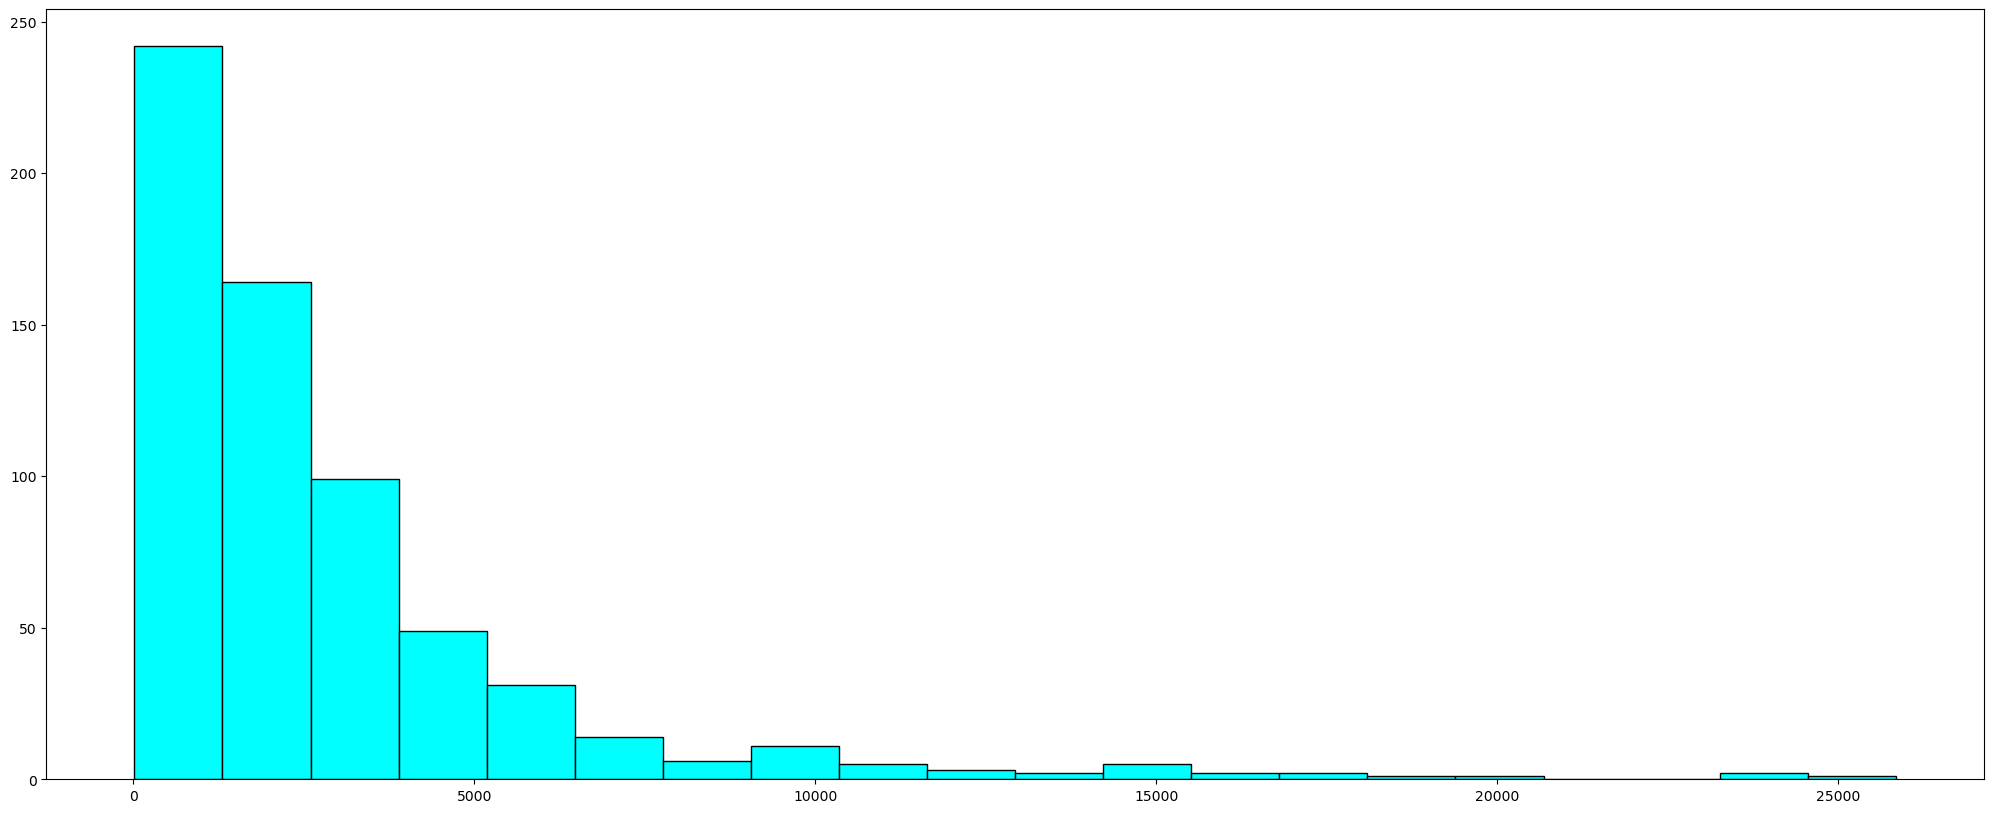

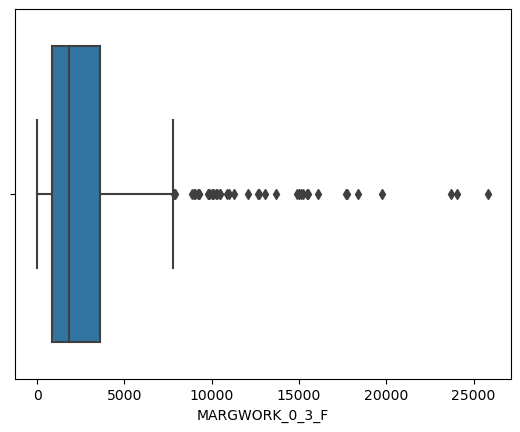

Description of MARG_CL_0_3_M
----------------------------------------------------------------------------
count     640.000000
mean     1392.973438
std      1489.707052
min         4.000000
25%       489.500000
50%       949.000000
75%      1714.000000
max      9875.000000
Name: MARG_CL_0_3_M, dtype: float64 Distribution of MARG_CL_0_3_M
----------------------------------------------------------------------------
BoxPlot of MARG_CL_0_3_M
----------------------------------------------------------------------------


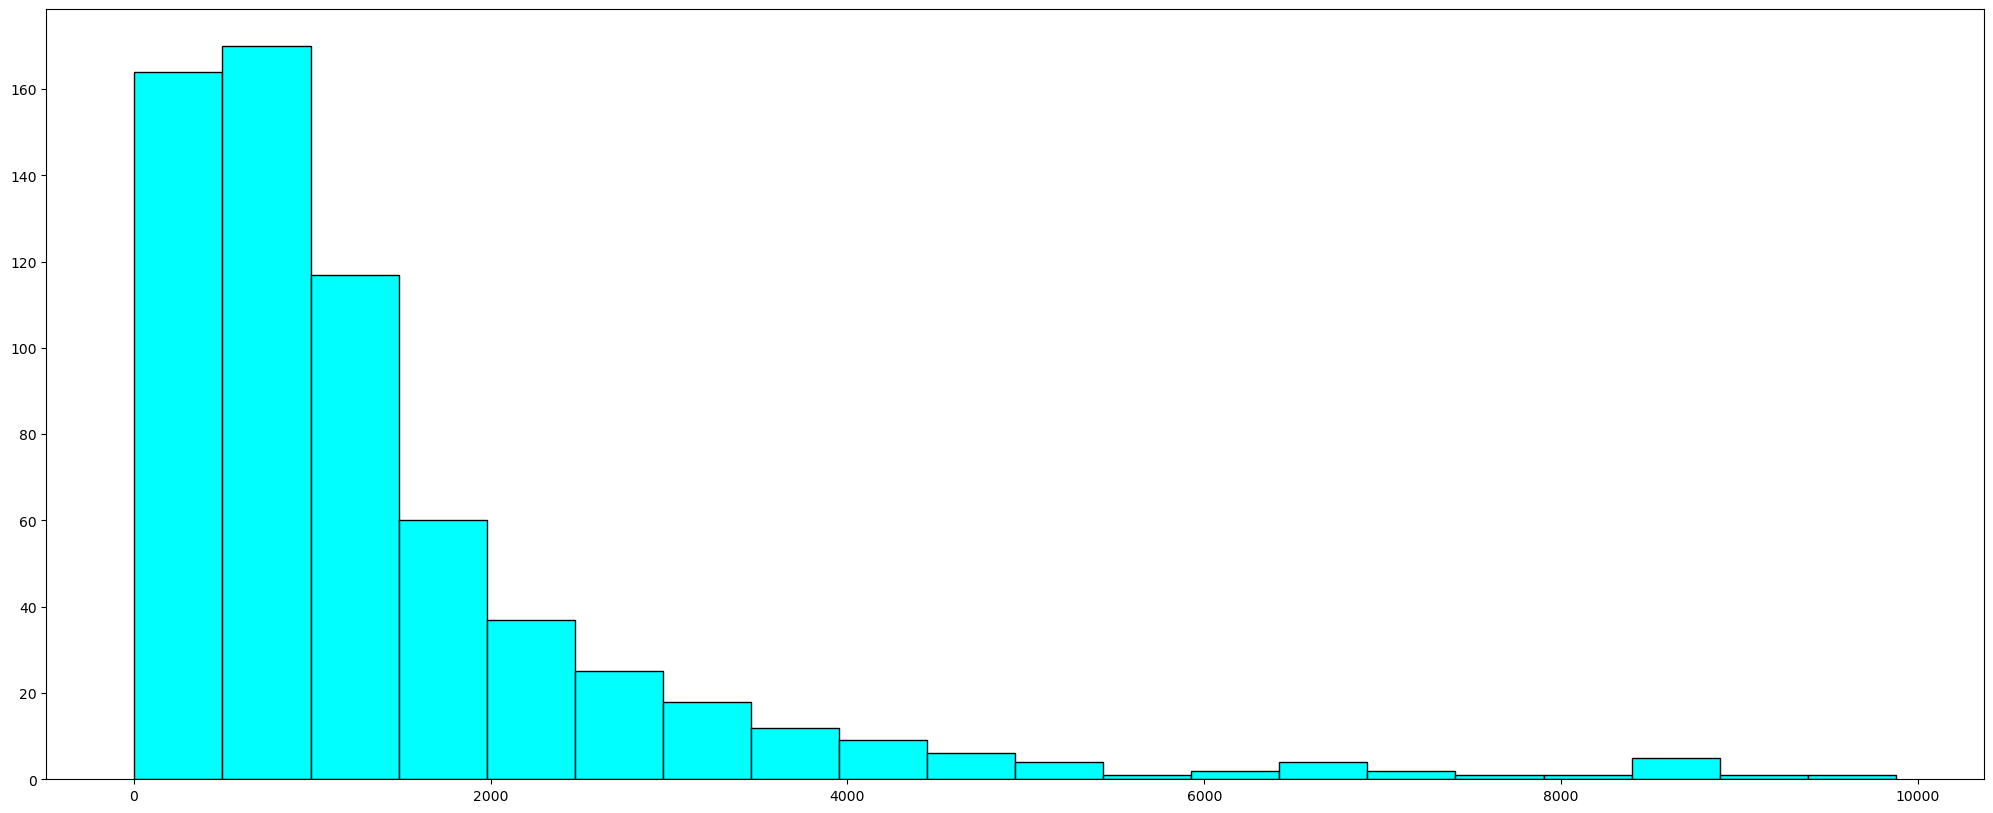

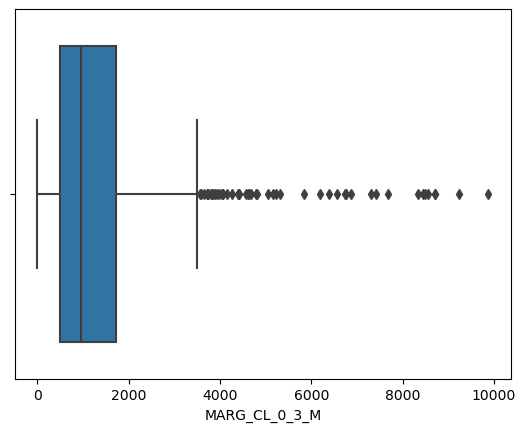

Description of MARG_CL_0_3_F
----------------------------------------------------------------------------
count      640.000000
mean      2757.050000
std       2788.776676
min         30.000000
25%        957.250000
50%       1928.000000
75%       3599.750000
max      21611.000000
Name: MARG_CL_0_3_F, dtype: float64 Distribution of MARG_CL_0_3_F
----------------------------------------------------------------------------
BoxPlot of MARG_CL_0_3_F
----------------------------------------------------------------------------


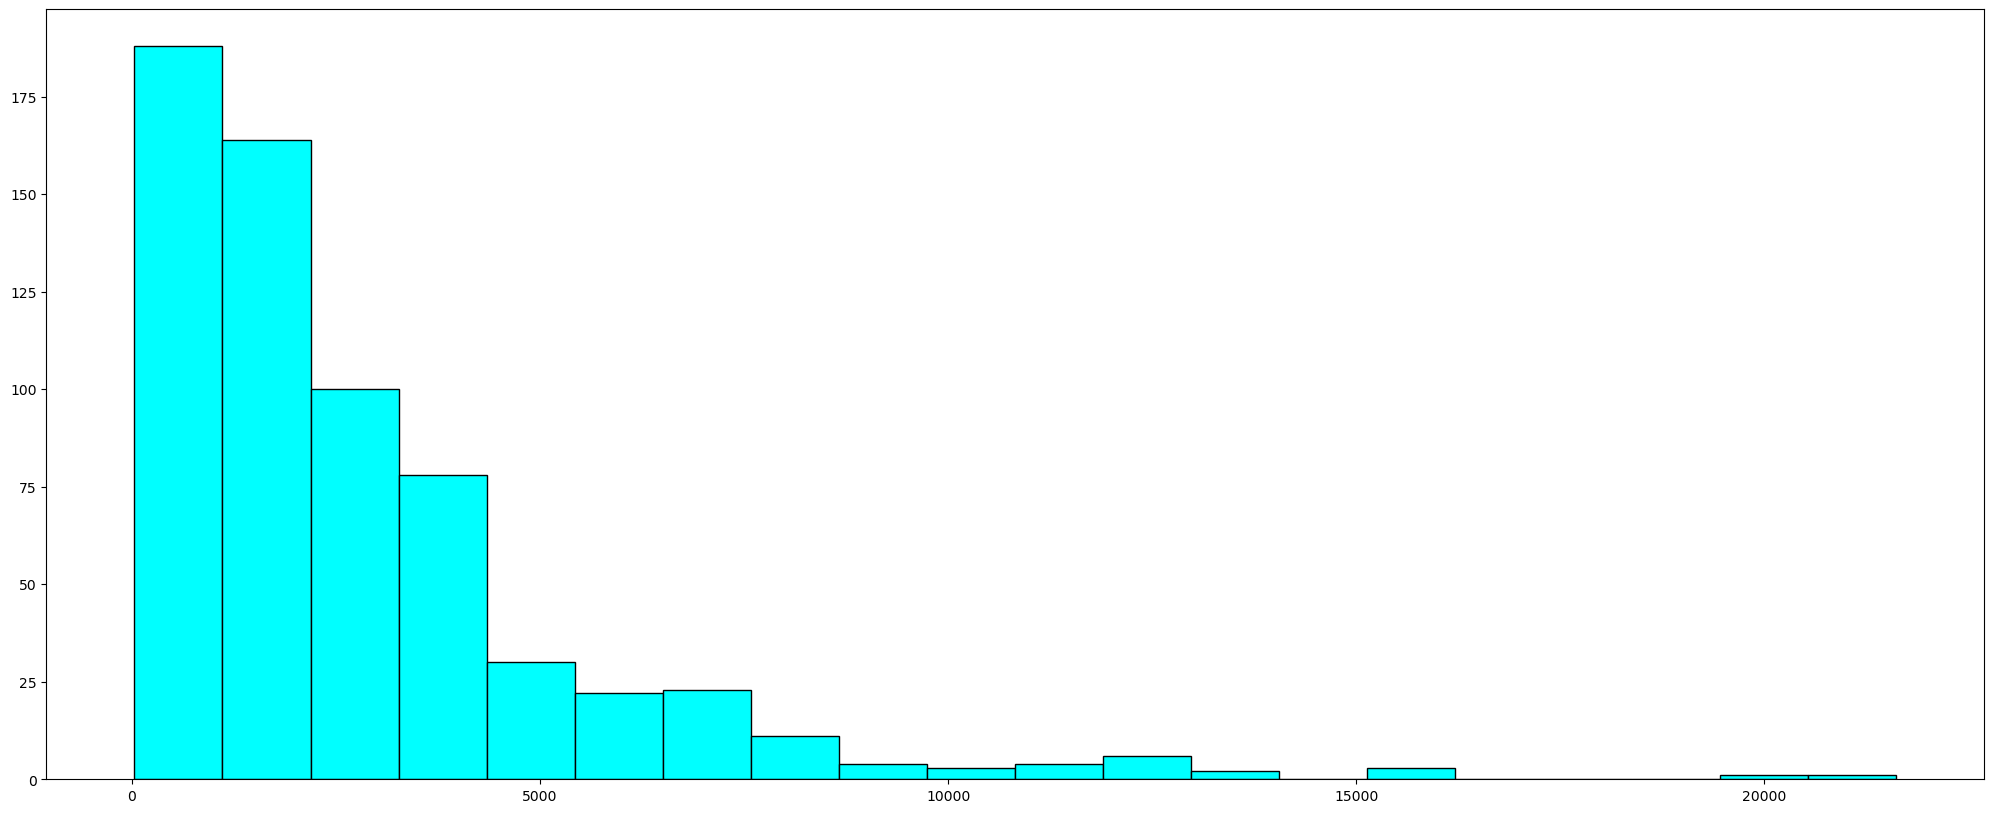

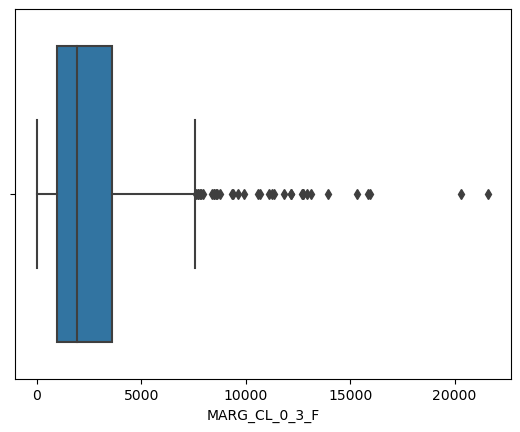

Description of MARG_AL_0_3_M
----------------------------------------------------------------------------
count     640.000000
mean      250.889062
std       453.336594
min         0.000000
25%        47.000000
50%       114.500000
75%       270.750000
max      5775.000000
Name: MARG_AL_0_3_M, dtype: float64 Distribution of MARG_AL_0_3_M
----------------------------------------------------------------------------
BoxPlot of MARG_AL_0_3_M
----------------------------------------------------------------------------


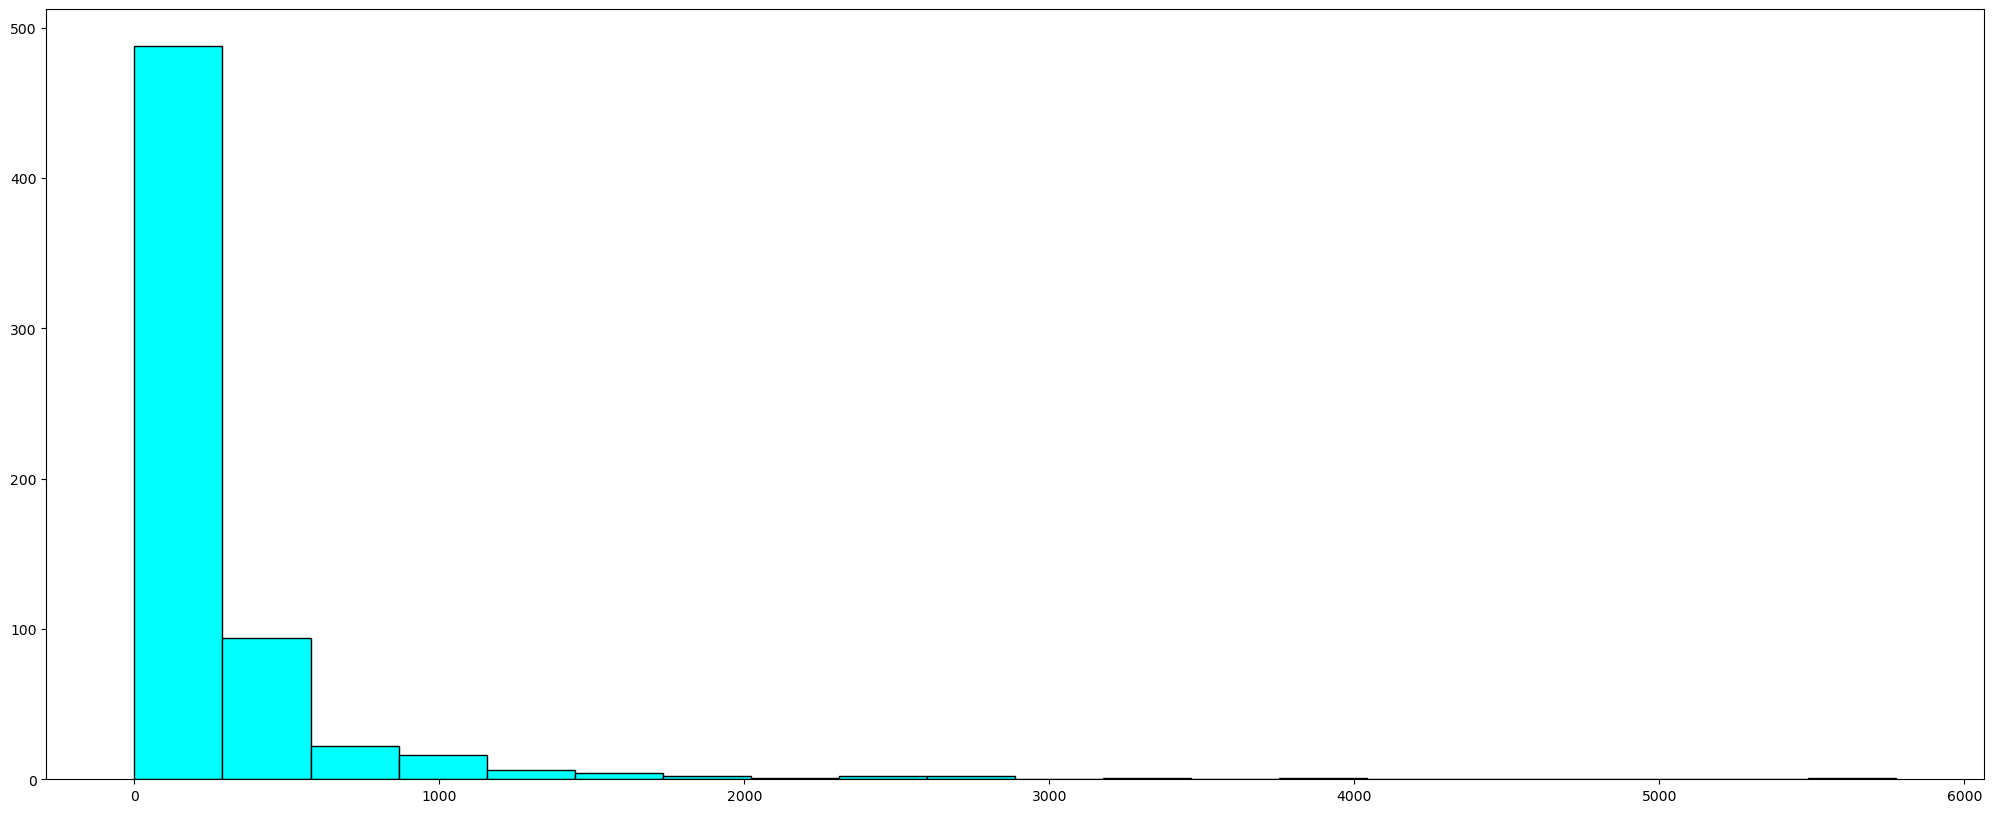

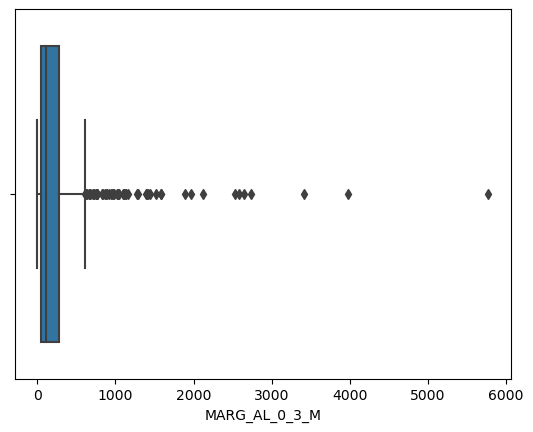

Description of MARG_AL_0_3_F
----------------------------------------------------------------------------
count      640.000000
mean       558.098438
std       1117.642748
min          0.000000
25%        109.000000
50%        247.500000
75%        568.750000
max      17153.000000
Name: MARG_AL_0_3_F, dtype: float64 Distribution of MARG_AL_0_3_F
----------------------------------------------------------------------------
BoxPlot of MARG_AL_0_3_F
----------------------------------------------------------------------------


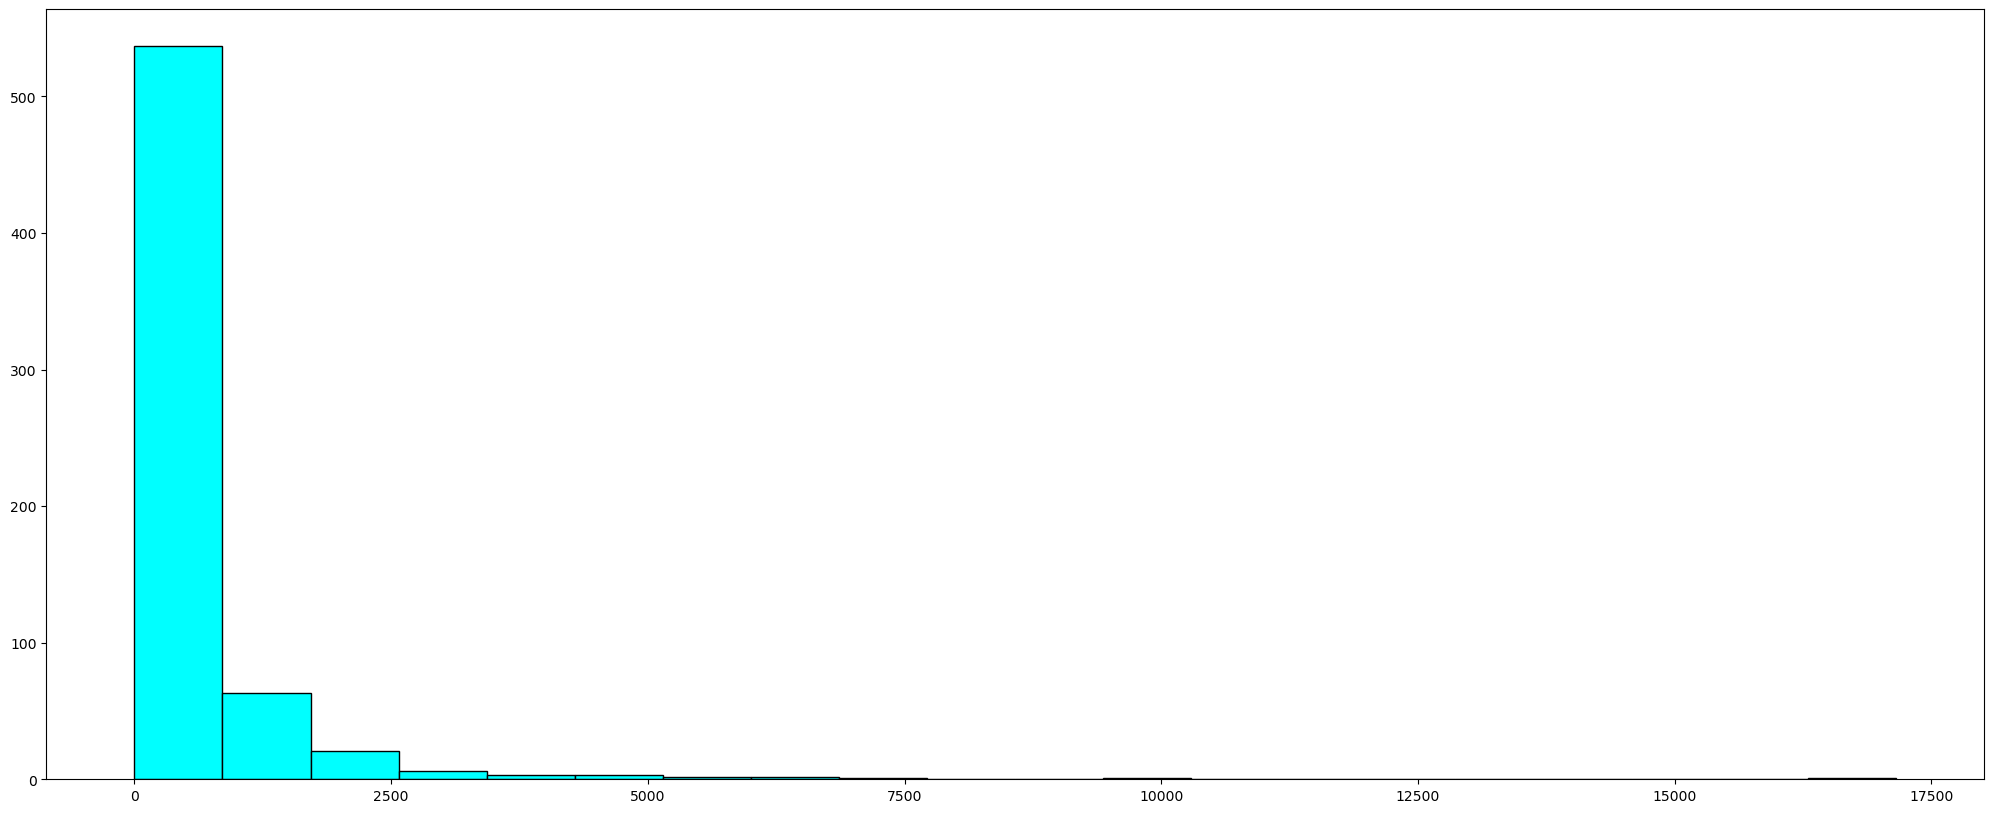

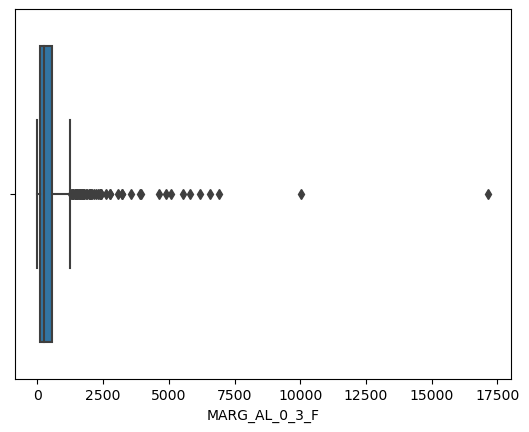

Description of MARG_HH_0_3_M
----------------------------------------------------------------------------
count     640.000000
mean      560.690625
std       762.578991
min         0.000000
25%       136.500000
50%       308.000000
75%       642.000000
max      6116.000000
Name: MARG_HH_0_3_M, dtype: float64 Distribution of MARG_HH_0_3_M
----------------------------------------------------------------------------
BoxPlot of MARG_HH_0_3_M
----------------------------------------------------------------------------


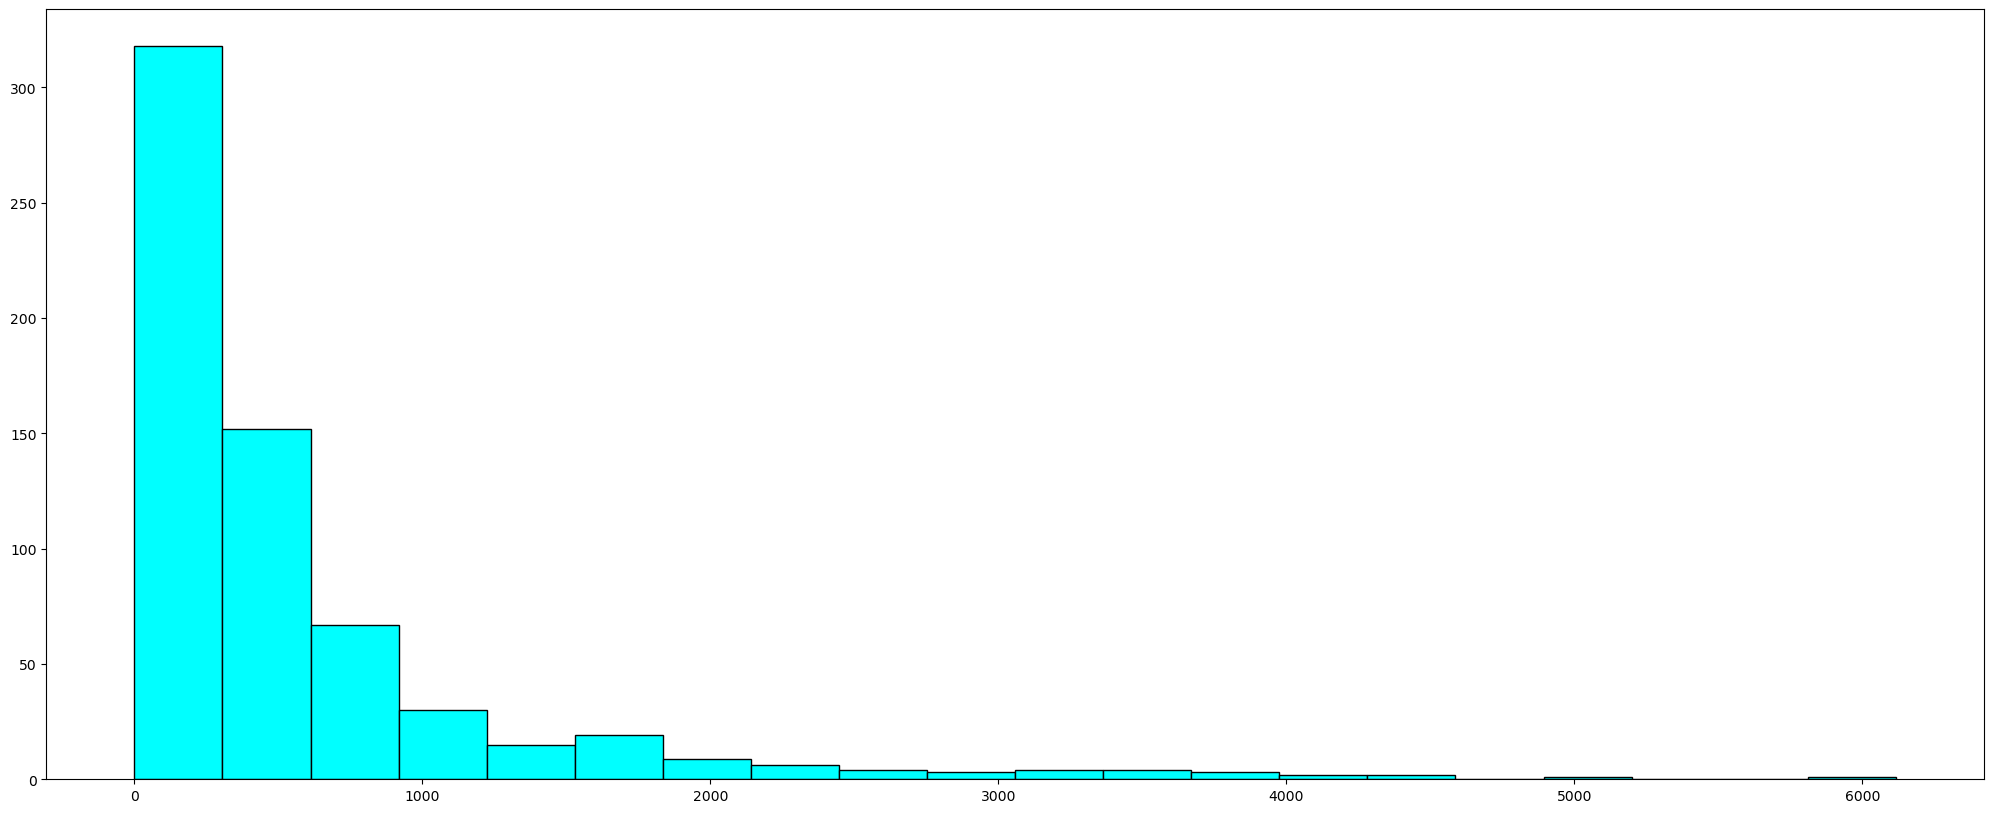

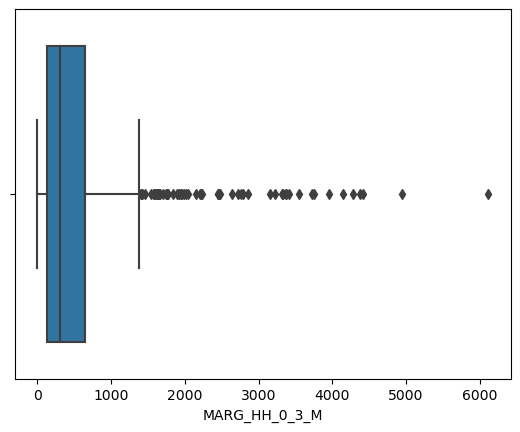

Description of MARG_HH_0_3_F
----------------------------------------------------------------------------
count      640.000000
mean      1293.431250
std       1585.377936
min          0.000000
25%        298.000000
50%        717.000000
75%       1710.750000
max      13714.000000
Name: MARG_HH_0_3_F, dtype: float64 Distribution of MARG_HH_0_3_F
----------------------------------------------------------------------------
BoxPlot of MARG_HH_0_3_F
----------------------------------------------------------------------------


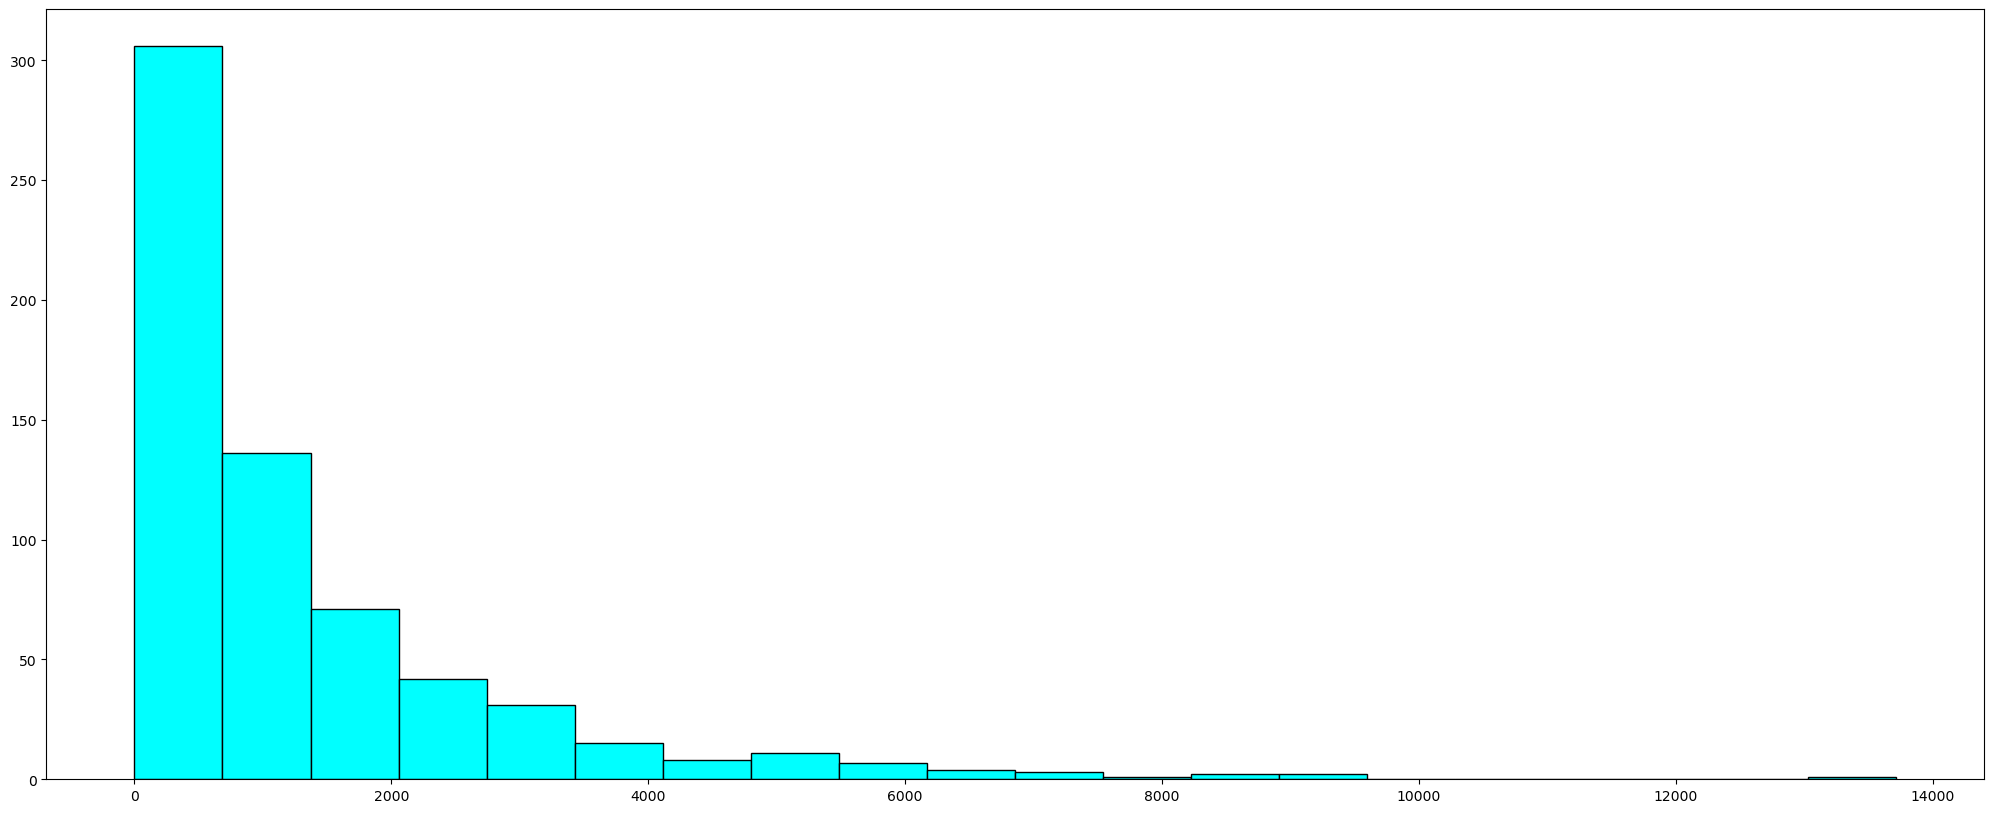

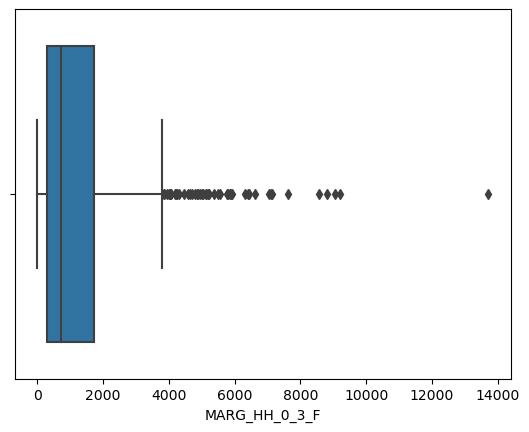

Description of MARG_OT_0_3_M
----------------------------------------------------------------------------
count    640.000000
mean      71.379688
std      107.897627
min        0.000000
25%       14.000000
50%       35.000000
75%       79.000000
max      895.000000
Name: MARG_OT_0_3_M, dtype: float64 Distribution of MARG_OT_0_3_M
----------------------------------------------------------------------------
BoxPlot of MARG_OT_0_3_M
----------------------------------------------------------------------------


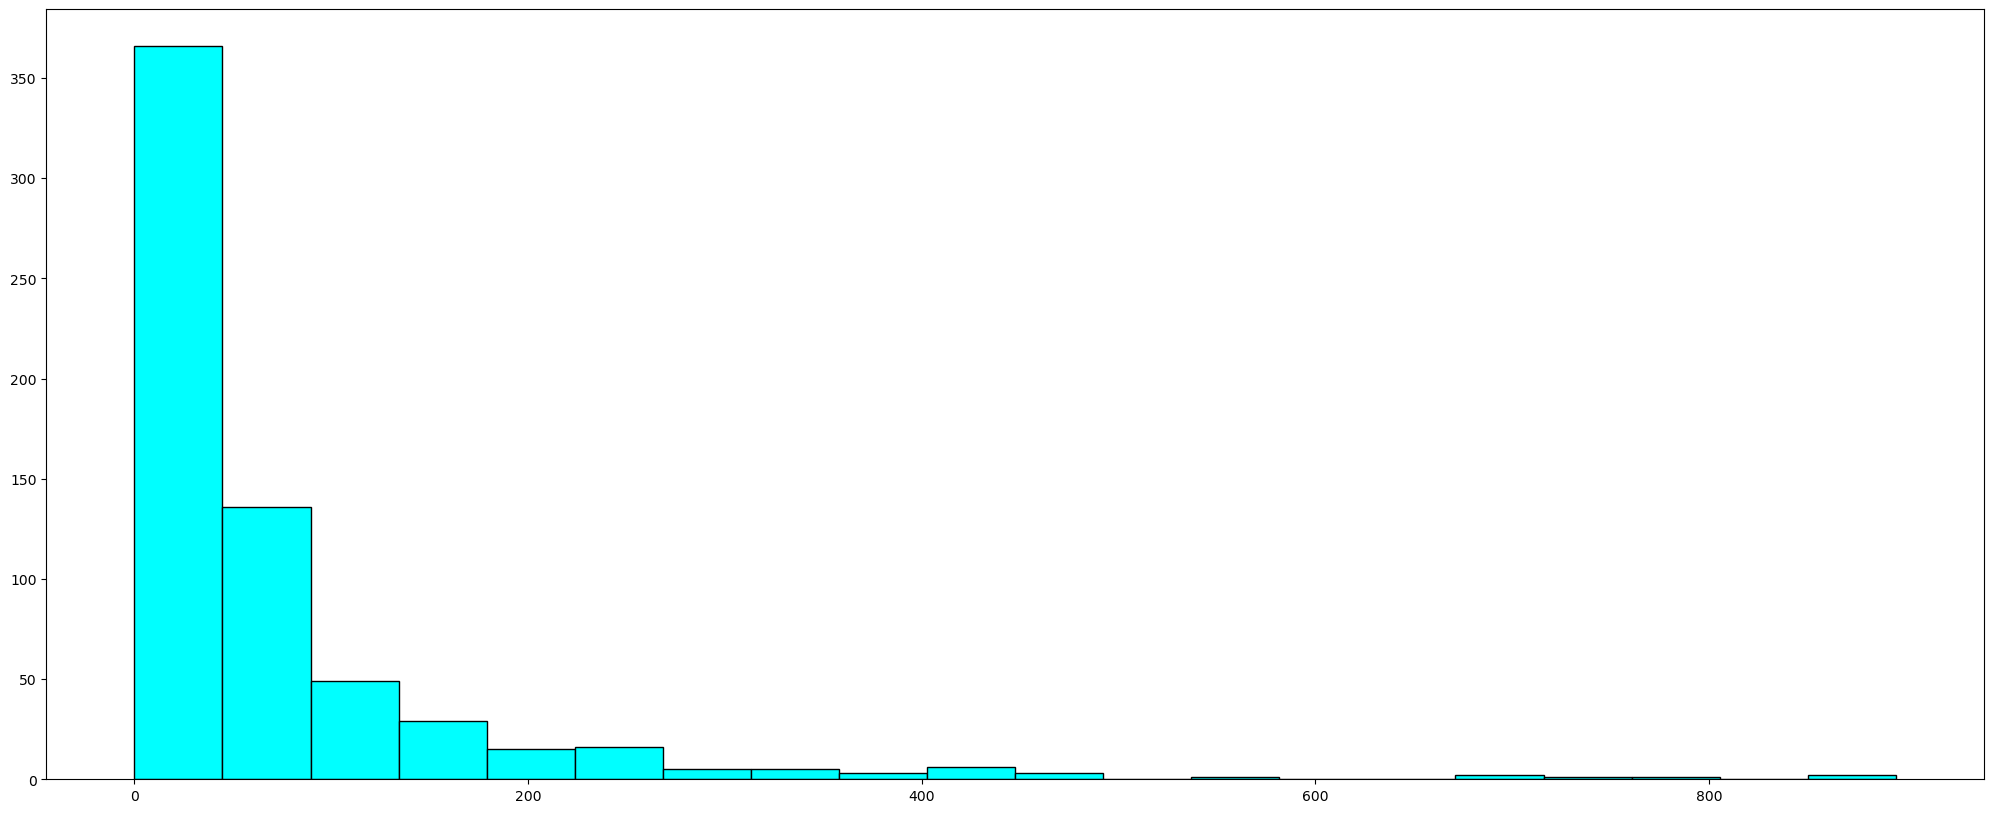

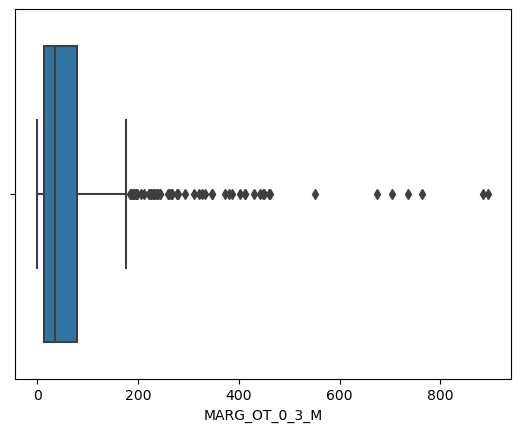

Description of MARG_OT_0_3_F
----------------------------------------------------------------------------
count     640.000000
mean      200.742188
std       309.740854
min         0.000000
25%        43.000000
50%       113.000000
75%       240.000000
max      3354.000000
Name: MARG_OT_0_3_F, dtype: float64 Distribution of MARG_OT_0_3_F
----------------------------------------------------------------------------
BoxPlot of MARG_OT_0_3_F
----------------------------------------------------------------------------


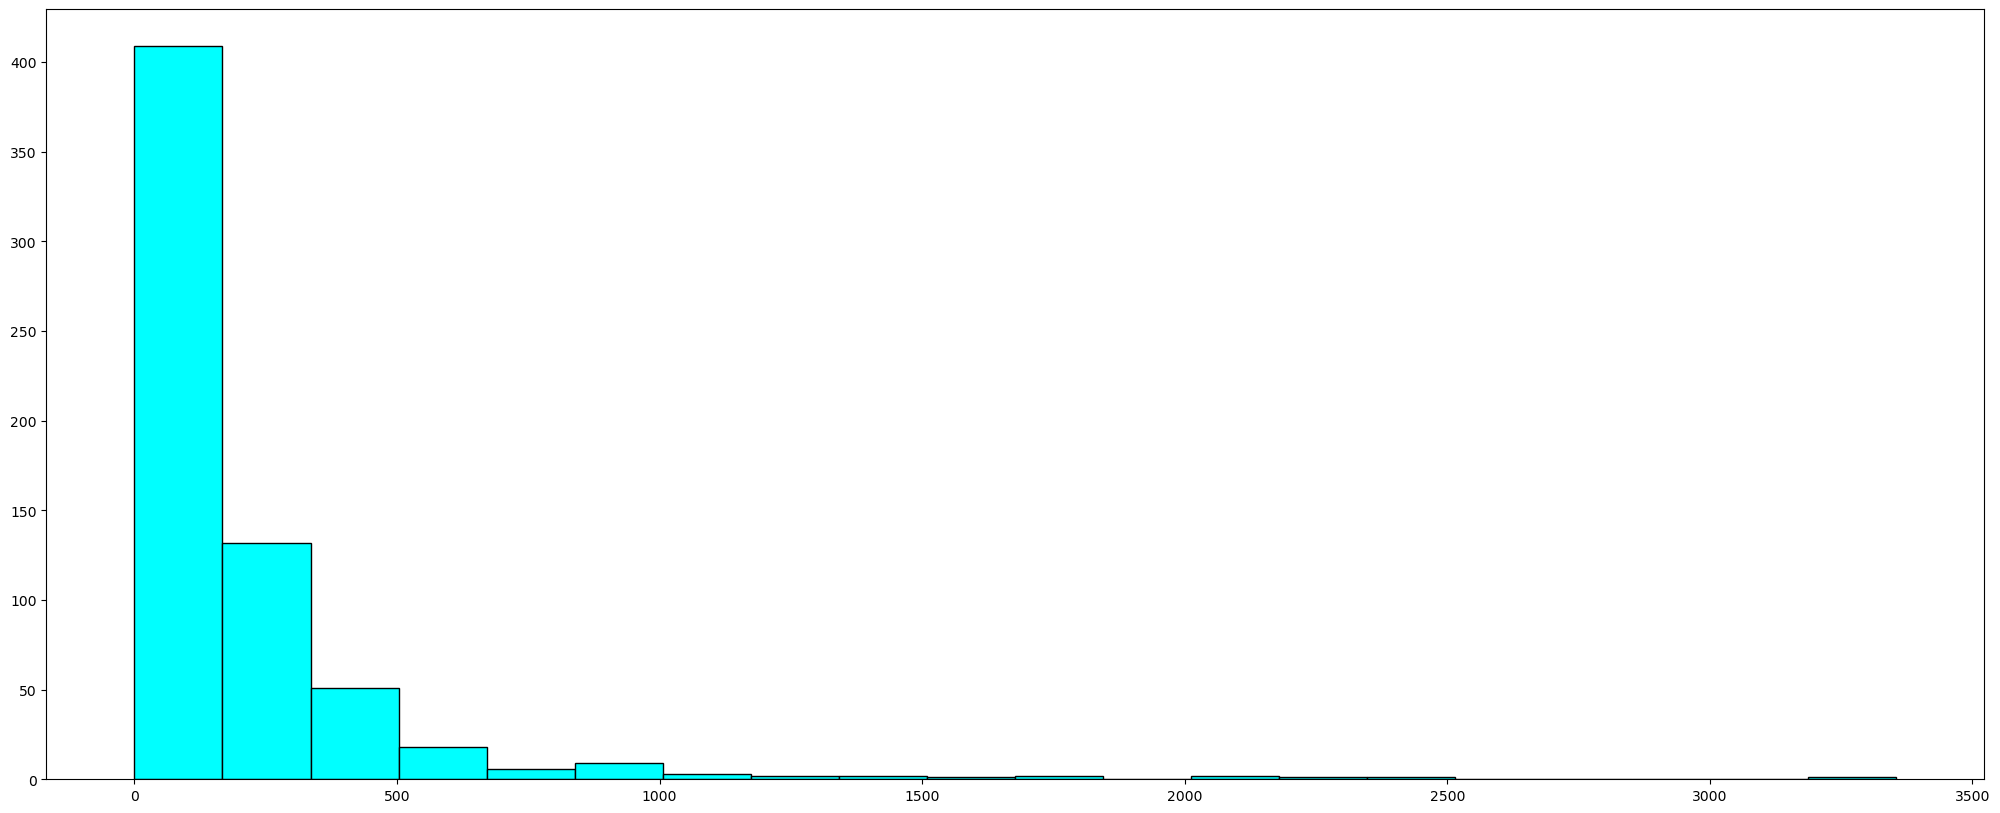

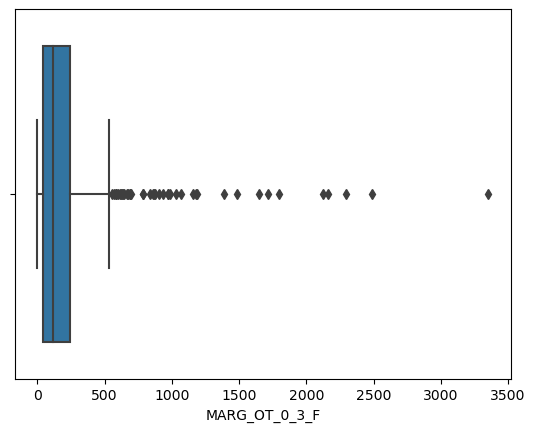

Description of NON_WORK_M
----------------------------------------------------------------------------
count     640.000000
mean      510.014063
std       610.603187
min         0.000000
25%       161.000000
50%       326.000000
75%       604.500000
max      6456.000000
Name: NON_WORK_M, dtype: float64 Distribution of NON_WORK_M
----------------------------------------------------------------------------
BoxPlot of NON_WORK_M
----------------------------------------------------------------------------


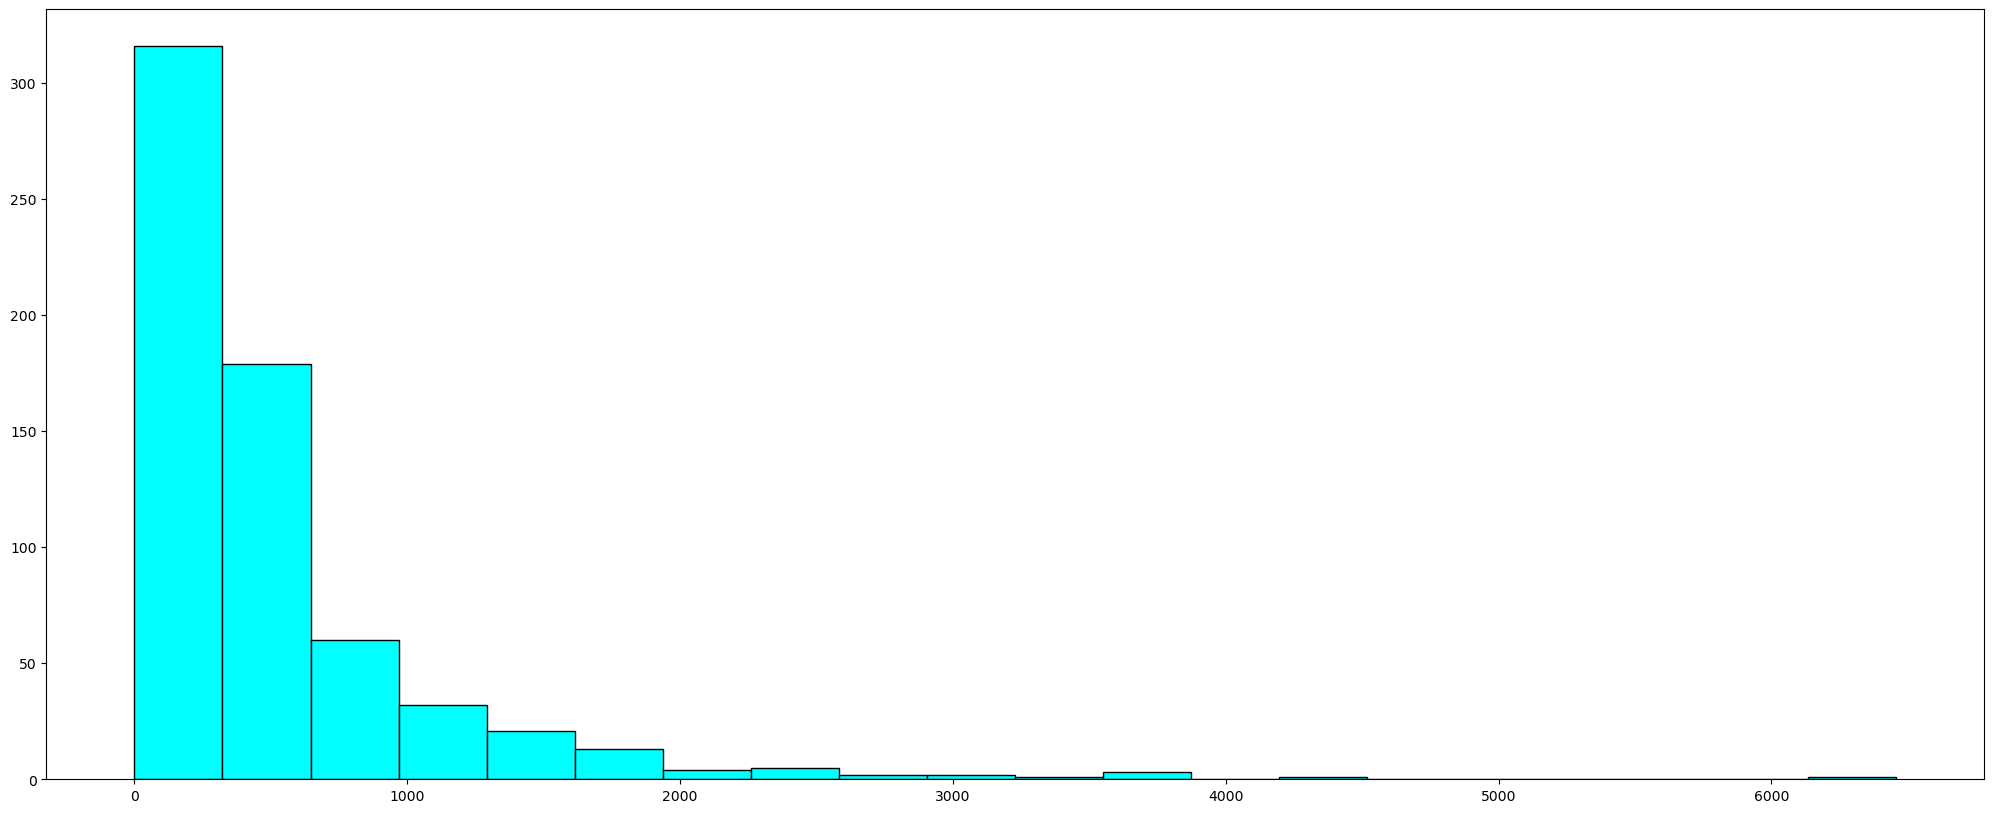

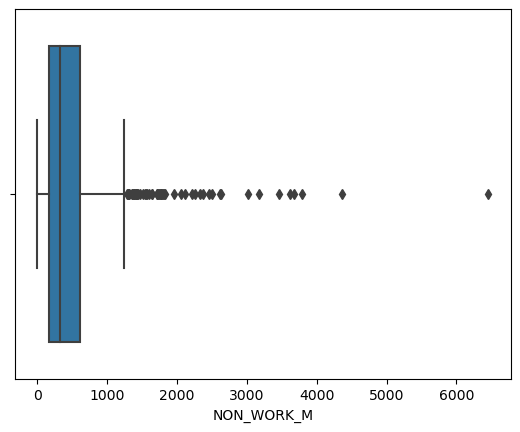

Description of NON_WORK_F
----------------------------------------------------------------------------
count      640.000000
mean       704.778125
std        910.209225
min          5.000000
25%        220.500000
50%        464.500000
75%        853.500000
max      10533.000000
Name: NON_WORK_F, dtype: float64 Distribution of NON_WORK_F
----------------------------------------------------------------------------
BoxPlot of NON_WORK_F
----------------------------------------------------------------------------


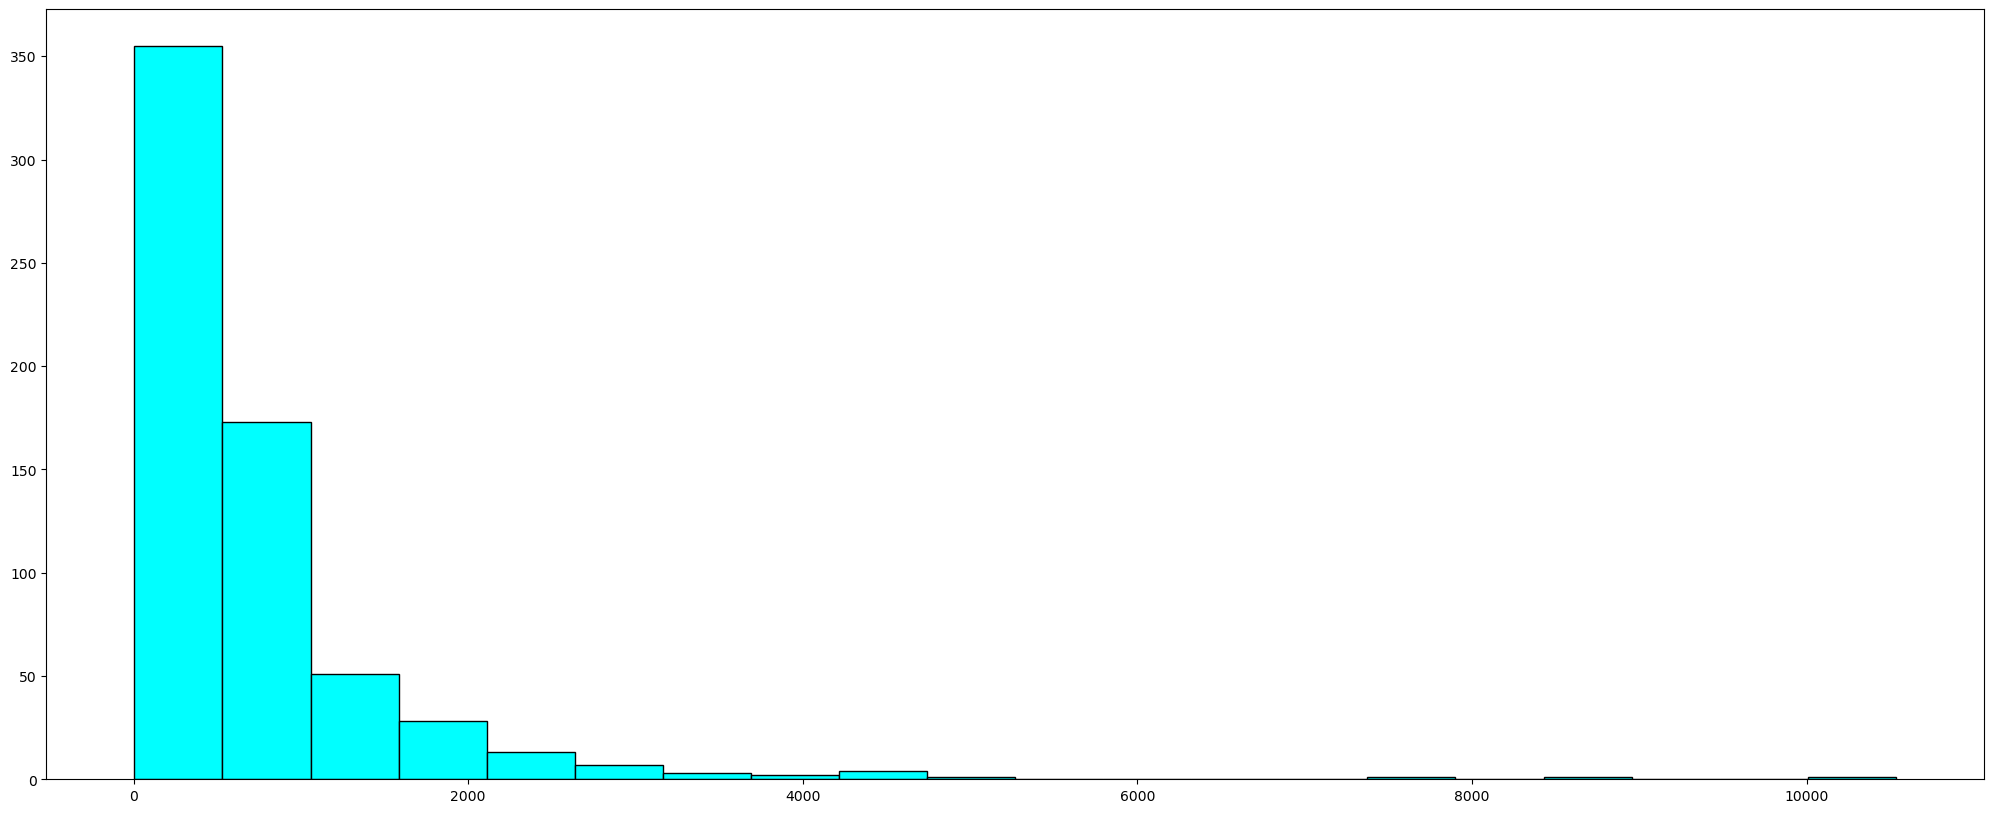

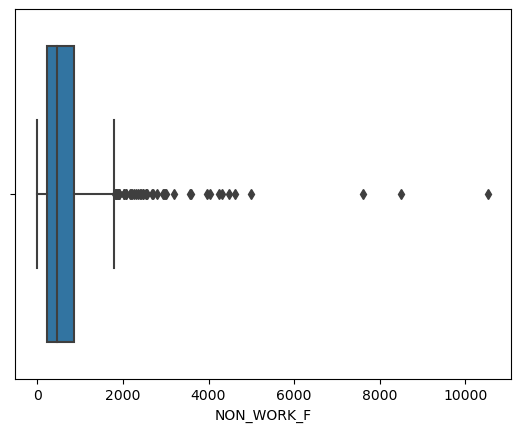

In [14]:
# Visualize the distribution of numerical columns
numerical_columns = df.select_dtypes(include=['int64', 'float64'])
for x in numerical_columns:
    univariateAnalysis_numeric(x,20)

#### From the above Histograms for all the numerical variables, we can observe that all the variables are positively skewed except StateCode and DistrictCode. 
#### From the above box plots for all the numerical variables, we can observe that all the variables have outliers except StateCode and DistrictCode.

Let us define a function 'univariateAnalysis_category' to display information as part of univariate analysis of categorical variables.

The function should display the frequency of all the levels within the field and display a frequency plot


In [15]:
def univariateAnalysis_category(cat_column):
    print("Details of " + cat_column)
    print("----------------------------------------------------------------")
    print(df_cat[cat_column].value_counts())
    plt.figure()
    plt.figure(figsize=(12, 8))
    plots = df_cat[cat_column].value_counts().plot.bar(title="Frequency Distribution of " + cat_column)

    plt.show()
    print("       ")

In [16]:
df_cat = df.select_dtypes(include = ['object'])
lstcatcolumns = list(df_cat.columns.values)
lstcatcolumns

['State', 'AreaName']

Details of State
----------------------------------------------------------------
Uttar Pradesh               71
Madhya Pradesh              50
Bihar                       38
Maharashtra                 35
Rajasthan                   33
Tamil Nadu                  32
Karnataka                   30
Odisha                      30
Assam                       27
Gujarat                     26
Jharkhand                   24
Andhra Pradesh              23
Jammu & Kashmir             22
Haryana                     21
Punjab                      20
West Bengal                 19
Chhattisgarh                18
Arunachal Pradesh           16
Kerala                      14
Uttarakhand                 13
Himachal Pradesh            12
Nagaland                    11
Manipur                      9
NCT of Delhi                 9
Mizoram                      8
Meghalaya                    7
Tripura                      4
Sikkim                       4
Puducherry                   4
Andaman & Nicobar I

<Figure size 640x480 with 0 Axes>

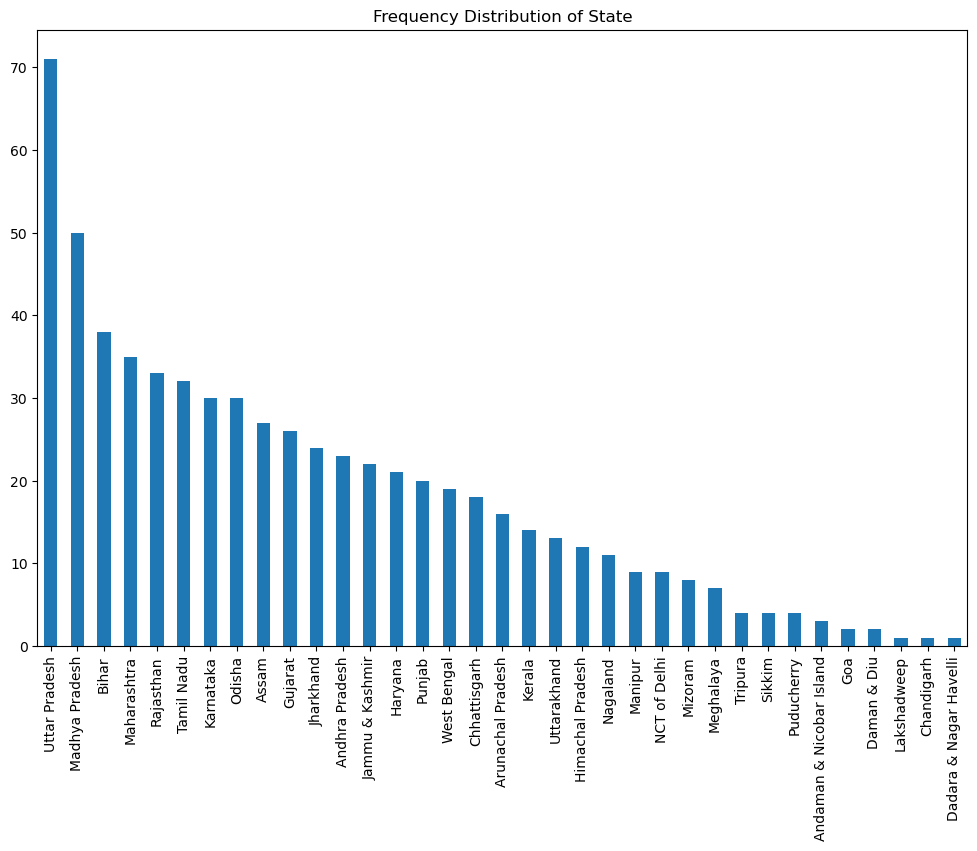

       
Details of AreaName
----------------------------------------------------------------
Raigarh          2
Bijapur          2
Aurangabad       2
Hamirpur         2
Bilaspur         2
                ..
Darbhanga        1
Muzaffarpur      1
Gopalganj        1
Siwan            1
South Andaman    1
Name: AreaName, Length: 635, dtype: int64


<Figure size 640x480 with 0 Axes>

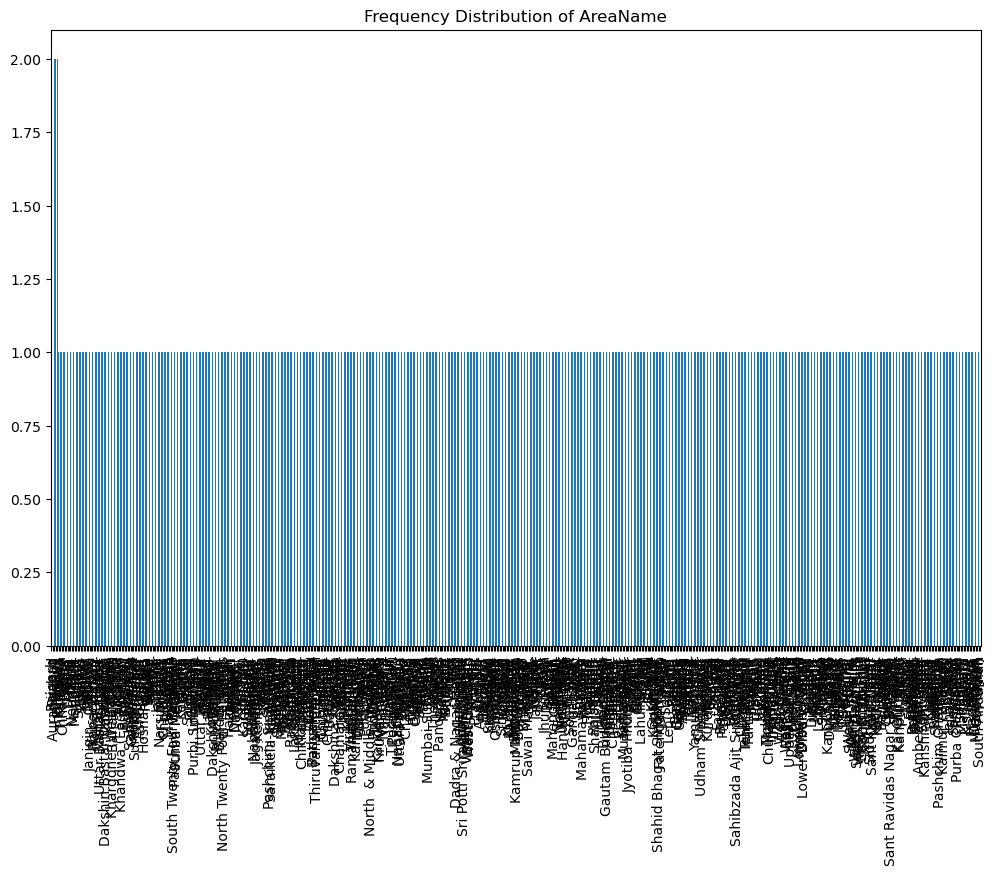

In [17]:
for x in lstcatcolumns:
    univariateAnalysis_category(x)

#### Bivariate Analysis

In [18]:
corr = numerical_columns.corr(method='pearson')

<AxesSubplot:>

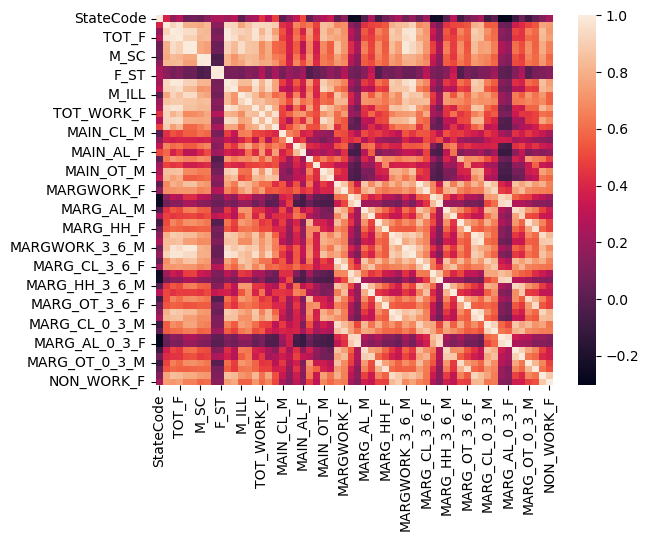

In [19]:
sns.heatmap(numerical_columns.corr())

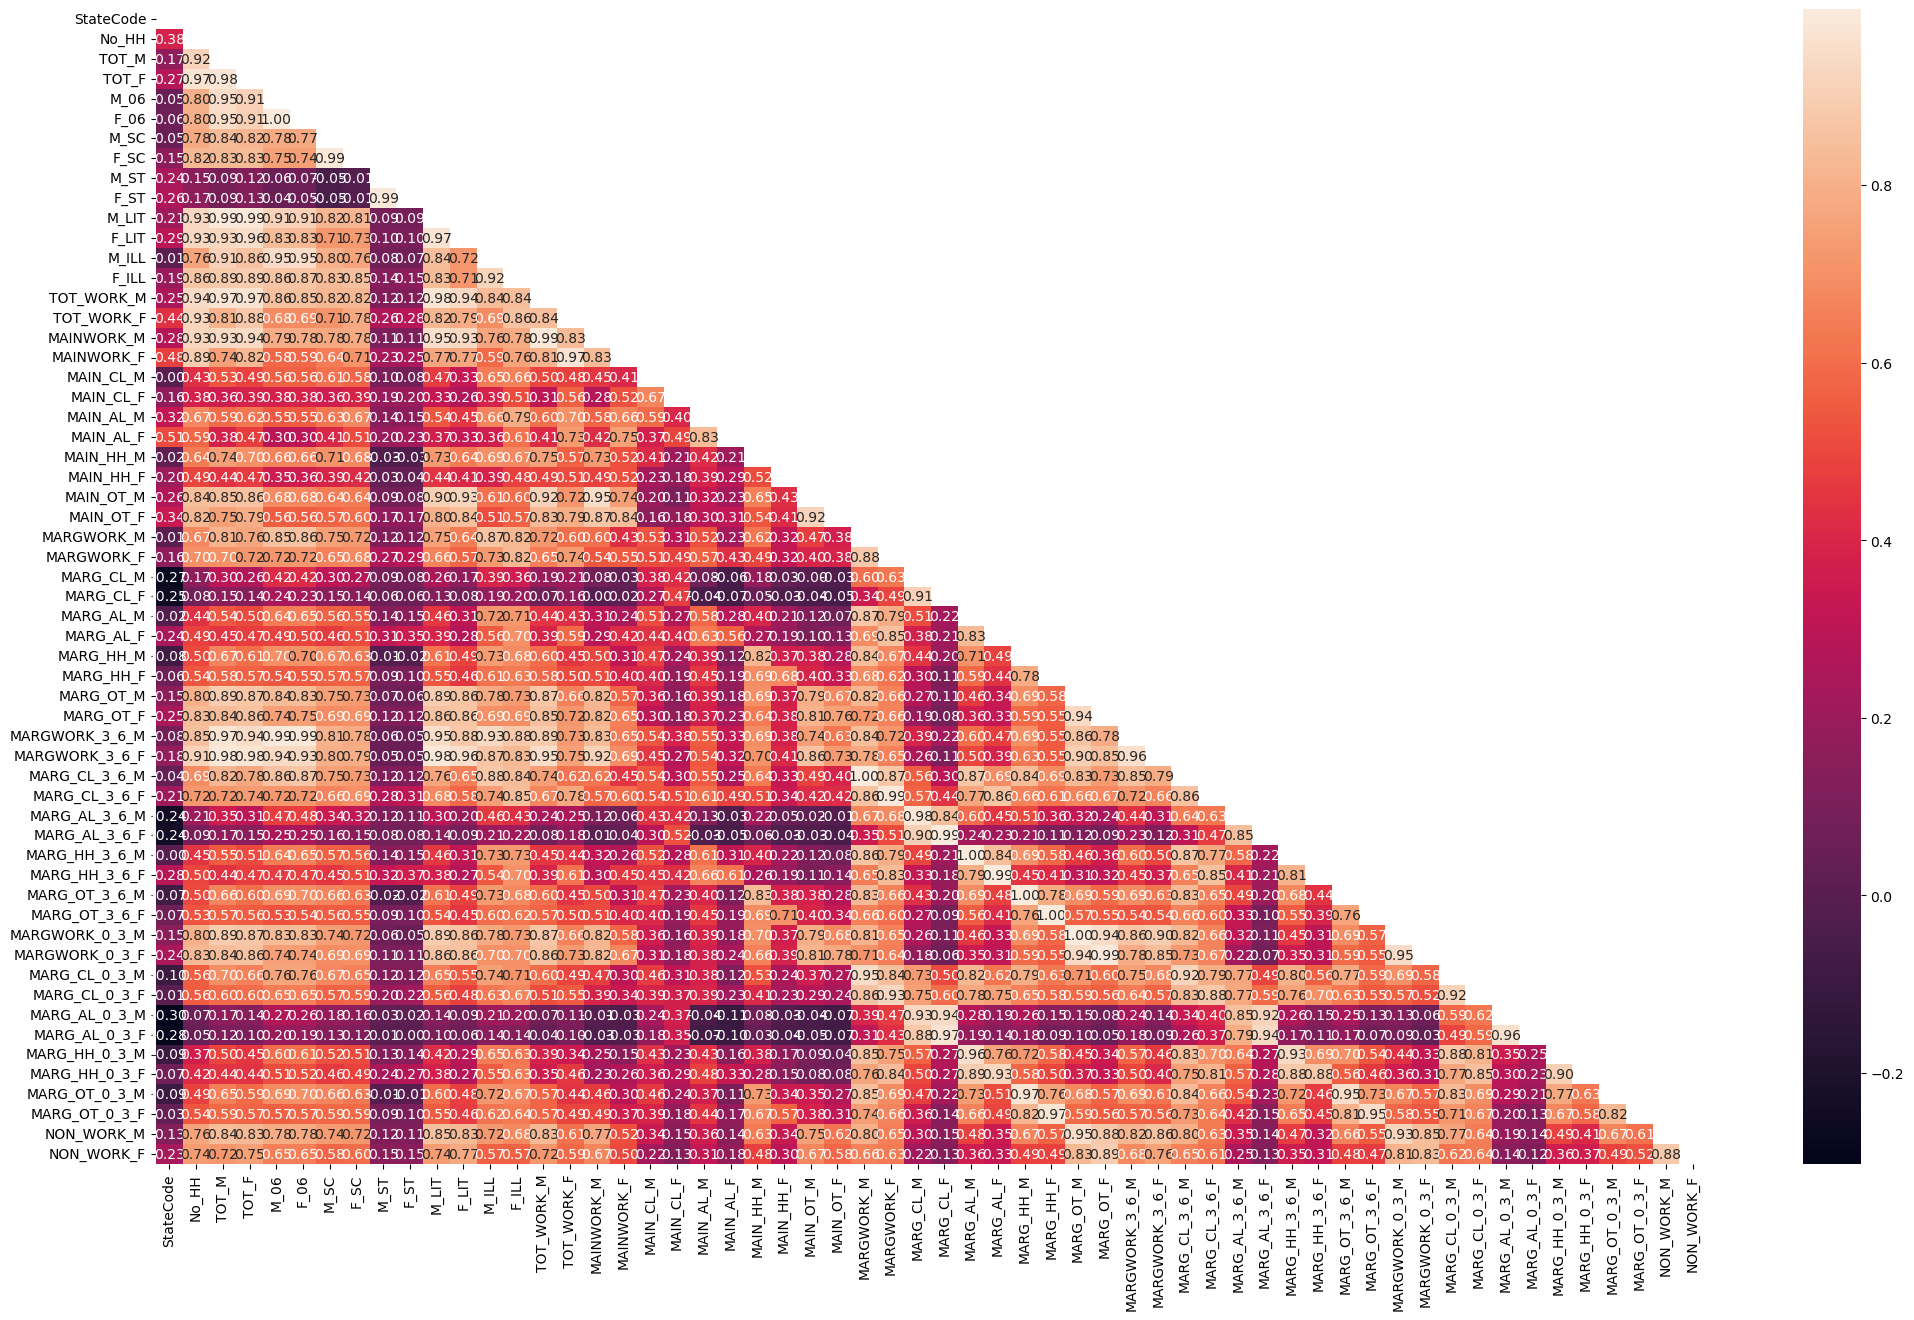

In [20]:
mask = np.triu(np.ones_like(corr, dtype=np.bool)) 
fig = plt.subplots(figsize=(25, 15))
sns.heatmap(numerical_columns.corr(), annot=True,fmt='.2f',mask=mask)
plt.show()

##### Observation

There are considerable number of features that are highly correlated.

In [21]:
# Outlier Treatment
Q1 = numerical_columns.quantile(0.25)
Q3 = numerical_columns.quantile(0.75)
IQR = Q3 - Q1

In [22]:
# The count of outliers in each column
((numerical_columns < (Q1 - 1.5 * IQR)) | (numerical_columns > (Q3 + 1.5 * IQR))).sum()/numerical_columns.shape[0]

StateCode         0.000000
No_HH             0.048438
TOT_M             0.039062
TOT_F             0.040625
M_06              0.050000
F_06              0.051562
M_SC              0.045312
F_SC              0.045312
M_ST              0.079687
F_ST              0.090625
M_LIT             0.046875
F_LIT             0.057813
M_ILL             0.060937
F_ILL             0.040625
TOT_WORK_M        0.050000
TOT_WORK_F        0.065625
MAINWORK_M        0.056250
MAINWORK_F        0.085938
MAIN_CL_M         0.039062
MAIN_CL_F         0.045312
MAIN_AL_M         0.056250
MAIN_AL_F         0.093750
MAIN_HH_M         0.073438
MAIN_HH_F         0.087500
MAIN_OT_M         0.082812
MAIN_OT_F         0.092188
MARGWORK_M        0.067187
MARGWORK_F        0.029687
MARG_CL_M         0.085938
MARG_CL_F         0.082812
MARG_AL_M         0.075000
MARG_AL_F         0.046875
MARG_HH_M         0.090625
MARG_HH_F         0.060937
MARG_OT_M         0.071875
MARG_OT_F         0.065625
MARGWORK_3_6_M    0.048438
M

In [23]:
(numerical_columns > (Q3 + 1.5 * IQR)).sum()

StateCode          0
No_HH             31
TOT_M             25
TOT_F             26
M_06              32
F_06              33
M_SC              29
F_SC              29
M_ST              51
F_ST              58
M_LIT             30
F_LIT             37
M_ILL             39
F_ILL             26
TOT_WORK_M        32
TOT_WORK_F        42
MAINWORK_M        36
MAINWORK_F        55
MAIN_CL_M         25
MAIN_CL_F         29
MAIN_AL_M         36
MAIN_AL_F         60
MAIN_HH_M         47
MAIN_HH_F         56
MAIN_OT_M         53
MAIN_OT_F         59
MARGWORK_M        43
MARGWORK_F        19
MARG_CL_M         55
MARG_CL_F         53
MARG_AL_M         48
MARG_AL_F         30
MARG_HH_M         58
MARG_HH_F         39
MARG_OT_M         46
MARG_OT_F         42
MARGWORK_3_6_M    31
MARGWORK_3_6_F    32
MARG_CL_3_6_M     44
MARG_CL_3_6_F     15
MARG_AL_3_6_M     56
MARG_AL_3_6_F     49
MARG_HH_3_6_M     43
MARG_HH_3_6_F     25
MARG_OT_3_6_M     58
MARG_OT_3_6_F     40
MARGWORK_0_3_M    48
MARGWORK_0_3_

In [24]:
((numerical_columns > (Q3 + 1.5 * IQR)) & (numerical_columns < numerical_columns.quantile(0.95))).sum()

StateCode          0
No_HH              0
TOT_M              0
TOT_F              0
M_06               0
F_06               1
M_SC               0
F_SC               0
M_ST              19
F_ST              26
M_LIT              0
F_LIT              5
M_ILL              7
F_ILL              0
TOT_WORK_M         0
TOT_WORK_F        10
MAINWORK_M         4
MAINWORK_F        23
MAIN_CL_M          0
MAIN_CL_F          0
MAIN_AL_M          4
MAIN_AL_F         28
MAIN_HH_M         15
MAIN_HH_F         24
MAIN_OT_M         21
MAIN_OT_F         27
MARGWORK_M        11
MARGWORK_F         0
MARG_CL_M         23
MARG_CL_F         21
MARG_AL_M         16
MARG_AL_F          0
MARG_HH_M         26
MARG_HH_F          7
MARG_OT_M         14
MARG_OT_F         10
MARGWORK_3_6_M     0
MARGWORK_3_6_F     0
MARG_CL_3_6_M     12
MARG_CL_3_6_F      0
MARG_AL_3_6_M     24
MARG_AL_3_6_F     17
MARG_HH_3_6_M     11
MARG_HH_3_6_F      0
MARG_OT_3_6_M     26
MARG_OT_3_6_F      8
MARGWORK_0_3_M    16
MARGWORK_0_3_

In [27]:
no_outlier = ['StateCode']

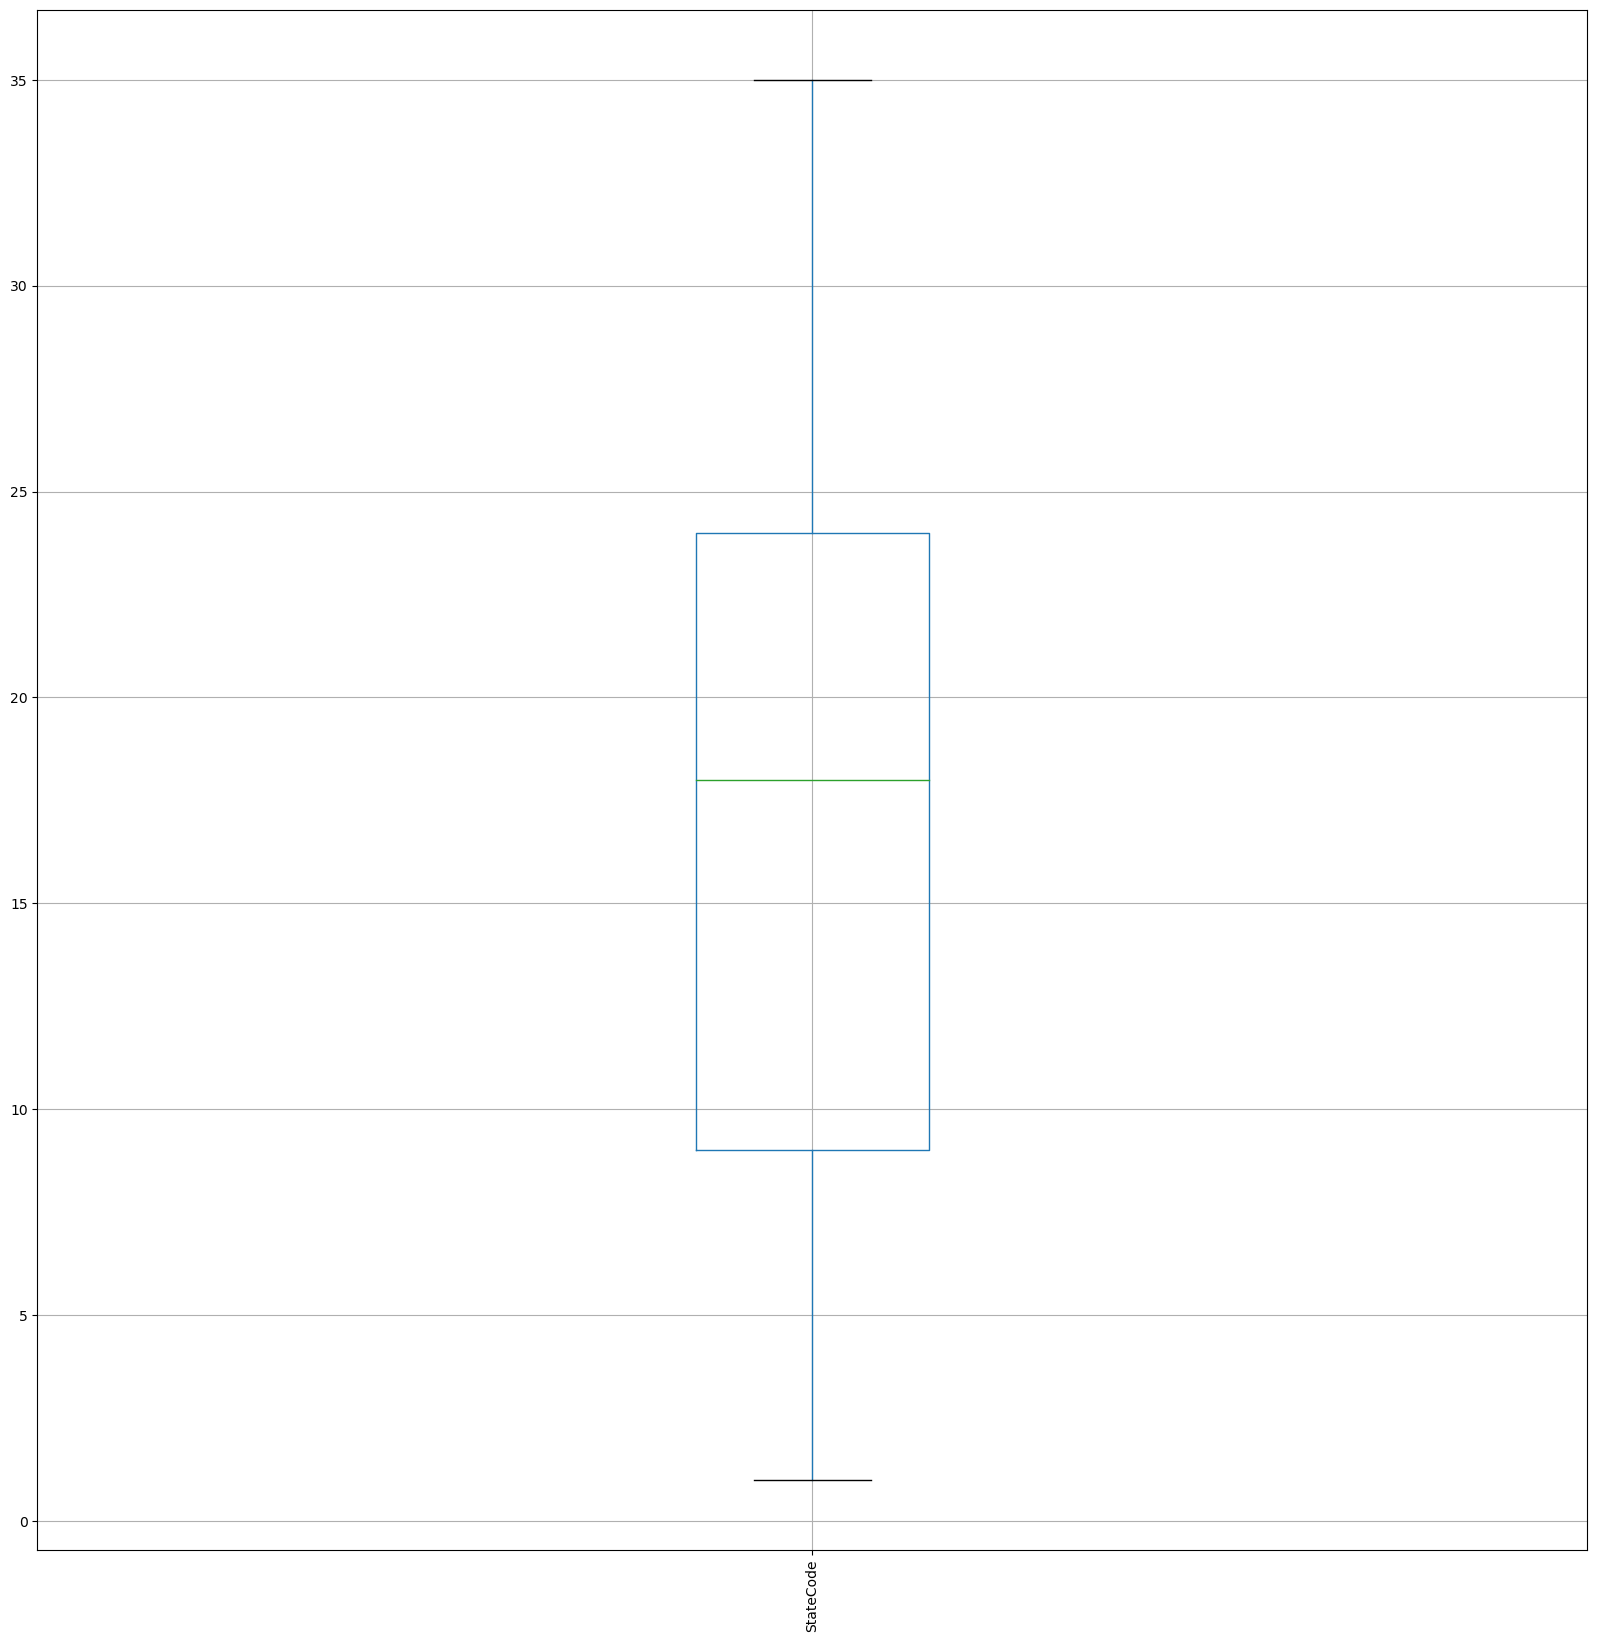

In [28]:
numerical_columns[no_outlier].boxplot(figsize=(20,20))
plt.xticks(rotation=90)
plt.show()

In [29]:
def treat_outlier(x):
    # taking 5,25,75 percentile of column
    q5= np.percentile(x,5)
    q25=np.percentile(x,25)
    q75=np.percentile(x,75)
    q95=np.percentile(x,95)
    #calculationg IQR range
    IQR=q75-q25
    #Calculating minimum threshold
    lower_bound=q25-(1.5*IQR)
    upper_bound=q75+(1.5*IQR)
    #Capping outliers
    return x.apply(lambda y: q95 if y > q95 else y).apply(lambda y: q5 if y < q5 else y)

In [30]:
outlier_list = [x for x in numerical_columns.columns if x not in no_outlier]

In [31]:
for i in numerical_columns[outlier_list]:    
    numerical_columns[i]=treat_outlier(numerical_columns[i])

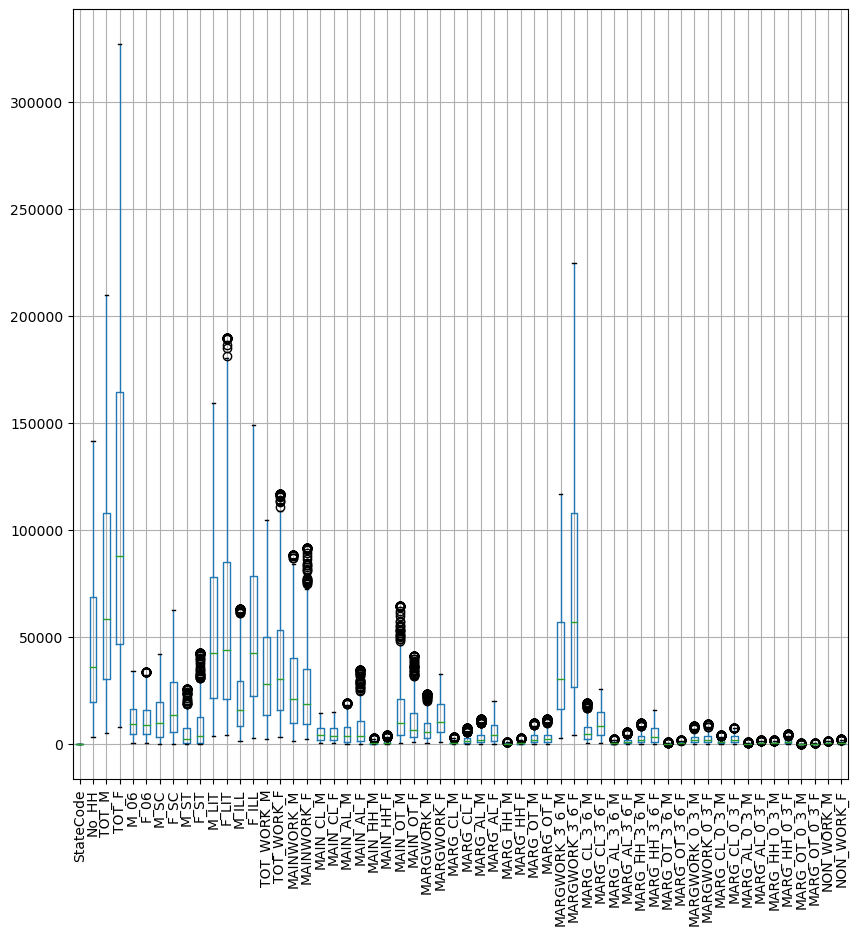

In [32]:
numerical_columns.boxplot(figsize=(10,10))
plt.xticks(rotation=90)
plt.show()

## PCA

In [33]:
numerical_columns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640 entries, 0 to 639
Data columns (total 58 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   StateCode       640 non-null    int64  
 1   No_HH           640 non-null    float64
 2   TOT_M           640 non-null    float64
 3   TOT_F           640 non-null    float64
 4   M_06            640 non-null    float64
 5   F_06            640 non-null    float64
 6   M_SC            640 non-null    float64
 7   F_SC            640 non-null    float64
 8   M_ST            640 non-null    float64
 9   F_ST            640 non-null    float64
 10  M_LIT           640 non-null    float64
 11  F_LIT           640 non-null    float64
 12  M_ILL           640 non-null    float64
 13  F_ILL           640 non-null    float64
 14  TOT_WORK_M      640 non-null    float64
 15  TOT_WORK_F      640 non-null    float64
 16  MAINWORK_M      640 non-null    float64
 17  MAINWORK_F      640 non-null    flo

In [34]:
from scipy.stats import zscore
numerical_columns_scaled=numerical_columns.apply(zscore)
numerical_columns_scaled.head()

StateCode     No_HH     TOT_M     TOT_F      M_06      F_06      M_SC  \
0  -1.710782 -1.045396 -0.891093 -0.948655 -0.627243 -0.561564 -1.088269   
1  -1.710782 -1.083544 -0.956140 -1.022636 -0.776917 -0.833168 -1.087937   
2  -1.710782 -1.128788 -1.179163 -1.156783 -1.145679 -1.132562 -1.088269   
3  -1.710782 -1.158017 -1.201253 -1.189446 -1.187881 -1.169642 -1.088518   
4  -1.710782 -0.944274 -0.938933 -0.946611 -0.703707 -0.738994 -1.086858   

       F_SC      M_ST      F_ST  ...  MARG_CL_0_3_M  MARG_CL_0_3_F  \
0 -1.087541 -0.491763 -0.544801  ...      -0.123025      -0.860457   
1 -1.087210 -0.711309 -0.717087  ...      -0.696086      -0.876554   
2 -1.087210  0.039924  0.045079  ...      -1.072931      -1.126059   
3 -1.087541 -0.398610 -0.431378  ...      -0.999580      -1.098126   
4 -1.085718  0.300251  0.137804  ...      -0.376089      -0.302265   

   MARG_AL_0_3_M  MARG_AL_0_3_F  MARG_HH_0_3_M  MARG_HH_0_3_F  MARG_OT_0_3_M  \
0      -0.123555      -0.418670       0.339741      -0.755448      -0.435727   
1      -0.357224      -0.434212      -0.590151      -0.837704       0.194593   
2      -0.681081      -0.706208      -0.921543      -0.927869      -0.865491   
3      -0.611390      -0.630438      -0.915802      -0.915214      -0.836840   
4       1.044790       1.147247      -0.554386      -0.715901      -0.550330   

   MARG_OT_0_3_F  NON_WORK_M  NON_WORK_F  
0      -0.725870   -0.490325   -0.742187  
1       0.043136   -0.768274   -0.838021  
2      -0.953076   -0.940226   -1.013717  
3      -0.935599   -0.824806   -1.017267  
4      -0.382147   -0.674054   -0.273664  

[5 rows x 58 columns]

In [35]:
numerical_columns_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640 entries, 0 to 639
Data columns (total 58 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   StateCode       640 non-null    float64
 1   No_HH           640 non-null    float64
 2   TOT_M           640 non-null    float64
 3   TOT_F           640 non-null    float64
 4   M_06            640 non-null    float64
 5   F_06            640 non-null    float64
 6   M_SC            640 non-null    float64
 7   F_SC            640 non-null    float64
 8   M_ST            640 non-null    float64
 9   F_ST            640 non-null    float64
 10  M_LIT           640 non-null    float64
 11  F_LIT           640 non-null    float64
 12  M_ILL           640 non-null    float64
 13  F_ILL           640 non-null    float64
 14  TOT_WORK_M      640 non-null    float64
 15  TOT_WORK_F      640 non-null    float64
 16  MAINWORK_M      640 non-null    float64
 17  MAINWORK_F      640 non-null    flo

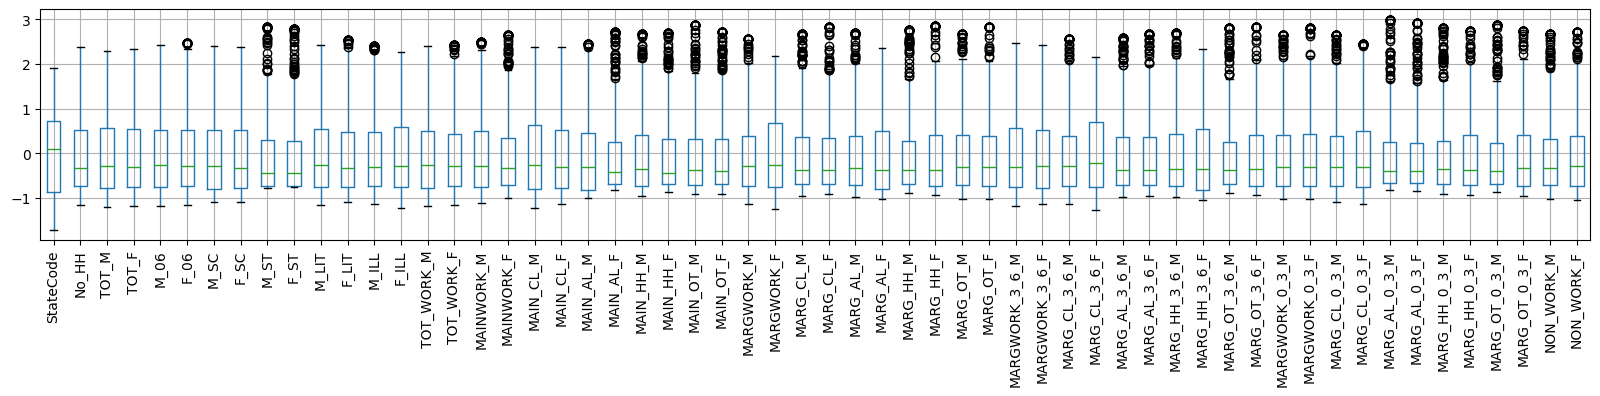

In [36]:
numerical_columns_scaled.boxplot(figsize=(20,3))
plt.xticks(rotation=90)
plt.show()

### Statistical tests to be done before PCA

Bartletts Test of Sphericity

Bartlett's test of sphericity tests the hypothesis that the variables are uncorrelated in the population.

    H0: All variables in the data are uncorrelated
    Ha: At least one pair of variables in the data are correlated

If the null hypothesis cannot be rejected, then PCA is not advisable.

If the p-value is small, then we can reject the null hypothesis and agree that there is atleast one pair of vairbales in the data wihich are correlated hence PCA is recommended.


In [37]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value=calculate_bartlett_sphericity(numerical_columns_scaled)
p_value

0.0

KMO Test

The Kaiser-Meyer-Olkin (KMO) - measure of sampling adequacy (MSA) is an index used to examine how appropriate PCA is.

Generally, if MSA is less than 0.5, PCA is not recommended, since no reduction is expected. On the other hand, MSA > 0.7 is expected to provide a considerable reduction is the dimension and extraction of meaningful components.


In [38]:
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(numerical_columns_scaled)
kmo_model

0.9309321172455374

In [39]:
from sklearn.decomposition import PCA
pca = PCA(n_components=33, random_state=123)
df_pca = pca.fit_transform(numerical_columns_scaled)
df_pca.transpose().round(2)

array([[-5.52, -5.54, -7.3 , ..., -7.41, -7.51, -7.11],
       [ 0.64,  0.24,  0.06, ..., -1.08, -1.13, -1.46],
       [-1.81, -2.27, -0.83, ..., -0.38, -0.35, -0.42],
       ...,
       [-0.28, -0.06,  0.1 , ..., -0.01,  0.02,  0.01],
       [ 0.01, -0.04,  0.01, ...,  0.02,  0.04,  0.02],
       [ 0.03, -0.13, -0.1 , ...,  0.  ,  0.03,  0.02]])

In [40]:
#Step 1: Obtaining the Eigen Vectors when the Principal Components are kept exactly as the number of features in the scaled data
print('Eigen Vectors \n %s',pca.components_.round(2))

Eigen Vectors 
 %s [[ 0.03  0.15  0.16 ...  0.14  0.15  0.14]
 [-0.15 -0.12 -0.07 ...  0.04 -0.05 -0.05]
 [ 0.28  0.09 -0.04 ... -0.09 -0.13 -0.03]
 ...
 [-0.   -0.09 -0.   ... -0.1  -0.07  0.12]
 [ 0.01 -0.17  0.01 ... -0.16 -0.    0.07]
 [ 0.02 -0.26  0.17 ...  0.16 -0.1   0.21]]


In [41]:
var_exp = pca.explained_variance_ratio_
print(var_exp.round(2))

[0.61 0.14 0.07 0.05 0.04 0.02 0.02 0.01 0.01 0.01 0.01 0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.  ]


In [42]:
var_exp = pca.explained_variance_ratio_
print(var_exp.round(3))

[0.606 0.136 0.072 0.05  0.035 0.021 0.019 0.009 0.008 0.006 0.005 0.005
 0.003 0.003 0.003 0.002 0.002 0.002 0.002 0.001 0.001 0.001 0.001 0.001
 0.001 0.001 0.    0.    0.    0.    0.    0.    0.   ]


In [43]:
# Step 2: Obtaining the Cumulative Sum of the Expalained Variance 
cum_var_exp = np.cumsum(var_exp)
print('Cumulative Variance Explained in Percentage:',(cum_var_exp*100).round(2))

Cumulative Variance Explained in Percentage: [60.64 74.27 81.42 86.47 90.01 92.09 94.   94.92 95.72 96.3  96.81 97.27
 97.6  97.91 98.18 98.4  98.6  98.77 98.93 99.07 99.19 99.31 99.41 99.49
 99.56 99.62 99.67 99.71 99.75 99.79 99.82 99.85 99.87]



    . We can see above that more than 84% of the variance is explained by 3 Principal Components.
    . Around 93% of the variance is explained by 6 Principal Components.
    . Around 97% of the variance is explained by 12 Principal Components.



### Scree Plot

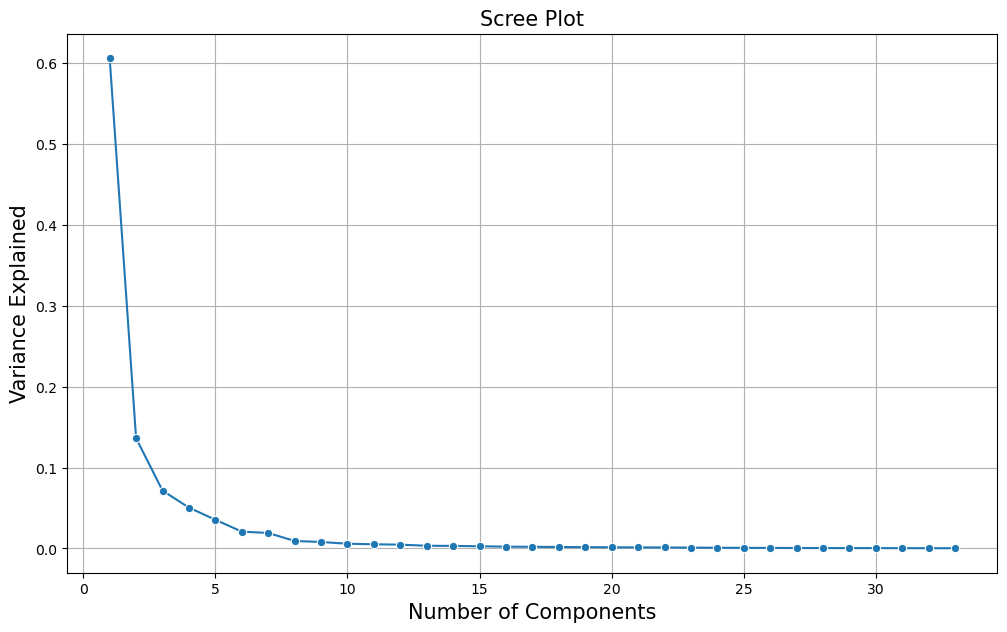

In [44]:
# Step 3 View Scree Plot to identify the number of components to be built
plt.figure(figsize=(12,7))
sns.lineplot(y=var_exp,x=range(1,len(var_exp)+1),marker='o')
plt.xlabel('Number of Components',fontsize=15)
plt.ylabel('Variance Explained',fontsize=15)
plt.title('Scree Plot',fontsize=15)
plt.grid()
plt.show()

The number of components can be decided based upon the explained variance. Here, it is decided to keep the number of components as 3 as the cumulative explained variance is around 84%

In [45]:
# Step 4 Apply PCA for the number of decided components to get the loadings and component output

# Using scikit learn PCA here. It does all the above steps and maps data to PCA dimensions in one shot
from sklearn.decomposition import PCA
# NOTE - we are generating only 8 PCA dimensions (dimensionality reduction from 33 to 8)
pca = PCA(n_components=3, random_state=123)
df_pca = pca.fit_transform(numerical_columns_scaled)
df_pca.transpose().round(2) # Component output

array([[-5.52, -5.54, -7.3 , ..., -7.41, -7.51, -7.11],
       [ 0.64,  0.24,  0.06, ..., -1.08, -1.13, -1.46],
       [-1.81, -2.27, -0.83, ..., -0.38, -0.35, -0.42]])

In [46]:
df_pca.shape

(640, 3)

In [47]:
# Loading of each feature on the components
# Eigen Vectors when PC's are kept as 8
pca.components_.round(2)

array([[ 0.03,  0.15,  0.16,  0.16,  0.16,  0.16,  0.14,  0.14,  0.02,
         0.02,  0.16,  0.15,  0.16,  0.16,  0.16,  0.14,  0.14,  0.12,
         0.11,  0.08,  0.12,  0.09,  0.14,  0.13,  0.12,  0.12,  0.16,
         0.15,  0.09,  0.06,  0.13,  0.12,  0.14,  0.14,  0.15,  0.15,
         0.16,  0.16,  0.16,  0.15,  0.09,  0.06,  0.13,  0.11,  0.14,
         0.14,  0.15,  0.15,  0.14,  0.13,  0.06,  0.05,  0.12,  0.11,
         0.14,  0.14,  0.15,  0.14],
       [-0.15, -0.12, -0.07, -0.09, -0.01, -0.01, -0.07, -0.08,  0.04,
         0.04, -0.1 , -0.13, -0.  , -0.02, -0.12, -0.09, -0.16, -0.16,
         0.05,  0.09, -0.06, -0.1 , -0.09, -0.11, -0.2 , -0.21,  0.08,
         0.1 ,  0.27,  0.27,  0.15,  0.12,  0.06,  0.01, -0.07, -0.09,
        -0.04, -0.08,  0.07,  0.08,  0.26,  0.26,  0.15,  0.1 ,  0.06,
         0.  , -0.07, -0.1 ,  0.14,  0.16,  0.28,  0.28,  0.18,  0.17,
         0.07,  0.04, -0.05, -0.05],
       [ 0.28,  0.09, -0.04,  0.02, -0.07, -0.07, -0.05,  0.01,  0.3 ,
   

In [48]:
var_exp_1 = pca.explained_variance_ratio_.round(2)

In [49]:
#Check the explained variance for each PC. 
#Note: Explained variance = (eigen value of each PC)/(sum of eigen values of all PCs)
# It gives the Eigen Values when PC's are kept at 3
pca.explained_variance_ratio_.round(2)

array([0.61, 0.14, 0.07])

Let's create a dataframe of component loading against each field and identify the pattern

In [50]:
# Component loading when PC's are kept as 8
df_pca_loading = pd.DataFrame(pca.components_.round(2),columns=list(numerical_columns_scaled))
df_pca_loading.shape

(3, 58)

In [51]:
df_pca_loading.head(3)

StateCode  No_HH  TOT_M  TOT_F  M_06  F_06  M_SC  F_SC  M_ST  F_ST  ...  \
0       0.03   0.15   0.16   0.16  0.16  0.16  0.14  0.14  0.02  0.02  ...   
1      -0.15  -0.12  -0.07  -0.09 -0.01 -0.01 -0.07 -0.08  0.04  0.04  ...   
2       0.28   0.09  -0.04   0.02 -0.07 -0.07 -0.05  0.01  0.30  0.32  ...   

   MARG_CL_0_3_M  MARG_CL_0_3_F  MARG_AL_0_3_M  MARG_AL_0_3_F  MARG_HH_0_3_M  \
0           0.14           0.13           0.06           0.05           0.12   
1           0.14           0.16           0.28           0.28           0.18   
2          -0.08           0.05          -0.08          -0.05           0.02   

   MARG_HH_0_3_F  MARG_OT_0_3_M  MARG_OT_0_3_F  NON_WORK_M  NON_WORK_F  
0           0.11           0.14           0.14        0.15        0.14  
1           0.17           0.07           0.04       -0.05       -0.05  
2           0.16          -0.14          -0.09       -0.13       -0.03  

[3 rows x 58 columns]

Let's identify which features have maximum loading across the components.

  . We will first plot the component loading on a heatmap.

  . For each feature, we find the maximum loading value across the components and mark the same with help of rectangular box.

  . Features marked with rectangular red box are the one having maximum loading on the respective component. We consider these marked features to decide the context that the component represents



In [52]:
from matplotlib.patches import Rectangle

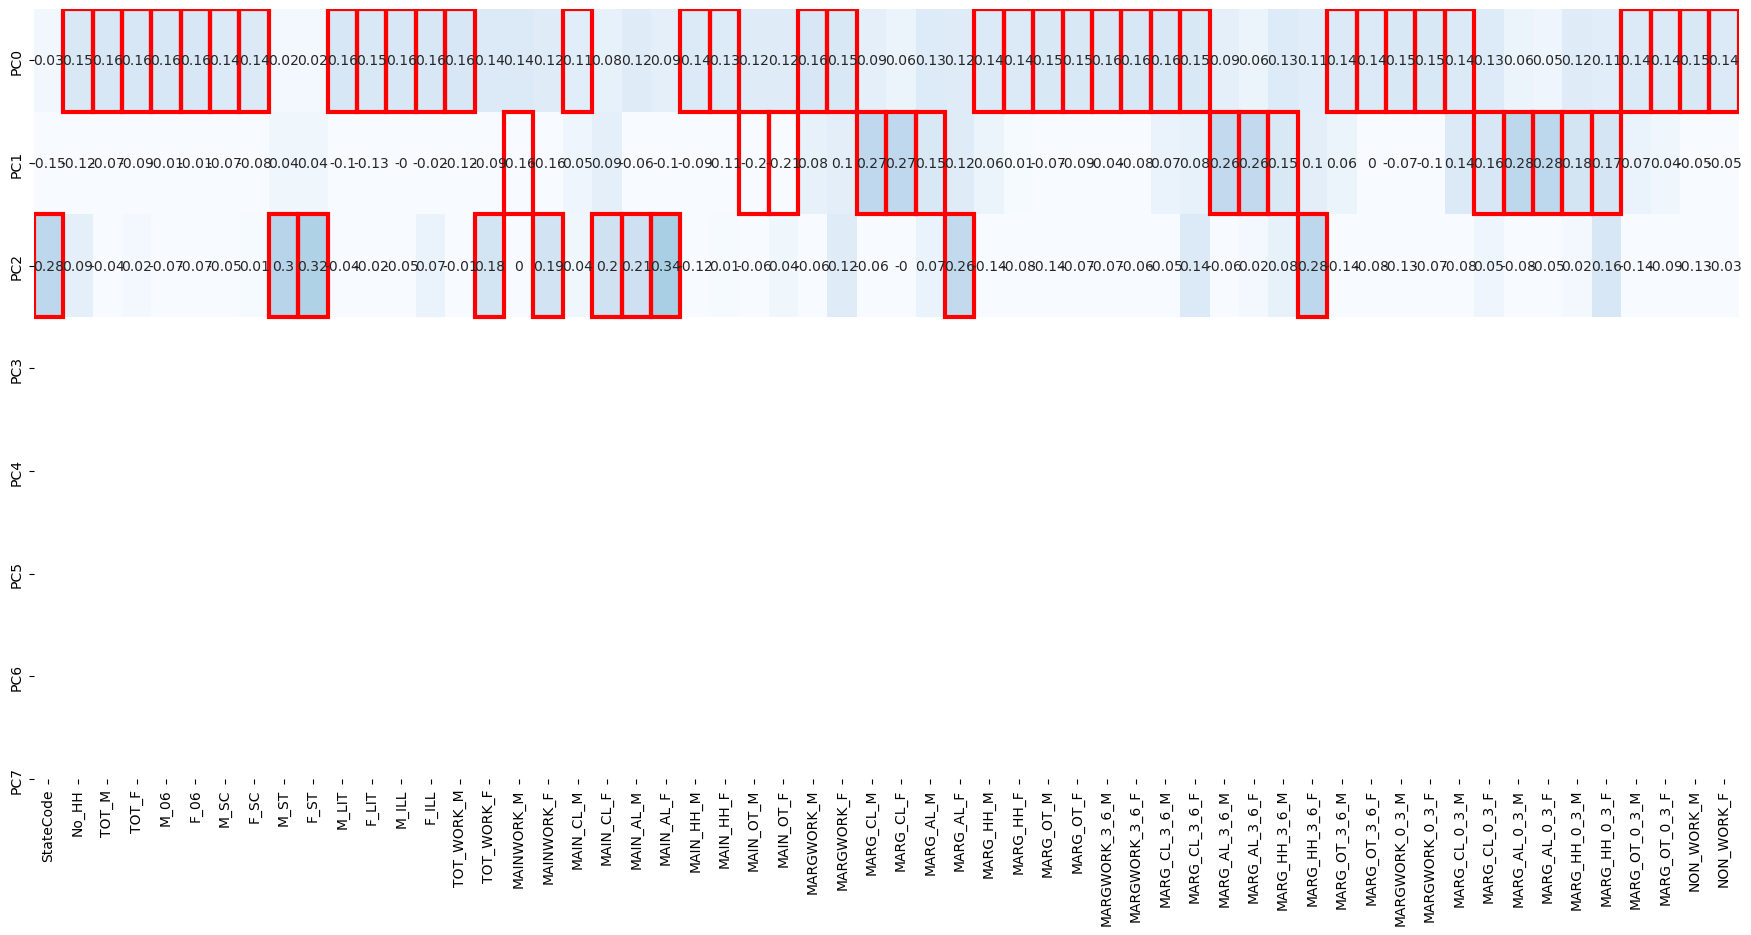

In [53]:
fig,ax = plt.subplots(figsize=(22, 10), facecolor='w', edgecolor='k')
ax = sns.heatmap(df_pca_loading, annot=True, vmax=1.0, vmin=0, cmap='Blues', cbar=False, fmt='.2g', ax=ax,
                 yticklabels=['PC0','PC1','PC2','PC3','PC4','PC5','PC6','PC7'])

column_max = df_pca_loading.abs().idxmax(axis=0)

for col, variable in enumerate(df_pca_loading.columns):
    position = df_pca_loading.index.get_loc(column_max[variable])
    ax.add_patch(Rectangle((col, position),1,1, fill=False, edgecolor='red', lw=3))

#### For every attribute (column, the corresponding PC's cell with the maximum magnitude has been highlighted using Rectangles.
#### For Example, for the State Code attribute, the PC2 has the maximum magnitude of 0.28